In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from scipy.optimize import brentq
import random as r
import matplotlib.animation as animation
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.path as path
from sympy.solvers import solve
from sympy import Symbol

In [2]:
## from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')

plt.rcParams['savefig.dpi'] = 1080
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 21, 5

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = .11
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False  # set this to False if you do not have LaTeX installed.
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

In [3]:
u_mag=[] #create lists for these columns in the csv file
g_mag=[]
r_mag=[]
i_mag=[]
z_mag=[]
u_err=[]
g_err=[]
r_err=[]
i_err=[]
z_err=[]

with open('data_query.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        u_mag.append(row[2])
        g_mag.append(row[3])
        r_mag.append(row[4])
        i_mag.append(row[5])
        z_mag.append(row[6])
        u_err.append(row[7])
        g_err.append(row[8])
        r_err.append(row[9])
        i_err.append(row[10])
        z_err.append(row[11])

del u_mag[0] #remove first item from the list (names of each data type)
del g_mag[0]
del r_mag[0]
del i_mag[0]
del z_mag[0]
del u_err[0]
del g_err[0]
del r_err[0]
del i_err[0]
del z_err[0]


In [4]:
def convert(s):
    try:
        float(s) #check that each data point can be converted to float
        return float(s)
    except ValueError:
        return None 

u_mag = [convert(x) for x in u_mag] #create lists of floating points
g_mag = [convert(x) for x in g_mag]
r_mag = [convert(x) for x in r_mag]
i_mag = [convert(x) for x in i_mag]
z_mag = [convert(x) for x in z_mag]
u_err = [convert(x) for x in u_err]
g_err = [convert(x) for x in g_err]
r_err = [convert(x) for x in r_err]
i_err = [convert(x) for x in i_err]
z_err = [convert(x) for x in z_err]
UR = []
GR = []
RI = []
RZ = []
for i, j in zip(u_mag, r_mag):
    try: 
        UR.append(round(i - j,2))
    except:
        UR.append(None)
        
for i, j in zip(g_mag, r_mag):
    try: 
        GR.append(round(i - j,2))
    except:
        GR.append(None)

for i, j in zip(r_mag, i_mag):
    try: 
        RI.append(round(i - j,2))
    except:
        RI.append(None)
        
for i, j in zip(r_mag, z_mag):
    try: 
        RZ.append(round(i - j,2))
    except:
        RZ.append(None)


In [5]:
URhist = []
GRhist = []
RIhist = []
RZhist = []
u_err_hist=[]
g_err_hist=[]
r_err_hist=[]
i_err_hist=[]
z_err_hist=[]
for i in UR:
    if type(i) == float:
        URhist.append(i)
for i in GR:
    if type(i) == float:
        GRhist.append(i)
for i in RI:
    if type(i) == float:
        RIhist.append(i)
for i in RZ:
    if type(i) == float:
        RZhist.append(i)
for i in u_err:
    if type(i) == float:
        u_err_hist.append(i)
for i in g_err:
    if type(i) == float:
        g_err_hist.append(i)
for i in r_err:
    if type(i) == float:
        r_err_hist.append(i)
for i in i_err:
    if type(i) == float:
        i_err_hist.append(i)
for i in z_err:
    if type(i) == float:
        z_err_hist.append(i)

In [6]:
print("UR length is ", len(URhist))
print("GR length is ", len(GRhist))
print("RI length is ", len(RIhist))
print("RZ length is ", len(RZhist))

UR length is  219760
GR length is  219667
RI length is  219911
RZ length is  219783


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


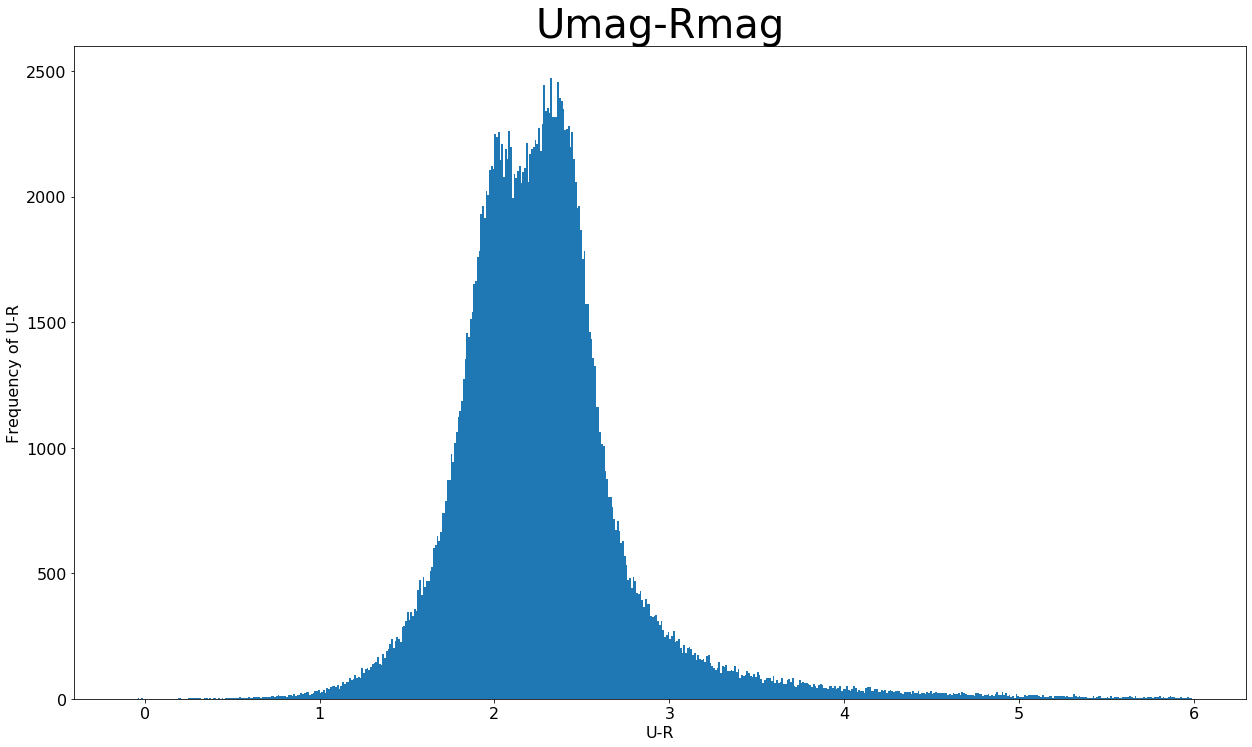

In [7]:
plt.figure(figsize=(21,12))
#plt.hist(URhist, bins=np.arange(int(min(UR)), int(max(UR)) + 1, 0.01))
plt.hist(URhist, bins=np.arange(-0.1,6,0.01))
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
plt.title('Umag-Rmag')
plt.show()

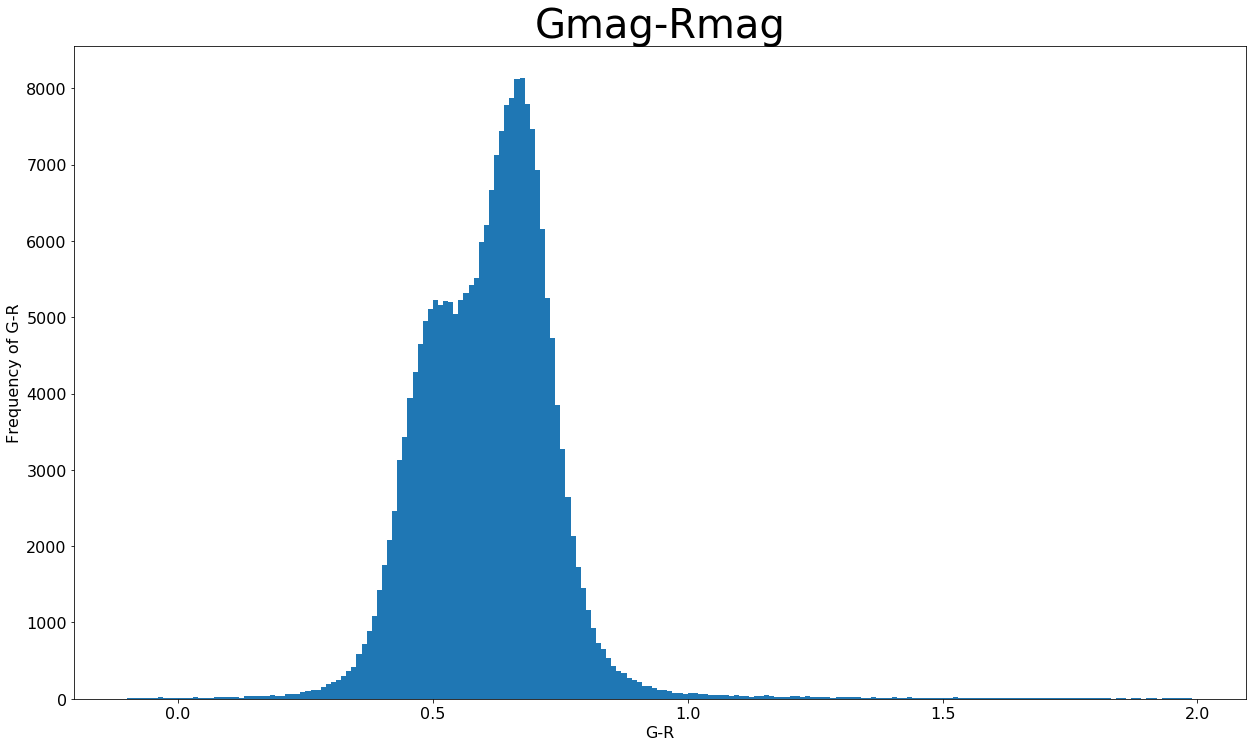

In [8]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(GRhist, bins=np.arange(-.1,2,0.01))
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.title('Gmag-Rmag')
plt.show()

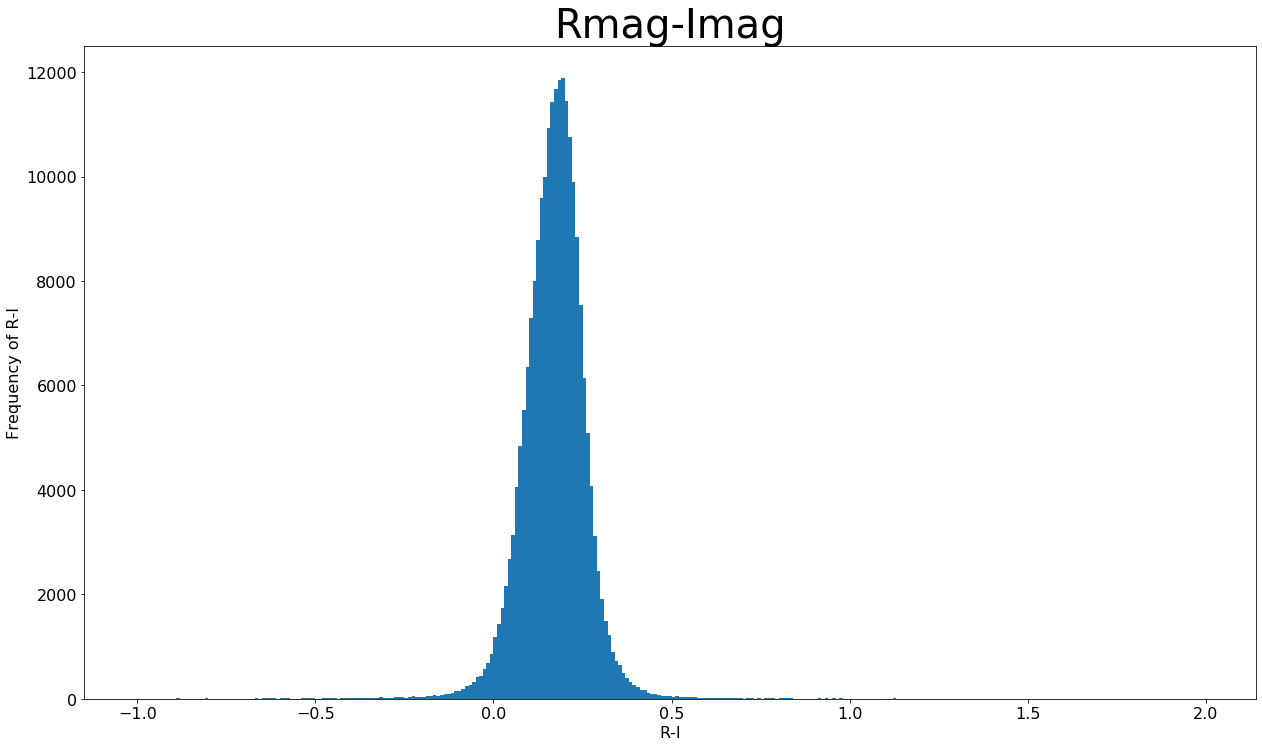

In [9]:
plt.figure(figsize=(21,12))
#plt.hist(RIhist, bins=np.arange(int(min(RI)), int(max(RI)) + 1, 0.01))
plt.hist(RIhist, bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.title('Rmag-Imag')
plt.show()

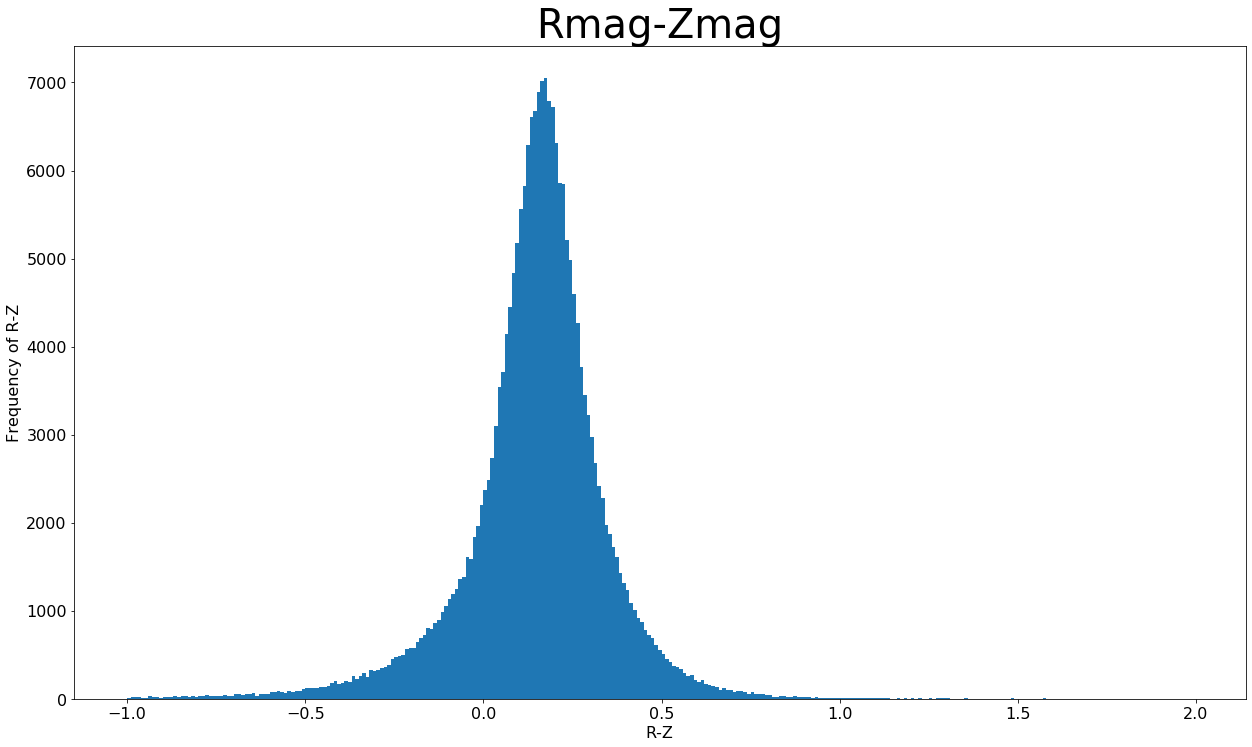

In [10]:
plt.figure(figsize=(21,12))
#plt.hist(RZhist, bins=np.arange(int(min(RI)), int(max(RI)) + 1, 0.01))
plt.hist(RZhist, bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.title('Rmag-Zmag')
plt.show()

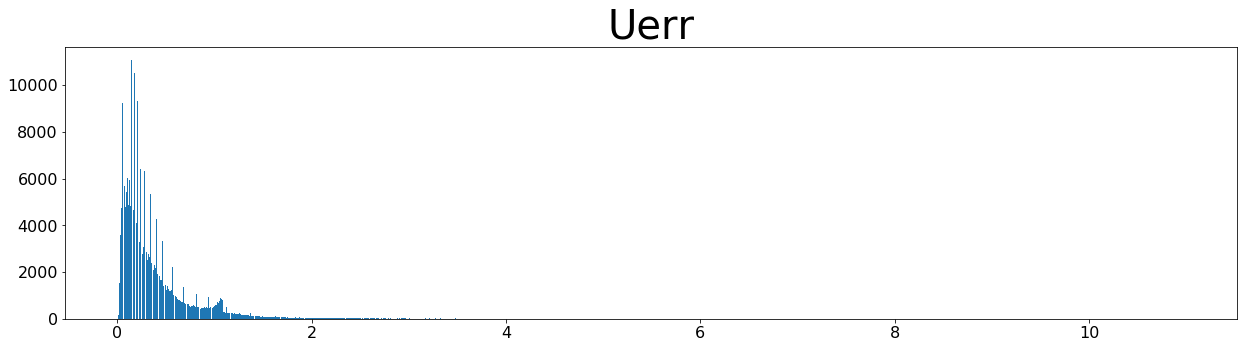

In [11]:
plt.figure()
plt.hist(u_err_hist, bins=np.arange((min(u_err_hist)), (max(u_err_hist)) + 1, 0.01))
plt.title('Uerr')
plt.show()

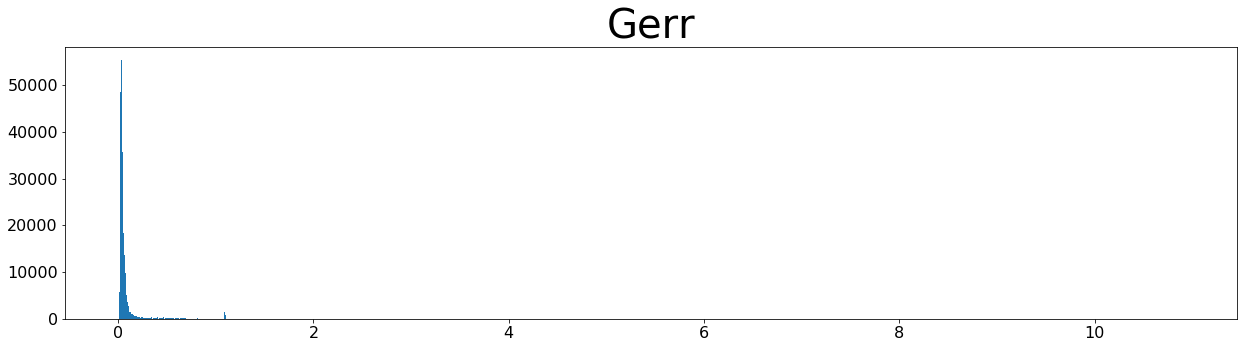

In [12]:
plt.figure()
plt.hist(g_err_hist, bins=np.arange((min(g_err_hist)), (max(g_err_hist)) + 1, 0.01))
plt.title('Gerr')
plt.show()

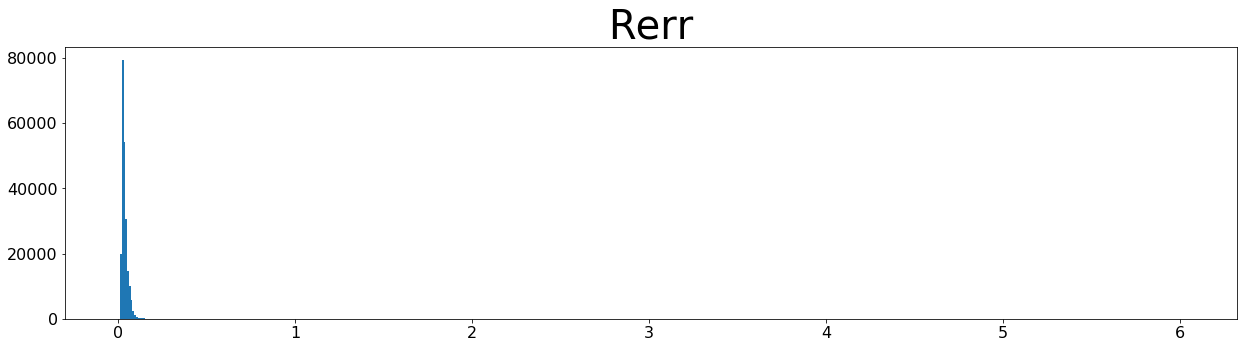

In [13]:
plt.figure()
plt.hist(r_err_hist, bins=np.arange((min(r_err_hist)), (max(r_err_hist)) + 1, 0.01))
plt.title('Rerr')
plt.show()

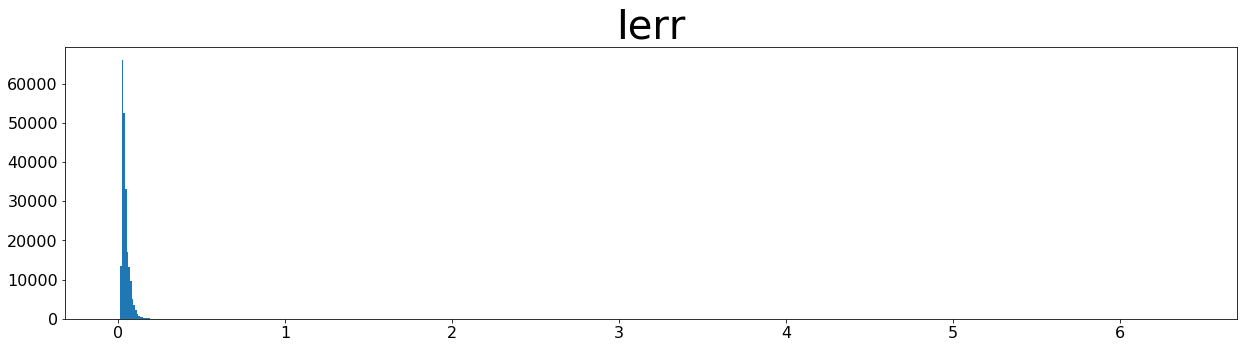

In [14]:
plt.figure()
plt.hist(i_err_hist, bins=np.arange((min(i_err_hist)), (max(i_err_hist)) + 1, 0.01))
plt.title('Ierr')
plt.show()

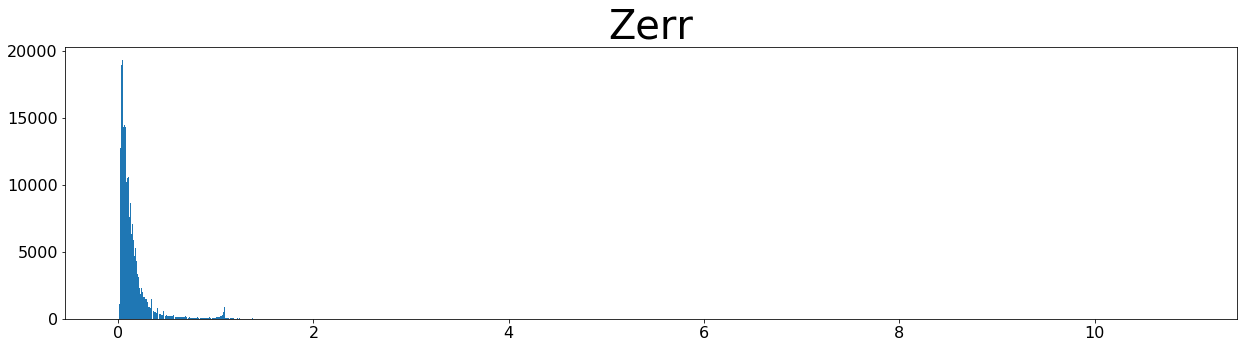

In [15]:
plt.figure()
plt.hist(z_err_hist, bins=np.arange((min(z_err_hist)), (max(z_err_hist)) + 1, 0.01))
plt.title('Zerr')
plt.show()

Define gaussian functions to use in curve fitting.

In [16]:
def gaussian(y, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((y - mean)**2 / (2*standard_deviation**2)))

def twogaussians(y,mean1,amplitude1,standard_deviation1,mean2,amplitude2,standard_deviation2):
    return (amplitude1 * np.exp( - ((y - mean1)**2 / (2*standard_deviation1**2)))) + (amplitude2 * np.exp( - ((y - mean2)**2 / (2*standard_deviation2**2))))

def halfgaussian(y, mean, amplitude, standard_deviation):
    return amplitude * sp.exp( - ((y - mean)**2 / (2*standard_deviation**2))) - (amplitude/2)

The linear line function is used to fit a linear line to plots showing the change in the width at half-amplitude of the gaussian curves as the number of data points is is reduced. 

In [17]:
def linearline(x,m,b):
    y = []
    for i in x:
        y.append(i*m+b)
    return y

Define functions used for refining datasets.

In [18]:
def getthreshold(err,frac): # takes list of error values, what fraction of them is to be saved (eg keep 90%)
    errsorted = sorted(err) #arrange error list in ascending order
    index = int(frac*len(err)) #what index value contains this fraction of the list (90% of the list with lowest values)
    threshold = errsorted[index]
    return threshold

#takes original error lists that have the corresponding index values in UR, GR etc, and error lists without Nonetype, to
#use in getthreshold function, list to be reduced, and the fraction of lists to be saved
#returns new list for refined histogram
def reducedlists(list1,err1,err2,err1hist,err2hist):
    histlists = []
    allerrs = []
    for i in range(len(err1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#            newerr = round(err1[i]**2 + err2[i]**2,3)
            newerr = err1[i]*err2[i]
            allerrs.append(newerr)
    toterrs = list(set(allerrs))
    toterrs.sort()
    for n in toterrs:
        newlist=[]
        for i in range(len(list1)):
            if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#                if err1[i]*err1[i]+err2[i]*err2[i]<=n:
                if err1[i]*err2[i]<=n:

                    newlist.append(list1[i])
        if len(histlists) == 0:
            if len(newlist) > 0:
                histlists.append(newlist)
        else:
            if len(newlist)/len(histlists[-1])>=1.001:
                histlists.append(newlist)
        
    return histlists

def newreducedlists(list1,err1,err2,err1hist,err2hist): #THIS FUNCTION DOES NOT WORK. NEEDS DEBUGGING
    """
    Does the exact same thing as the last reduced list function but 'faster'
    
    INPUTS:
    list1     -
    err1      -
    err2      -
    err1hist  -
    err2hist  -
    
    RETURNS:
    histlists -
    
    """
    histlists = []
    allerrs = []
    oldlist = []
    indexes = list(range(len(list1)))
    newindexes = indexes
    
    counter = [0,0,0]
    counter2 = 0
    counter3=[]
    for i in range(len(err1)):
        counter[0]+=1 # debug counter position 0
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#            newerr = round(err1[i]**2 + err2[i]**2,3)
            newerr = err1[i]*err2[i]
            allerrs.append(newerr)
    toterrs = list(set(allerrs))
    toterrs.sort()
    for n in toterrs:
        counter[1] +=1 # debug counter position 1
        newlist = oldlist
        for i in indexes:
            counter[2] +=1 # debug counter position 2
            if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
                if err1[i]*err2[i]<=n:
                    newlist.append(list1[i])
                    newindexes.remove(i)
                    counter3.append([i,n])
            else:
                newindexes.remove(i)
        if len(histlists) == 0:
            if len(newlist) > 0:
                counter2
                histlists.append(newlist)
                counter2 +=1
            else:
                print('my list is empty!')
        else:
                if len(newlist)/len(histlists[-1])>=1.001:
                    histlists.append(newlist)
                    counter2 +=1
        oldlist = newlist
        indexes = newindexes
        
    print(counter)
    print(counter2)
    return histlists
    

def reducedlist(list1,err1,err2,err1hist,err2hist,frac):
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if err1[i]*err2[i] <= threshold1*threshold2:
                newlist.append(list1[i])
    return newlist

def reducedlist1(list1,err1,err2,err1hist,err2hist,frac): 
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if err1[i] <= threshold1 and err2[i] <= threshold2:
                newlist.append(list1[i])
    return newlist

def inverselist(list1,err1,err2,err1hist,err2hist,frac):
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if not (err1[i] <= threshold1 and err2[i] <= threshold2):
                newlist.append(list1[i])
    return newlist

Define the functions used to fit gaussian curves onto data distributions.
These functions take a dataset and a tag indicating which color ratio it is (i.e. either UR, GR, RI, RZ) so that it can make a close initial guess for each parameter.

In [19]:
#DO GETPARAMS1 FUNCTION HERE FOR SINGLE GAUSSIANS
def getparams1(histlist,AB):
    bin_heights, bin_borders, _ = plt.hist(histlist, bins=np.arange(min(histlist),max(histlist),0.01))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    bincenters = bin_centers.tolist()
    binheights = bin_heights.tolist()
    onepeakINDX = binheights.index(max(binheights))
    if AB == RI:
        meanguess = .18
        stdguess = .06
    if AB == RZ:
        meanguess = .12
        stdguess = .65
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=(meanguess,max(binheights),stdguess))
    return popt

In [20]:
def getparams2(histlist,AB):
    bin_heights, bin_borders, _ = plt.hist(histlist, bins=np.arange(min(histlist),max(histlist),0.01))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    bincenters = bin_centers.tolist()
    binheights = bin_heights.tolist()
    if AB == UR:
        leftguess = 2
        rightguess = 2.4
        stdguess = .15
    if AB == GR:
        leftguess = .45
        rightguess = .67
        stdguess = .05
    popt, _ = curve_fit(twogaussians, bin_centers, bin_heights,p0=(leftguess,max(bin_heights),stdguess,rightguess,max(bin_heights),stdguess),maxfev=5000)
    return popt

Generate subsets of data with different maximum uncertainty values.
These are lists of lists, ordered by the number of data points. 

In [21]:
GRhists = reducedlists(GR,g_err,r_err,g_err_hist,r_err_hist)

In [22]:
URhists = reducedlists(UR,u_err,r_err,u_err_hist,r_err_hist)

In [23]:
RIhists = reducedlists(RI,r_err,i_err,r_err_hist,i_err_hist)

In [24]:
RZhists = reducedlists(RZ,r_err,z_err,r_err_hist,z_err_hist)

Plot some of the refined datasets. 

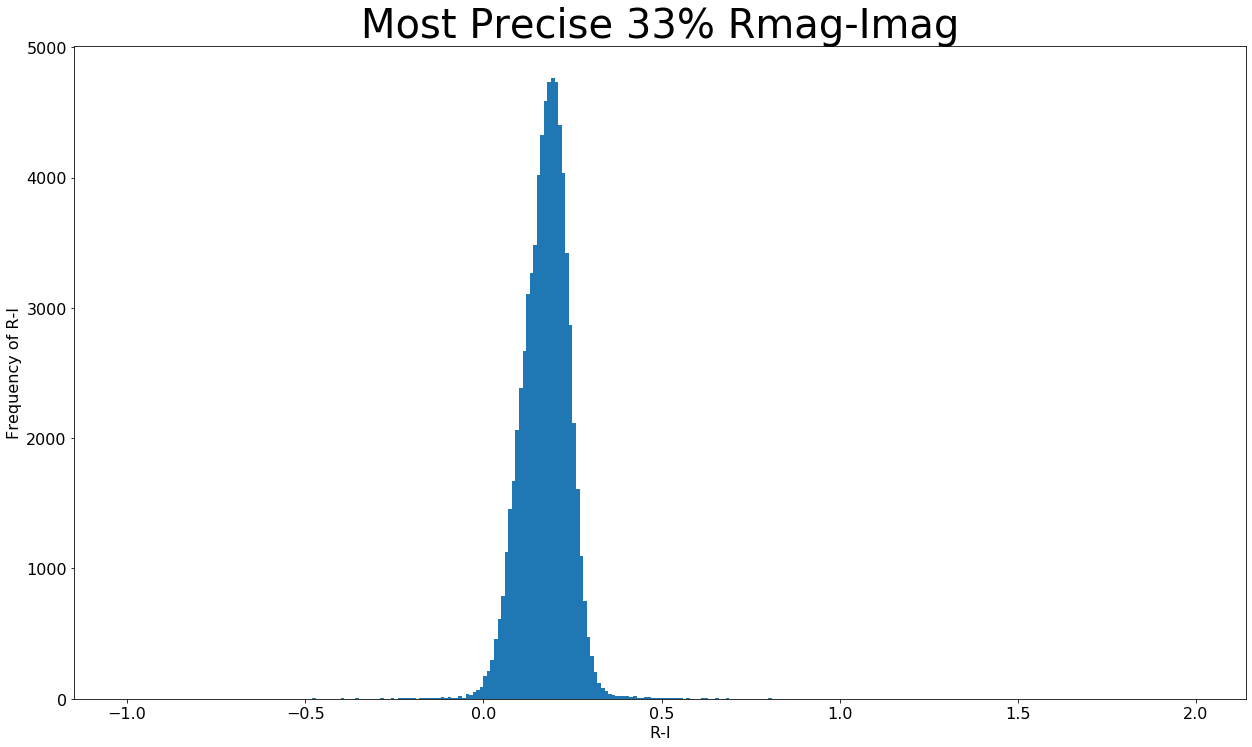

In [25]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(RIhists[4], bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.title('Most Precise 33% Rmag-Imag')
plt.show()

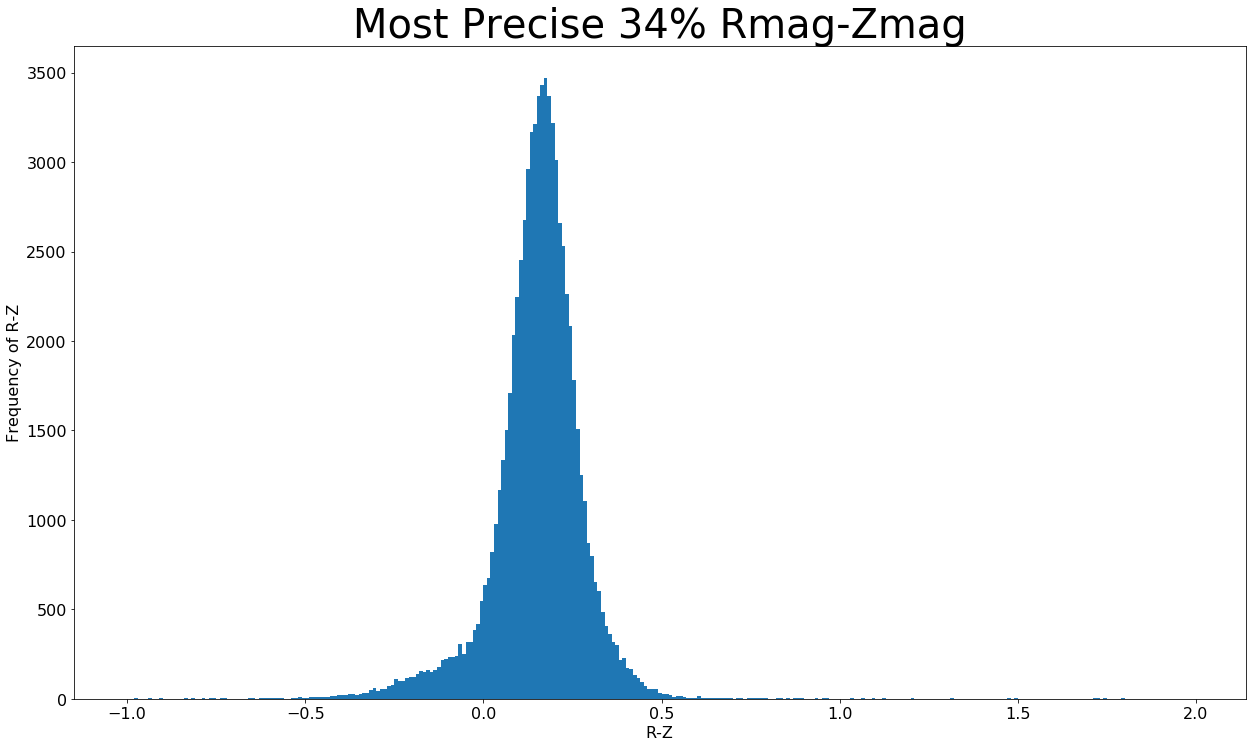

In [26]:
plt.figure(figsize=(21,12))

plt.hist(RZhists[11], bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.title('Most Precise 34% Rmag-Zmag')
plt.show()

In [27]:
len(RZhists[11])/len(RZhist)

0.3433750563055377

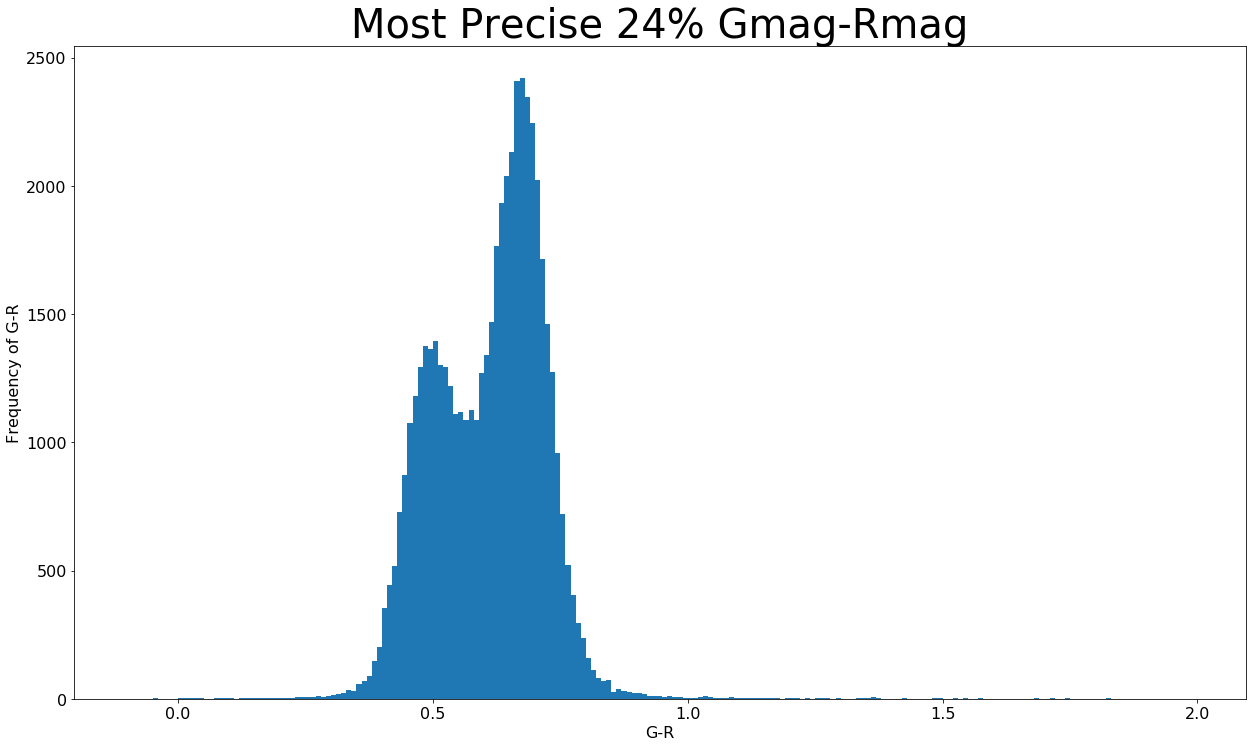

In [28]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(GRhists[4], bins=np.arange(-.1,2,0.01))
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.title('Most Precise 24% Gmag-Rmag')
plt.show()

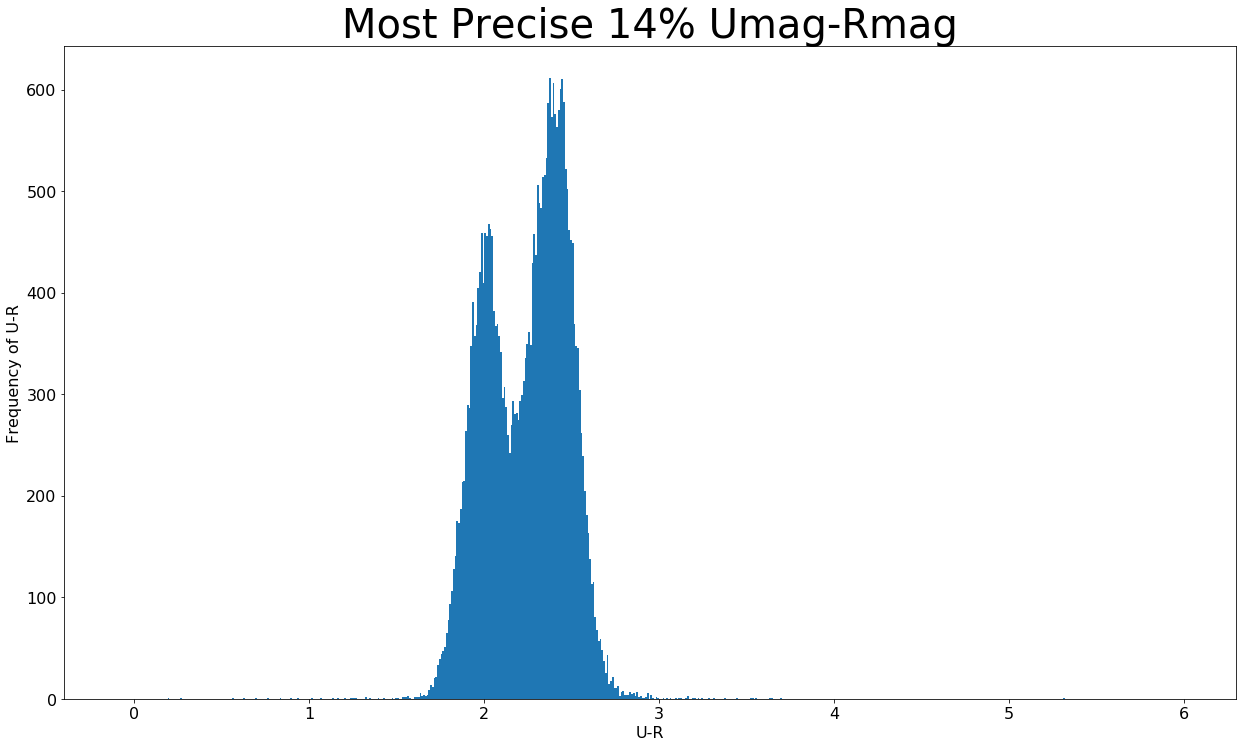

In [29]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(URhists[15], bins=np.arange(-0.1,6,0.01))
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
plt.title('Most Precise 14% Umag-Rmag')
plt.show()

Each dataset in GRhists is fitted to a sum of two gaussian curves. 
GRparams is a list of parameters for each curve fit onto the distributions in GRhists.

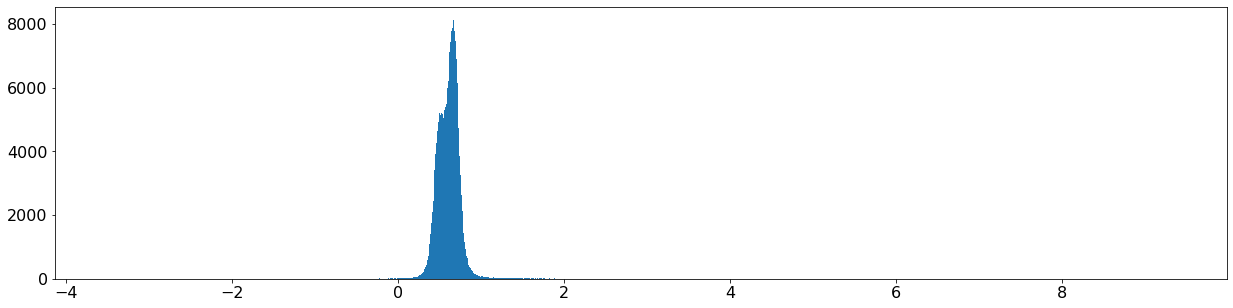

In [30]:
GRparams = []

for m in range(1,len(GRhists)):
    mparams = getparams2(GRhists[m],GR)
    GRparams.append(mparams)

Each gaussian curve that is fitted onto subsets of GR data are plotted together to show how the shape of the data changes at is refined.

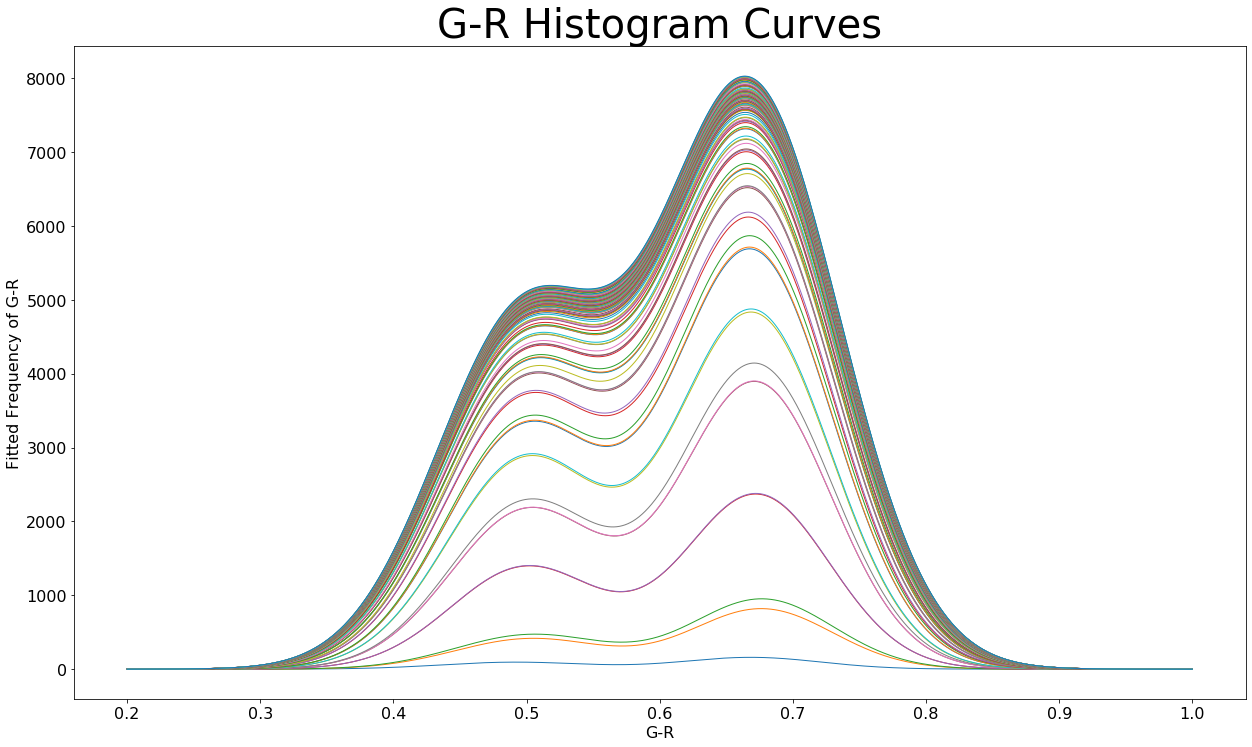

In [31]:
x_interval = np.linspace(0.2, 1.0, 10000)

plt.figure(figsize=(21,12))
plt.title('G-R Histogram Curves')
plt.ylabel('Fitted Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
for m in range(len(GRparams)):
    plt.plot(x_interval, twogaussians(x_interval, *GRparams[m]))


Separate gaussian curves are plotted, using the same coefficients as the previous plot. 

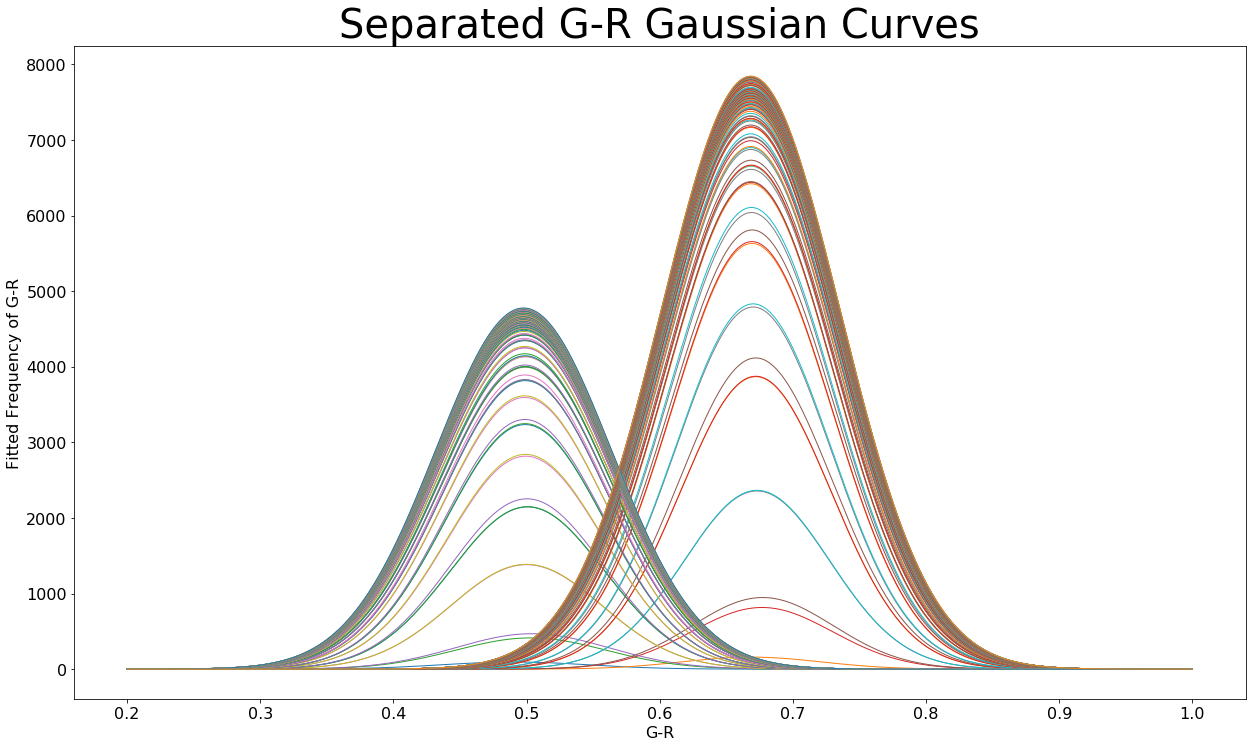

In [32]:
x_interval = np.linspace(0.2, 1.0, 10000)

plt.figure(figsize=(21,12))
plt.title('Separated G-R Gaussian Curves')
plt.ylabel('Fitted Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
for m in range(len(GRparams)):
    plt.plot(x_interval, gaussian(x_interval, GRparams[m][0],GRparams[m][1],GRparams[m][2]))
    plt.plot(x_interval, gaussian(x_interval, GRparams[m][3],GRparams[m][4],GRparams[m][5]))

The width of each gaussian at half-amplitude is calculated to examine how the shape of the distribution changes as the data is further refined.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[8.13145941e-08 1.31515044e-01] [1.41928703e-07 1.23770844e-01]


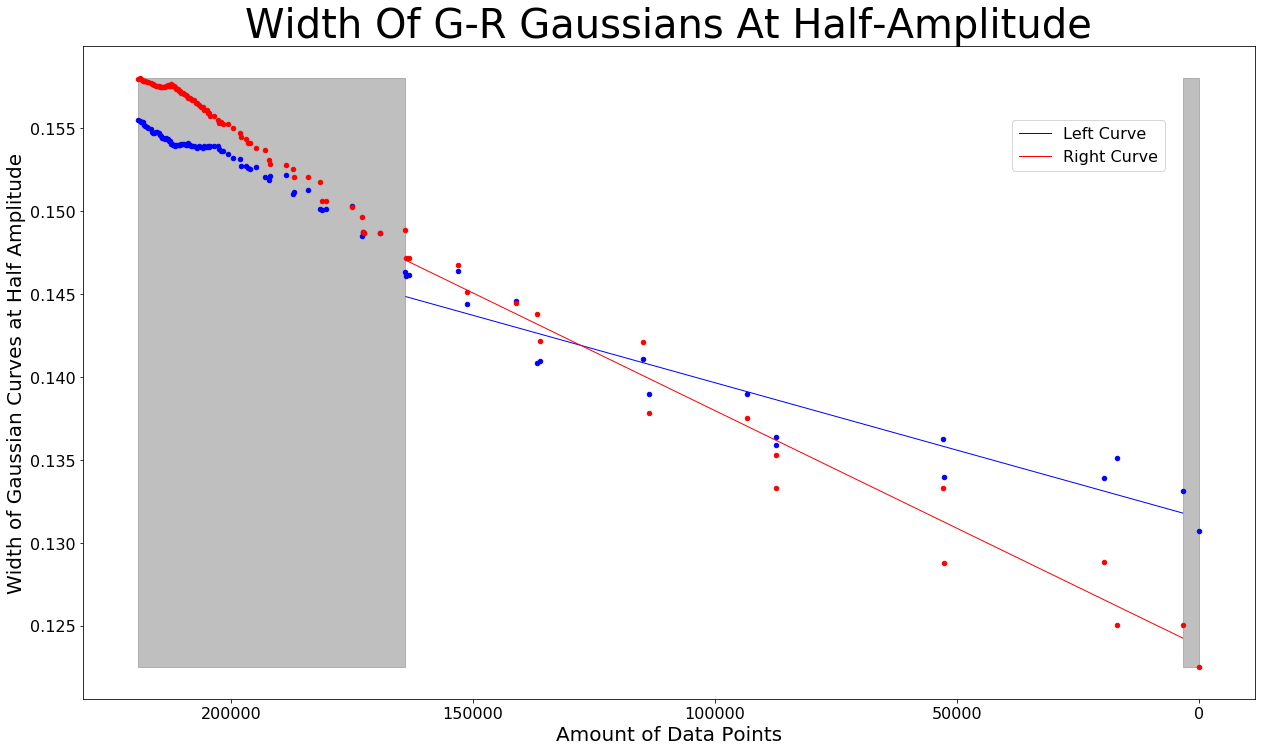

In [33]:
halfwidths1 = []
halfwidths2 = []
amps1 = []
amps2 = []
lengths = []
avgGR1 = []
avgGR2 = []
plt.figure(figsize=(21,12))
plt.title('Width Of G-R Gaussians At Half-Amplitude')
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
ax = plt.gca()
ax.invert_xaxis()
for m in range(len(GRparams)):
    avg1 = GRparams[m][0]
    avgGR1.append(avg1)
    amp1 = GRparams[m][1]
    stdev1 = GRparams[m][2]
    avg2 = GRparams[m][3]
    avgGR2.append(avg2)
    amp2 = GRparams[m][4]
    stdev2 = GRparams[m][5]
    lengths.append(len(GRhists[m]))
    zero1=brentq(halfgaussian,0.1,avg1,args=(avg1, amp1, stdev1))
    zero2=brentq(halfgaussian,avg1,0.8,args=(avg1, amp1, stdev1))
    zero3=brentq(halfgaussian,0.4,avg2,args=(avg2, amp2, stdev2))
    zero4=brentq(halfgaussian,avg2,0.8,args=(avg2, amp2, stdev2))
    zerodiff1 = zero2-zero1
    zerodiff2 = zero4-zero3
    halfwidths1.append(zerodiff1)
    halfwidths2.append(zerodiff2)
    amps1.append(amp1)
    amps2.append(amp2)
end = 18
plt.fill_between(lengths[end:],len(lengths[end:])*[max(halfwidths2)],len(lengths[end:])*[min(halfwidths2)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths2)],len(lengths[:2])*[min(halfwidths2)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths1,s=20,color="blue")
plt.scatter(lengths,halfwidths2,s=20,color="red")

HAparamsGR1, _ = curve_fit(linearline,lengths[1:end],halfwidths1[1:end])
HAparamsGR2, _ = curve_fit(linearline,lengths[1:end],halfwidths2[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsGR1),color="blue",label = "Left Curve")
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsGR2),color="red", label = "Right Curve")
plt.legend(loc='best', bbox_to_anchor=(0.43, 0.4, 0.5, 0.5),fontsize='16')


print(HAparamsGR1,HAparamsGR2)

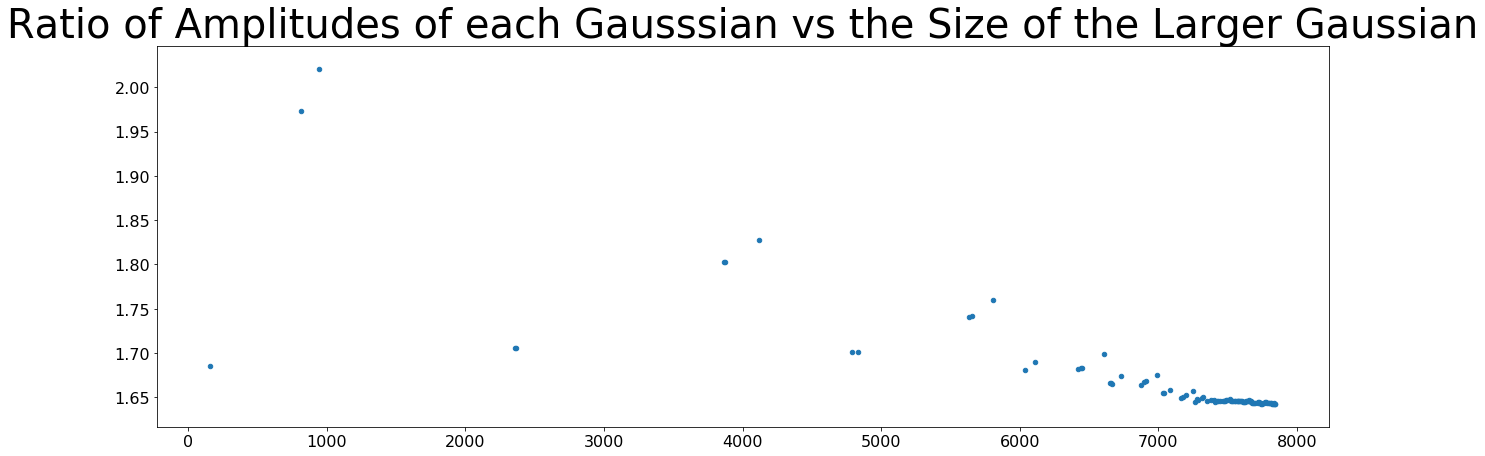

In [34]:
ampratios = []
bigamps = []
plt.figure(figsize=(21,7))
plt.title('Ratio of Amplitudes of each Gausssian vs the Size of the Larger Gaussian')
for m in range(len(GRparams)):
    ratio = GRparams[m][4]/GRparams[m][1]
    bigamp = GRparams[m][4]
    ampratios.append(ratio)
    bigamps.append(bigamp)
plt.scatter(bigamps,ampratios,s=20)

Each dataset in URhists is fitted to a sum of two gaussian curves. 
URparams is a list of parameters for each curve fit onto the distributions in URhists.

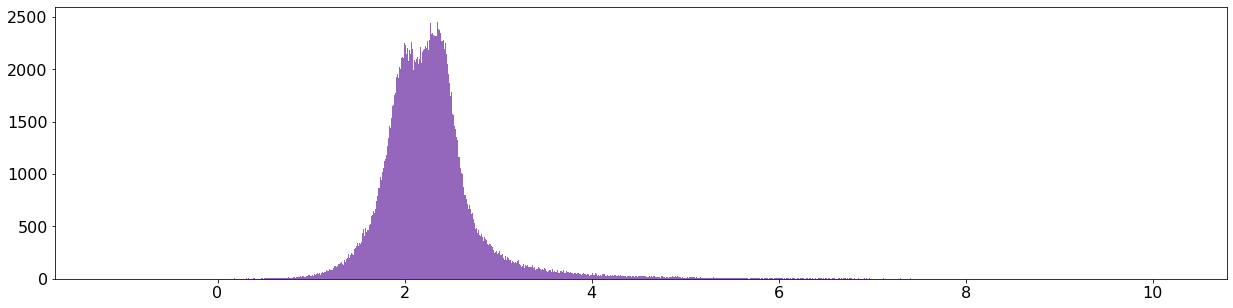

In [35]:
URparams = []
for m in range(1,len(URhists)):
    mparams = getparams2(URhists[m],UR)
    URparams.append(mparams)

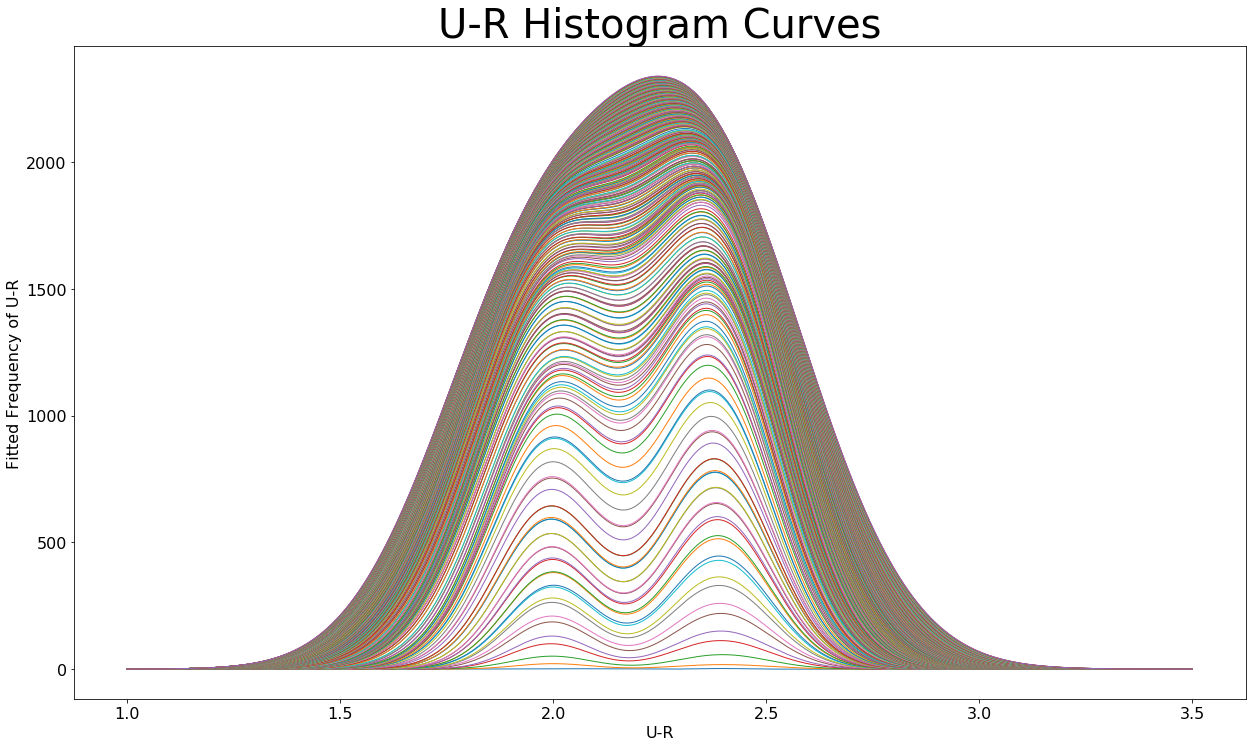

In [36]:
x_interval = np.linspace(1, 3.5, 10000)

plt.figure(figsize=(21,12))
plt.title('U-R Histogram Curves')
plt.ylabel('Fitted Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
for m in range(len(URparams)):
    plt.plot(x_interval, twogaussians(x_interval, *URparams[m]))

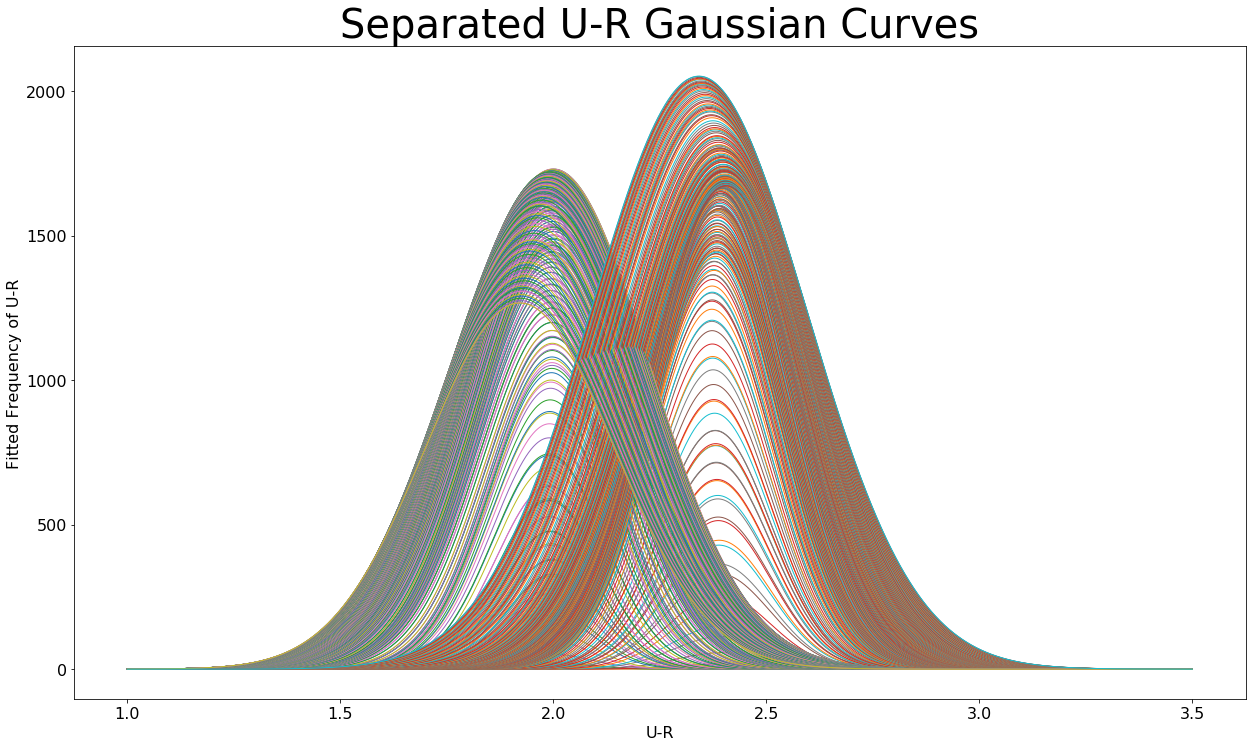

In [37]:
x_interval = np.linspace(1, 3.5, 10000)

plt.figure(figsize=(21,12))
plt.title('Separated U-R Gaussian Curves')
plt.ylabel('Fitted Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
for m in range(len(URparams)):
    plt.plot(x_interval, gaussian(x_interval, URparams[m][0],URparams[m][1],URparams[m][2]))
    plt.plot(x_interval, gaussian(x_interval, URparams[m][3],URparams[m][4],URparams[m][5]))

The width of each gaussian at half-amplitude is calculated to examine how the shape of the distribution changes as the data is further refined.

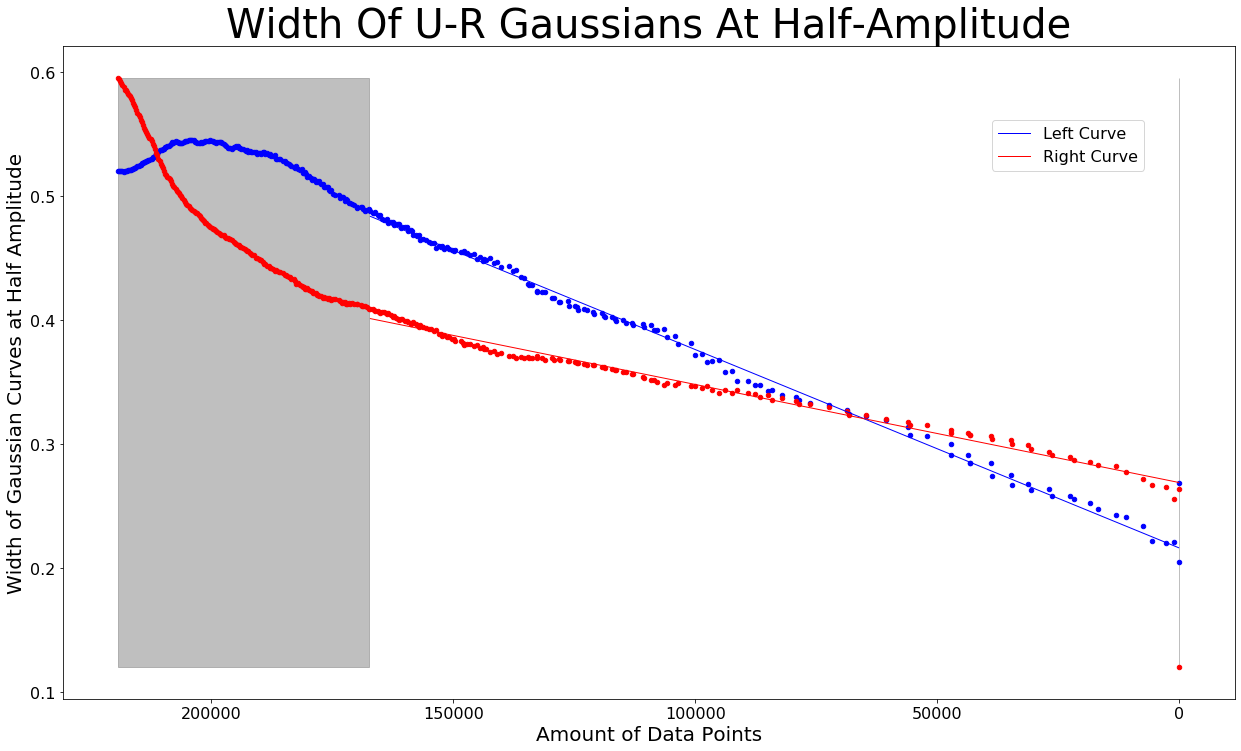

In [38]:
halfwidths1 = []
halfwidths2 = []
amps1 = []
amps2 = []
lengths = []
avgUR1 = []
avgUR2 = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of U-R Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(URparams)):
    avg1 = URparams[m][0]
    avgUR1.append(avg1)
    amp1 = URparams[m][1]
    stdev1 = URparams[m][2]
    avg2 = URparams[m][3]
    avgUR2.append(avg2)
    amp2 = URparams[m][4]
    stdev2 = URparams[m][5]
    lengths.append(len(URhists[m]))
    zero1=brentq(halfgaussian,1,avg1,args=(avg1, amp1, stdev1))
    zero2=brentq(halfgaussian,avg1,3,args=(avg1, amp1, stdev1))
    zero3=brentq(halfgaussian,1,avg2,args=(avg2, amp2, stdev2))
    zero4=brentq(halfgaussian,avg2,3,args=(avg2, amp2, stdev2))
    zerodiff1 = zero2-zero1
    zerodiff2 = zero4-zero3
    halfwidths1.append(zerodiff1)
    halfwidths2.append(zerodiff2)
    amps1.append(amp1)
    amps2.append(amp2)
end = 155
plt.fill_between(lengths[end:],len(lengths[end:])*[max(halfwidths2)],len(lengths[end:])*[min(halfwidths2)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths2)],len(lengths[:2])*[min(halfwidths2)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths1,s=20,color="blue")
plt.scatter(lengths,halfwidths2,s=20,color="red")

HAparamsUR1, _ = curve_fit(linearline,lengths[1:end],halfwidths1[1:end])
HAparamsUR2, _ = curve_fit(linearline,lengths[1:end],halfwidths2[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsUR1),color="blue", label = "Left Curve")
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsUR2),color="red", label = "Right Curve")
plt.legend(loc='best', bbox_to_anchor=(0.43, 0.4, 0.5, 0.5),fontsize='16')



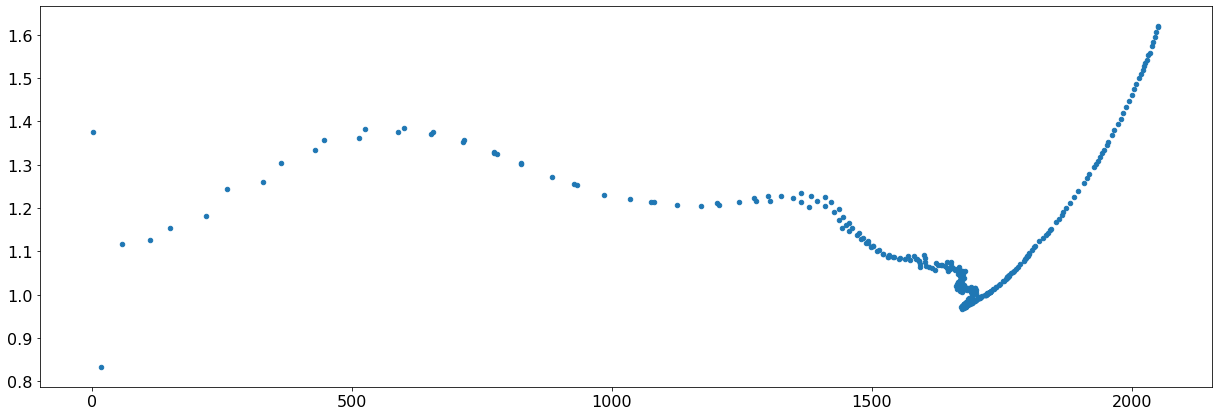

In [39]:
ampratios = []
bigamps = []
plt.figure(figsize=(21,7))
for m in range(len(URparams)):
    ratio = URparams[m][4]/URparams[m][1]
    bigamp = URparams[m][4]
    ampratios.append(ratio)
    bigamps.append(bigamp)
plt.scatter(bigamps,ampratios,s=20)

Each dataset in RIists is fitted to a gaussian curve. 
RIparams is a list of parameters for each curve fit onto the distributions in RIhists.

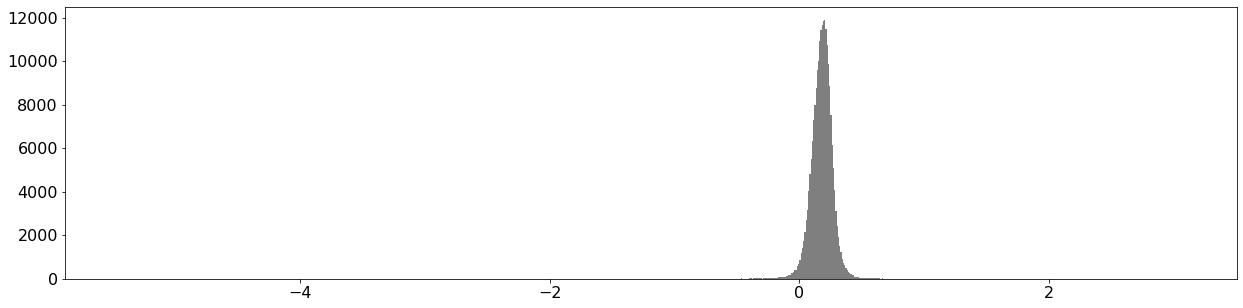

In [40]:
RIparams = []
for m in range(1,len(RIhists)):
    mparams = getparams1(RIhists[m],RI)
    RIparams.append(mparams)

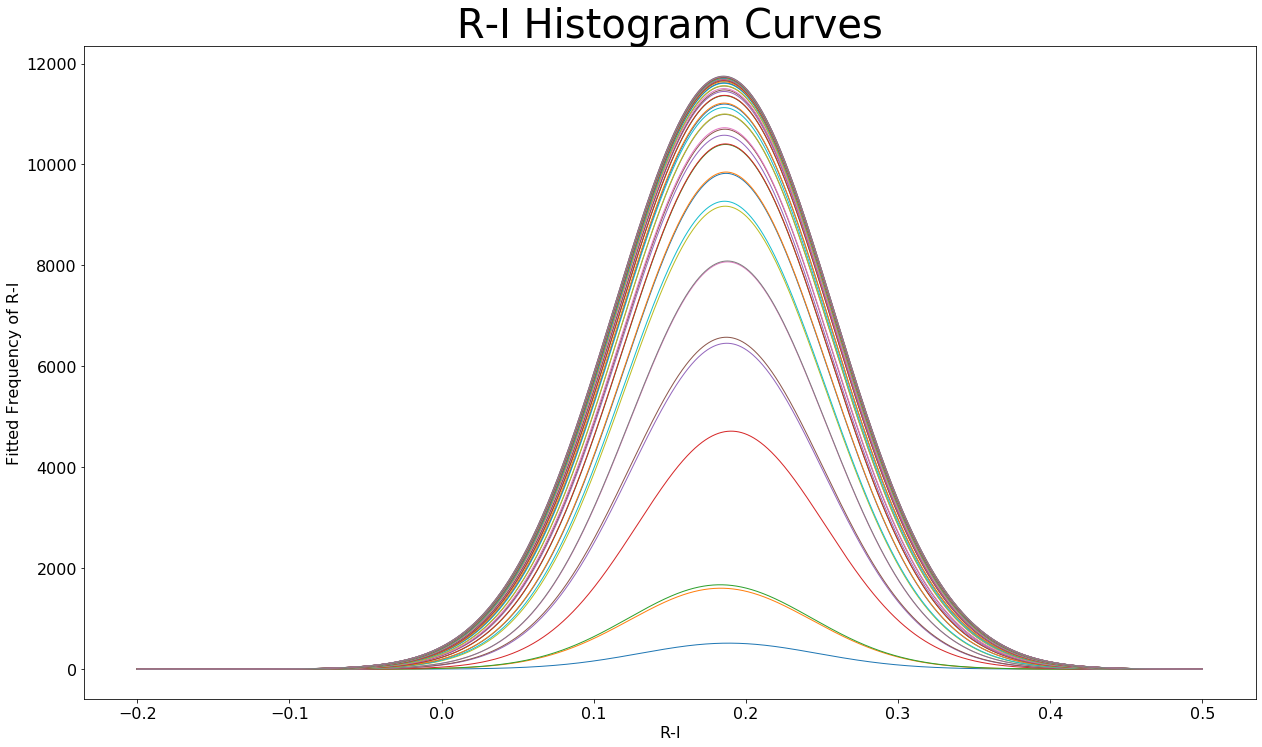

In [41]:
x_interval = np.linspace(-0.2, 0.5, 10000)

plt.figure(figsize=(21,12))
plt.title('R-I Histogram Curves')
plt.ylabel('Fitted Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
for m in range(len(RIparams)):
    plt.plot(x_interval, gaussian(x_interval, *RIparams[m]))

The width of each gaussian at half-amplitude is calculated to examine how the shape of the distribution changes as the data is further refined.

[1.10654158e-07 1.40016466e-01]


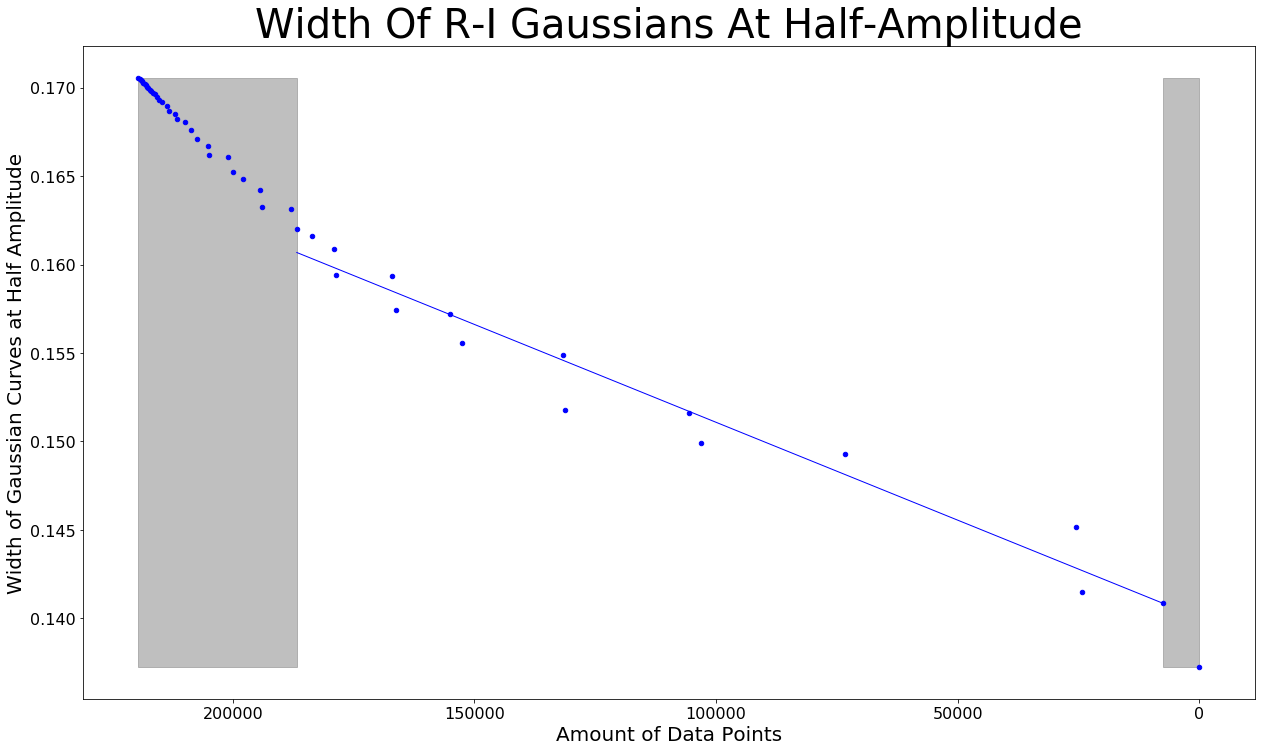

In [42]:
halfwidths = []
amps = []
lengths = []
avgRI = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of R-I Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(RIparams)):
#for m in range(10):
    avg = RIparams[m][0]
    avgRI.append(avg)
    amp = RIparams[m][1]
    stdev = RIparams[m][2]
    lengths.append(len(RIhists[m]))
    zero1=brentq(halfgaussian,0,avg,args=(avg, amp, stdev))
    zero2=brentq(halfgaussian,avg,3,args=(avg, amp, stdev))
    zerodiff = zero2-zero1
    halfwidths.append(zerodiff)
    amps.append(amp)
end = 17
plt.fill_between(lengths[end-1:],len(lengths[end-1:])*[max(halfwidths)],len(lengths[end-1:])*[min(halfwidths)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths)],len(lengths[:2])*[min(halfwidths)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths,s=20,color="blue")

HAparamsRI, _ = curve_fit(linearline,lengths[1:end],halfwidths[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsRI),color="blue")
print(HAparamsRI)

Each dataset in RZists is fitted to a gaussian curve. 
RZparams is a list of parameters for each curve fit onto the distributions in RZhists.

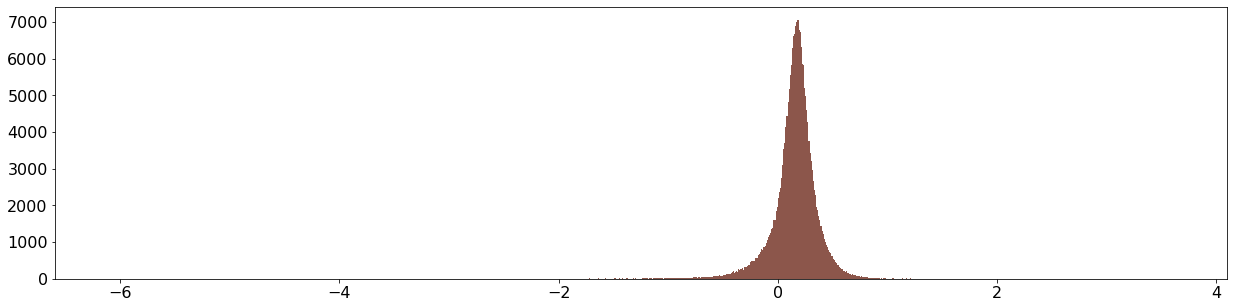

In [43]:
RZparams = []
for m in range(1,len(RZhists)):
    mparams = getparams1(RZhists[m],RZ)
    RZparams.append(mparams)

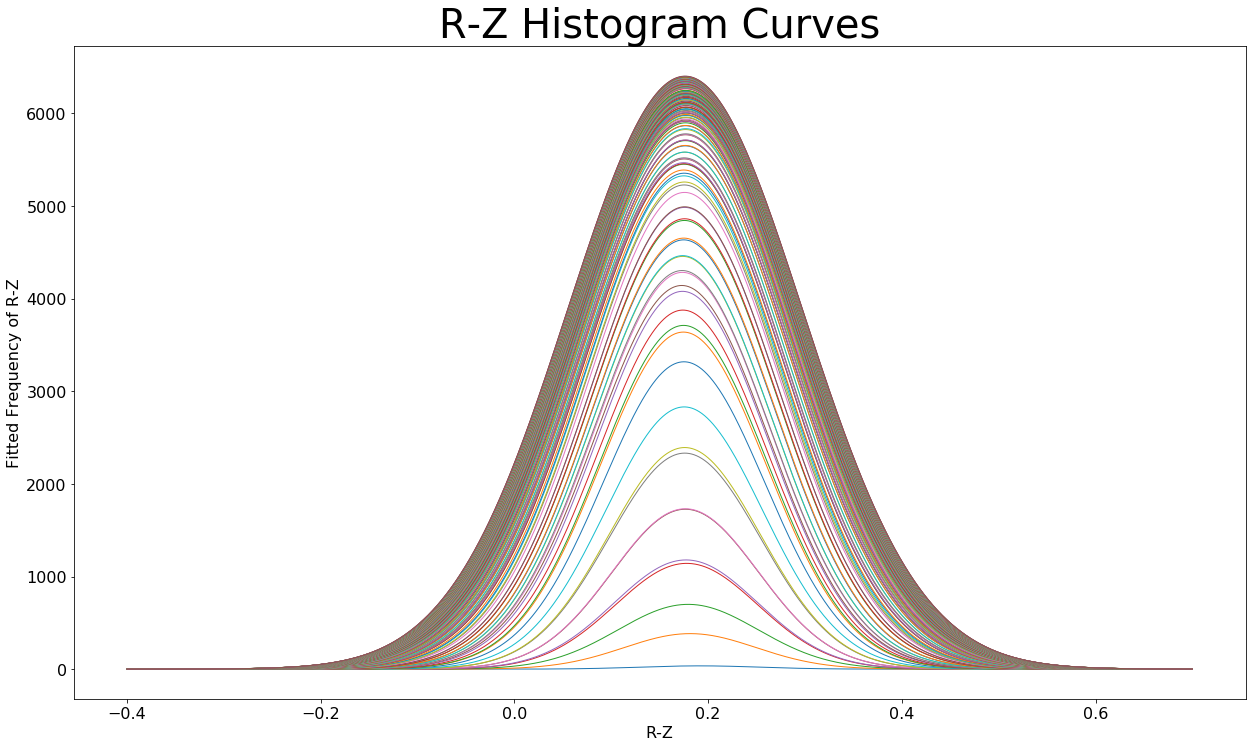

In [44]:
x_interval = np.linspace(-0.4, 0.7, 10000)

plt.figure(figsize=(21,12))
plt.title('R-Z Histogram Curves')
plt.ylabel('Fitted Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
for m in range(len(RZparams)):
    plt.plot(x_interval, gaussian(x_interval, *RZparams[m]))

The width of each gaussian at half-amplitude is calculated to examine how the shape of the distribution changes as the data is further refined.

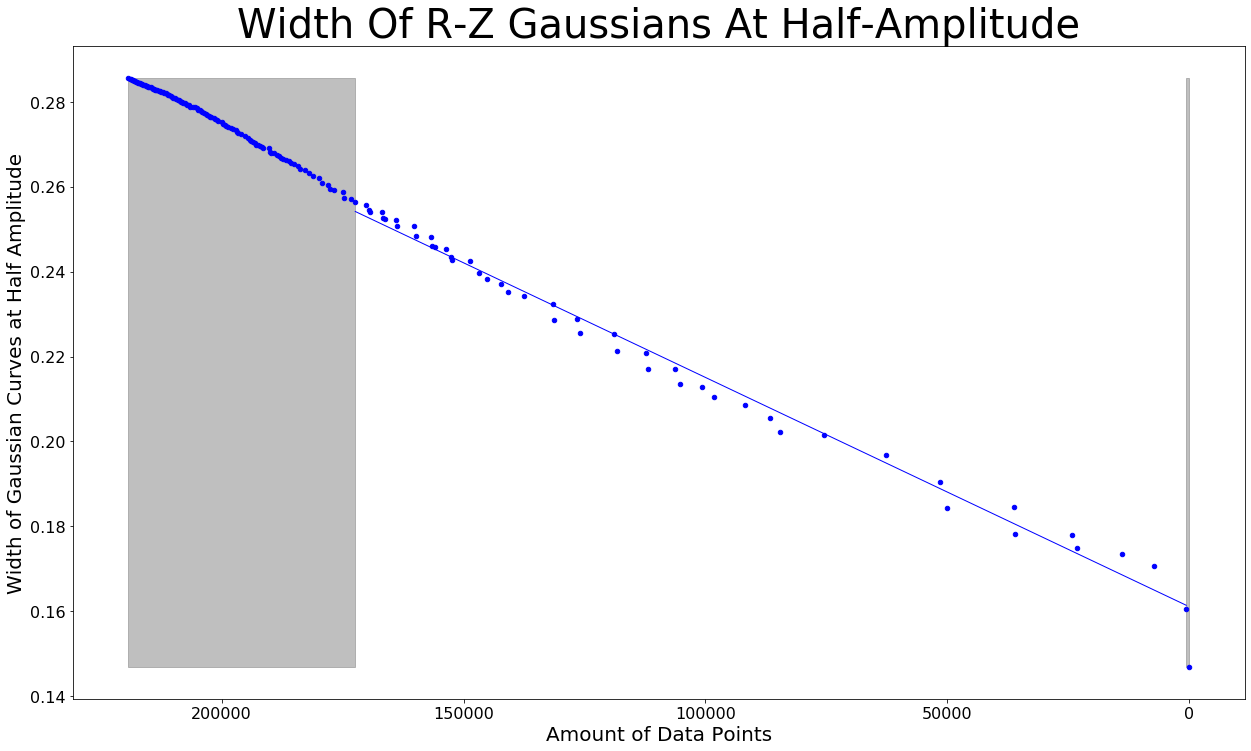

In [45]:
halfwidths = []
amps = []
lengths = []
avgRZ = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of R-Z Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(RZparams)):
#for m in range(10):
    avg = RZparams[m][0]
    avgRZ.append(avg)
    amp = RZparams[m][1]
    stdev = RZparams[m][2]
    lengths.append(len(RZhists[m]))
    zero1=brentq(halfgaussian,0,avg,args=(avg, amp, stdev))
    zero2=brentq(halfgaussian,avg,.5,args=(avg, amp, stdev))
    zerodiff = zero2-zero1
    halfwidths.append(zerodiff)
    amps.append(amp)
end = 50
plt.fill_between(lengths[end-1:],len(lengths[end-1:])*[max(halfwidths)],len(lengths[end-1:])*[min(halfwidths)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths)],len(lengths[:2])*[min(halfwidths)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths,s=20,color="blue")

HAparamsRZ, _ = curve_fit(linearline,lengths[1:end],halfwidths[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsRZ),color="blue")


The standard deviation of each dataset as the amount of uncertainty approches zero is extrapolated using the lines that are fitted onto the widths of gaussians at half-amplitude vs number of data points. 

This calculated standard deviation, and the size of each unrefined dataset are used to generate gaussian functions that are normalized to the size of each dataset.

The gaussian functions are the proposed shape of the datasets if the measurements could be taken with no errors.

In [46]:
#calculate standard deviation for each gaussian as the amplitude approaches zero

sigmaGR1 = HAparamsGR1[1] / 2.355
sigmaGR2 = HAparamsGR2[1] / 2.355
sigmaUR1 = HAparamsUR1[1] / 2.355
sigmaUR2 = HAparamsUR2[1] / 2.355
sigmaRI = HAparamsRI[1] / 2.355
sigmaRZ = HAparamsRZ[1] / 2.355

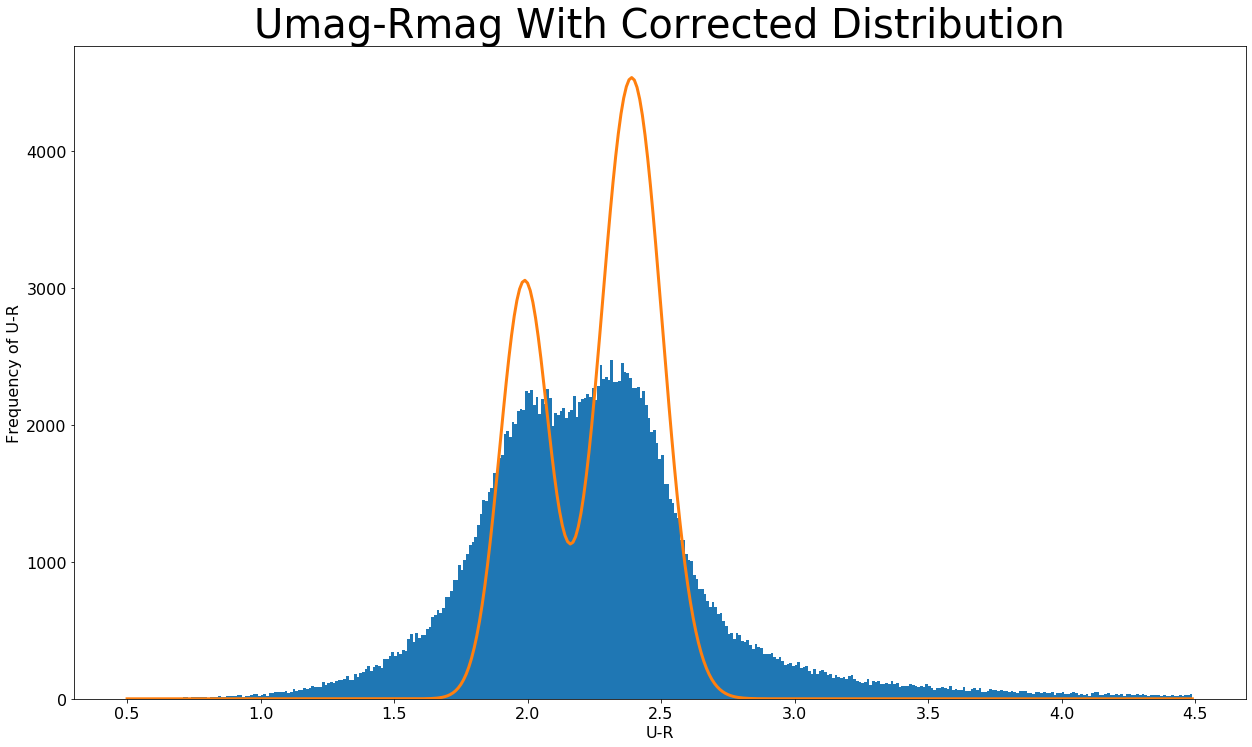

In [47]:
x_interval = np.arange(0.5,4.5,0.01)
averageUR1 = np.average(avgUR1)
averageUR2 = np.average(avgUR2)
newampUR1 = URparams[-1][1]*URparams[-1][2]/sigmaUR1
newampUR2 = URparams[-1][4]*URparams[-1][5]/sigmaUR2

plt.figure(figsize=(21,12))
plt.hist(URhists[-1], bins=np.arange(0.5,4.5,0.01))
plt.title('Umag-Rmag With Corrected Distribution')
plt.plot(x_interval, twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2),linewidth=3)
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
#plt.plot(x_interval, twogaussians(x_interval, *URparams[-1]))
plt.show()

In [48]:
area = sum(twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))*.01
print('area of curve is ',area)
print('area of histogram is ',len(URhists[-1])*.01)

area of curve is  2000.6224427748987
area of histogram is  2194.84


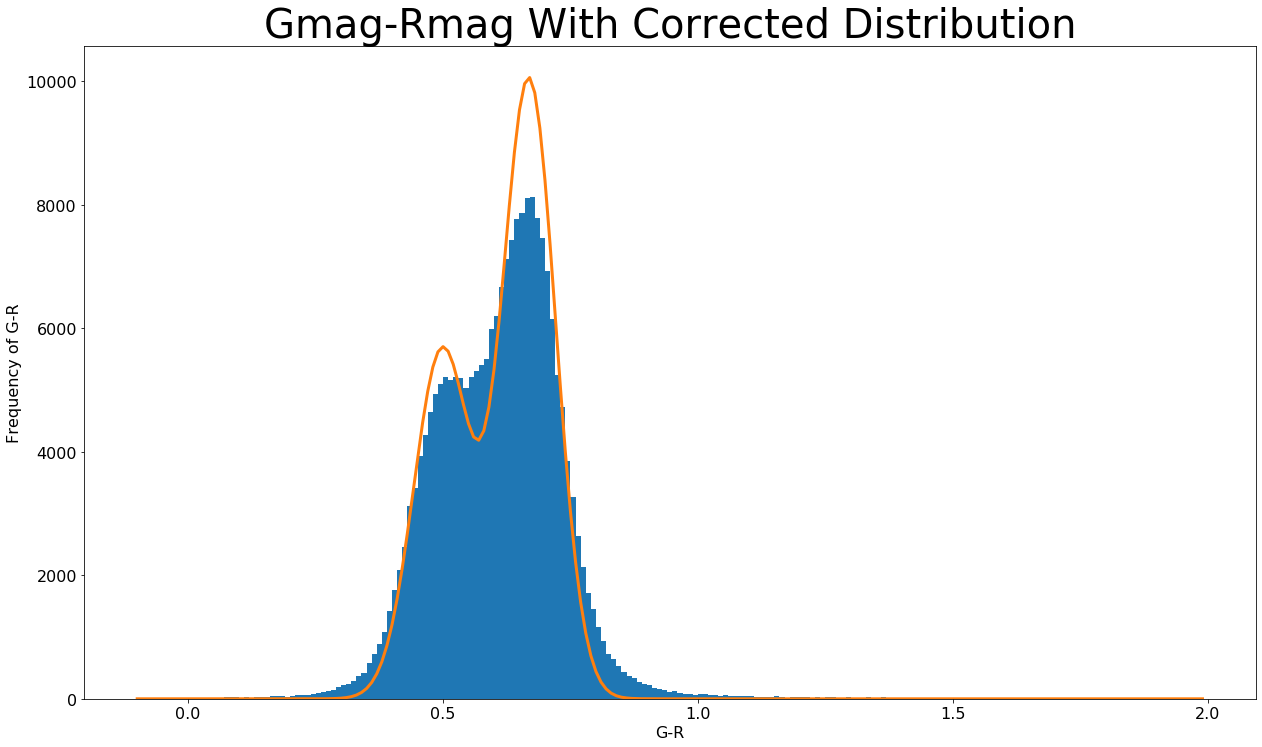

In [49]:
x_interval =np.arange(-0.1,2,0.01)
averageGR1 = np.average(avgGR1)
averageGR2 = np.average(avgGR2)
newampGR1 = GRparams[-1][1]*GRparams[-1][2]/sigmaGR1
newampGR2 = GRparams[-1][4]*GRparams[-1][5]/sigmaGR2

plt.figure(figsize=(21,12))
plt.hist(GRhists[-1], bins=np.arange(-0.1,2,0.01))
plt.title('Gmag-Rmag With Corrected Distribution')
plt.plot(x_interval, twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2),linewidth=3)
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.show()

In [50]:
area = sum(twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2))*.01
print('area of curve is ',area)
print('area of histogram is ',len(GRhists[-1])*.01)

area of curve is  2109.9743535159178
area of histogram is  2193.42


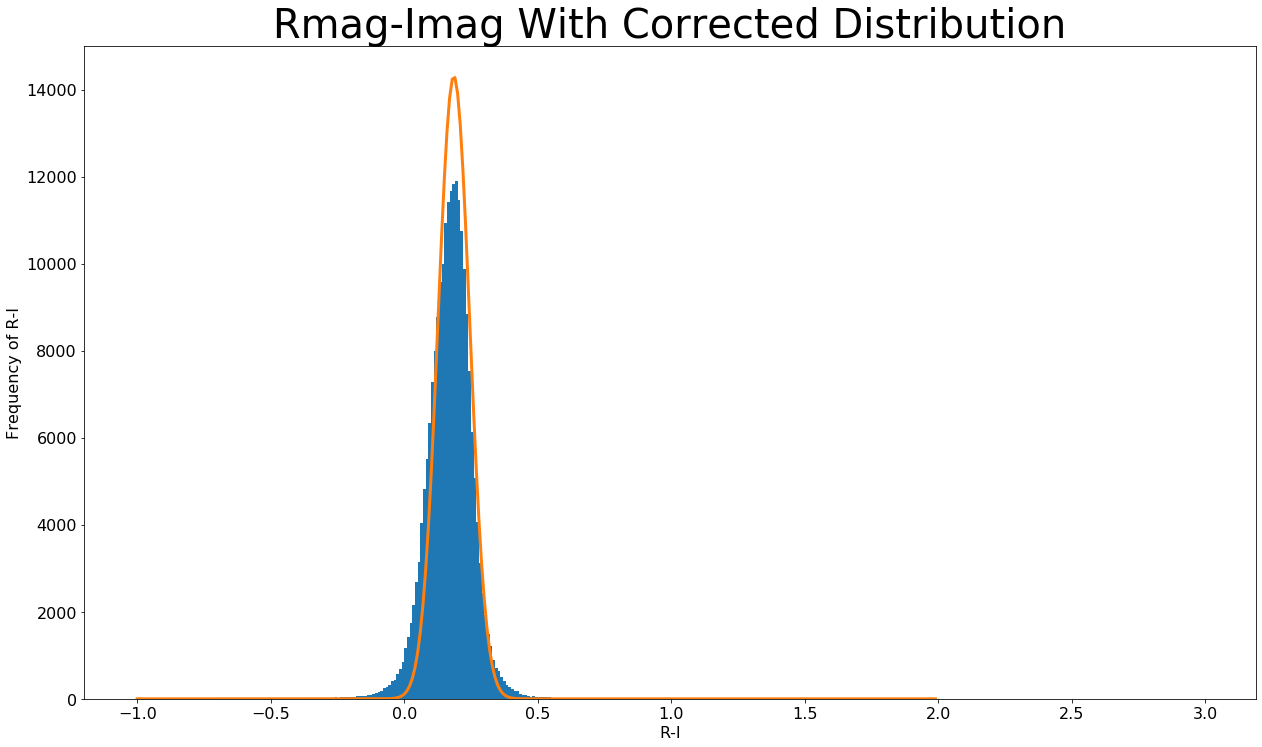

In [51]:
x_interval = np.arange(-1,2,0.01)
averageRI = np.average(avgRI)

newampRI = RIparams[-1][1]*RIparams[-1][2]/sigmaRI

plt.figure(figsize=(21,12))
plt.hist(RIhists[-1], bins=np.arange(-1,3,0.01))
plt.title('Rmag-Imag With Corrected Distribution')
plt.plot(x_interval, gaussian(x_interval, averageRI, newampRI, sigmaRI),linewidth=3)
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.show()

In [52]:
area = sum(gaussian(np.arange(min(RIhists[-1]),max(RIhists[-1]),0.01), averageRI, newampRI, sigmaRI))*.01
print('area of curve is ',area)
print('area of histogram is ',len(RIhists[-1])*.01)

area of curve is  2132.995564730537
area of histogram is  2197.53


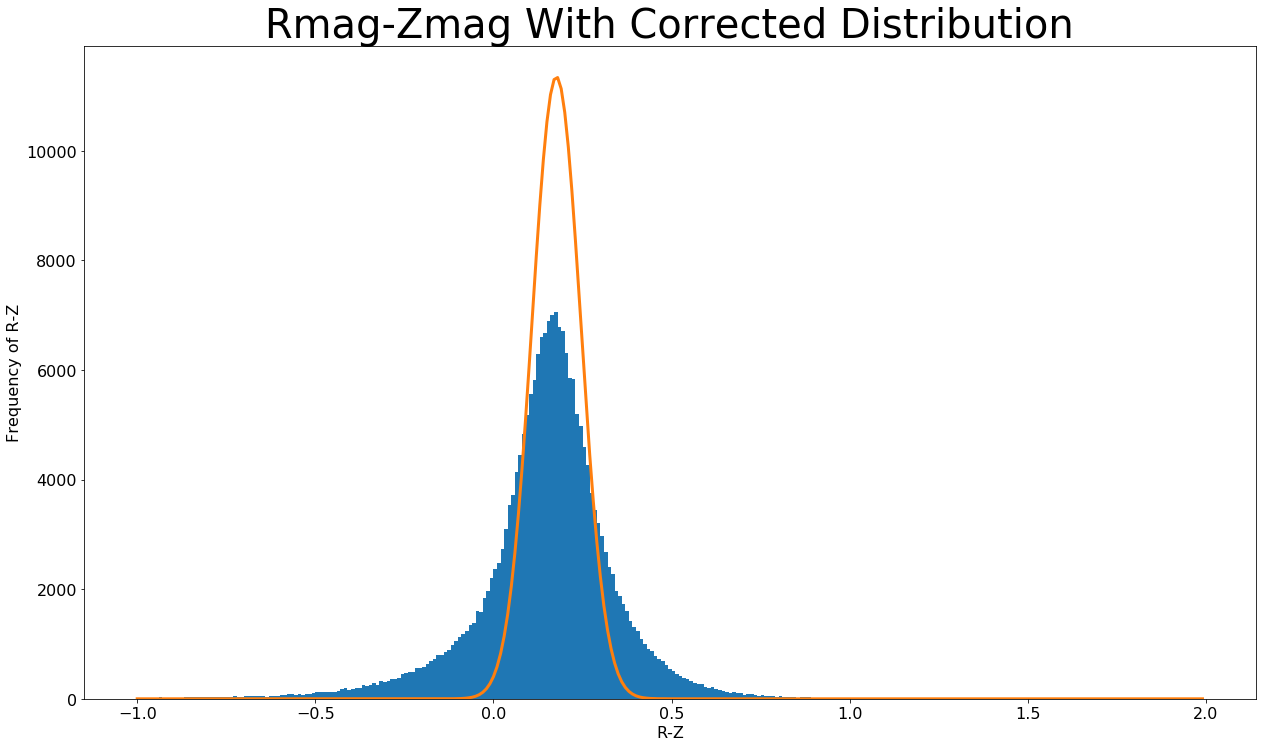

In [53]:
x_interval = np.arange(-1,2,0.01)
averageRZ = np.average(avgRZ)

newampRZ = RZparams[-1][1]*RZparams[-1][2]/sigmaRZ

plt.figure(figsize=(21,12))
plt.hist(RZhists[-1], bins=np.arange(-1,2,0.01))
plt.title('Rmag-Zmag With Corrected Distribution')
plt.plot(x_interval, gaussian(x_interval, averageRZ, newampRZ, sigmaRZ),linewidth=3)
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.show()

In [54]:
area = sum(gaussian(np.arange(min(RZhists[-1]),max(RZhists[-1]),0.01), averageRZ, newampRZ, sigmaRZ))*.01
print('area of curve is ',area)
print('area of histogram is ',len(RZhists[-1])*.01)

area of curve is  1946.0823628207947
area of histogram is  2194.8


Define functions that are used to generate simulated data.
sim_data generates distributions that are shaped like a gaussian
sim_data2 takes a set of x,y coordinates and generates data to fit that distribution

In [55]:
#pass this function l=length of desired dataset, xi and xf are the min and max x values
# f is the function, accepting one input variable, x-coordinate of the curve that the simulated data is supposed to match

def sim_data(l,xi,xf,ymax,f):
    newsims = []
    while len(newsims) < l:
        u = ((xf-xi)*r.random() + xi)
        p = f(u)
        v = ymax*r.random()
        if v <= p:
            newsims.append(u)
    return newsims

def sim_data2(l,ymax,xlist,ylist):
    newsims = []
    while len(newsims) < l:
        i = r.sample(range(len(xlist)),1)[0]
        p = ylist[i]
        v = ymax*r.random()
        if v <= p:
            newsims.append(xlist[i])
    return newsims


Define function that sorts through the origianal U, R, G, I, Z data, and saves data for measurements that have no NaN values. 
This function returns a clean dataset of light intensity ratios, the uncertainty in the magnitues of each light intensity measurement, and the cleaned up lists of each light intensity measurement. 

In [56]:
def get_err_distribution(list1,err1,err2,maglist1,maglist2):
    newhist = []
    allerrs = []
    mag1 = []
    mag2 = []
    for i in range(len(err1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            newerr = err1[i]*err2[i]
            allerrs.append(newerr)
            newhist.append(list1[i])
            mag1.append(maglist1[i])
            mag2.append(maglist2[i])
    return newhist, allerrs, mag1, mag2

In [57]:
URdata = get_err_distribution(UR,u_err,r_err,u_mag,r_mag)[0]
URerr = get_err_distribution(UR,u_err,r_err,u_mag,r_mag)[1]
Udata = get_err_distribution(UR,u_err,r_err,u_mag,r_mag)[2]
Rdata = get_err_distribution(UR,u_err,r_err,u_mag,r_mag)[3]
GRdata = get_err_distribution(GR,g_err,r_err,g_mag,r_mag)[0]
GRerr = get_err_distribution(GR,g_err,r_err,g_mag,r_mag)[1]
Gdata = get_err_distribution(GR,g_err,r_err,g_mag,r_mag)[2]
RdataGR = get_err_distribution(GR,g_err,r_err,g_mag,r_mag)[3]

RIdata = get_err_distribution(RI,r_err,i_err,r_mag,i_mag)[0]
RIerr = get_err_distribution(RI,r_err,i_err,r_mag,i_mag)[1]
RdataRI = get_err_distribution(RI,r_err,i_err,r_mag,i_mag)[2]
Idata = get_err_distribution(RI,r_err,i_err,r_mag,i_mag)[3]

RZdata = get_err_distribution(RZ,r_err,z_err,r_mag,z_mag)[0]
RZerr = get_err_distribution(RZ,r_err,z_err,r_mag,z_mag)[1]
RdataRZ = get_err_distribution(RZ,r_err,z_err,r_mag,z_mag)[2]
Zdata = get_err_distribution(RZ,r_err,z_err,r_mag,z_mag)[3]

Generate simulated data that is shaped like the aforementioned gaussian curves

In [58]:
URsim = lambda a : twogaussians(a, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2)
GRsim = lambda a : twogaussians(a, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2)
RIsim = lambda a : gaussian(a, averageRI, newampRI, sigmaRI)
RZsim = lambda a : gaussian(a, averageRZ, newampRZ, sigmaRZ)

In [59]:
x_interval = np.arange(0.5,4.5,0.01)
URymax = max(twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))
URsimdata = sim_data(len(URdata),0.5,4.5,URymax,URsim)

In [60]:
x_interval =np.arange(-0.1,2,0.01)
GRymax = max(twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2))
GRsimdata = sim_data(len(GRdata),-0.1,2,GRymax,GRsim)

In [61]:
x_interval = np.arange(-1,2,0.01)
RIymax = max(gaussian(x_interval, averageRI, newampRI, sigmaRI))
RIsimdata = sim_data(len(RIdata),-1,2,RIymax,RIsim)

In [62]:
x_interval = np.arange(-1,2,0.01)
RZymax = max(gaussian(x_interval, averageRZ, newampRZ, sigmaRZ))
RZsimdata = sim_data(len(RZdata),-1,2,RZymax,RZsim)

Plot the simulated datasets with the gaussian curves used to generate them

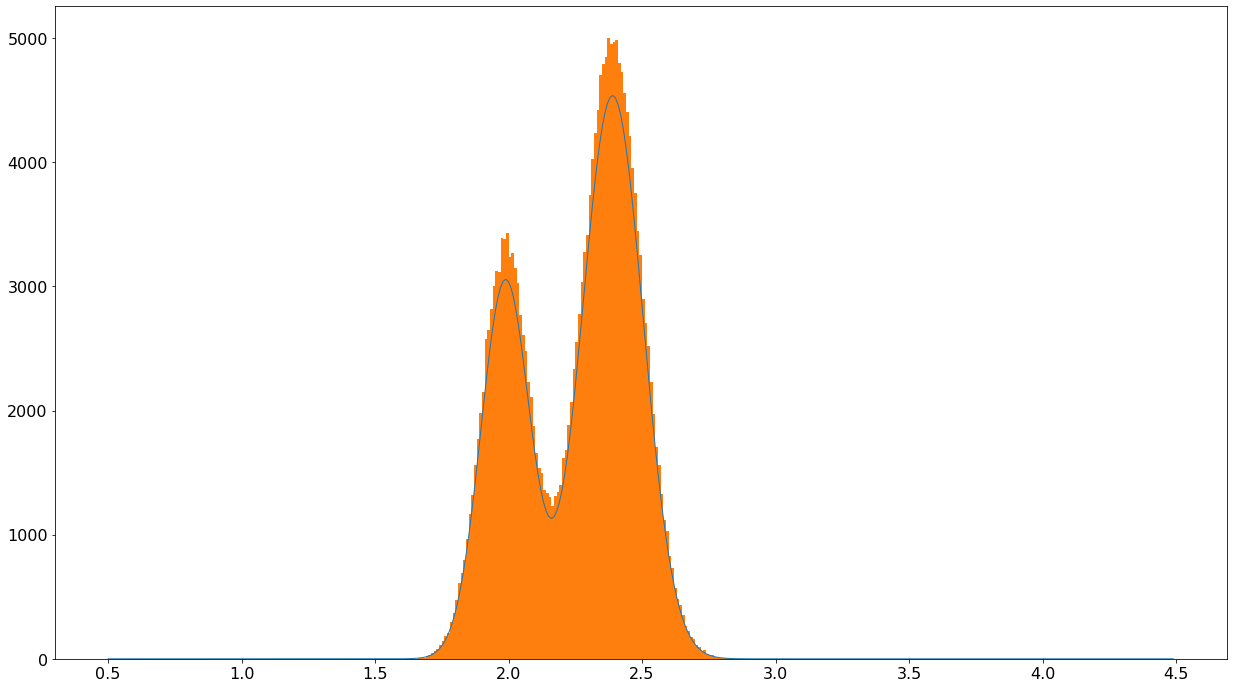

In [63]:
x_interval = np.arange(0.5,4.5,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))
plt.hist(URsimdata, bins=np.arange(0.5,4.5,0.01))
plt.show()

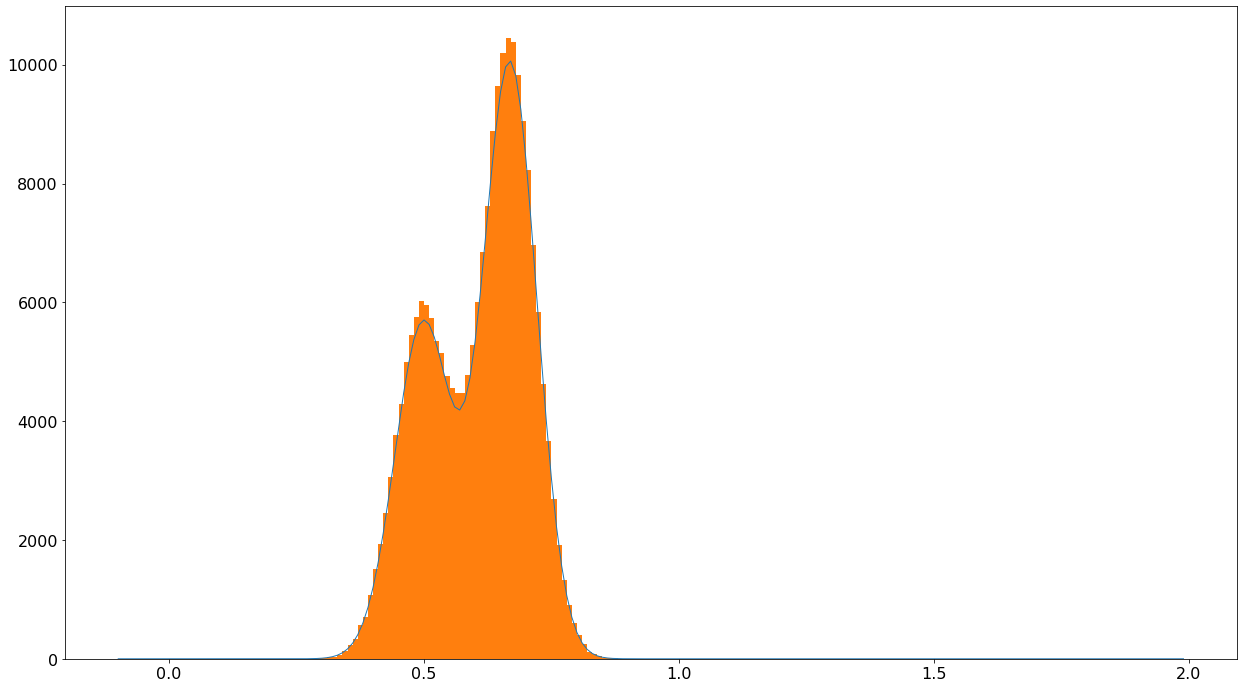

In [64]:
x_interval =np.arange(-0.1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2))
plt.hist(GRsimdata, bins=np.arange(-0.1,2,0.01))
plt.show()

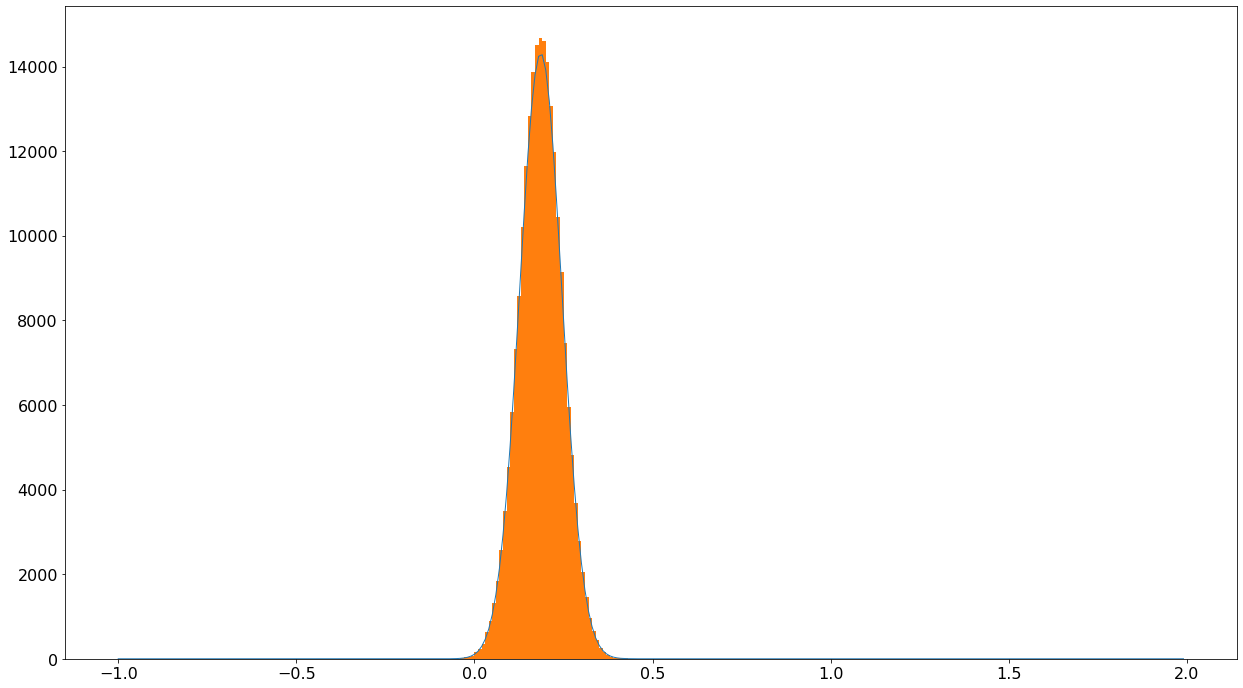

In [65]:
x_interval = np.arange(-1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,gaussian(x_interval, averageRI, newampRI, sigmaRI))
plt.hist(RIsimdata, bins=np.arange(-1,2,0.01))
plt.show()

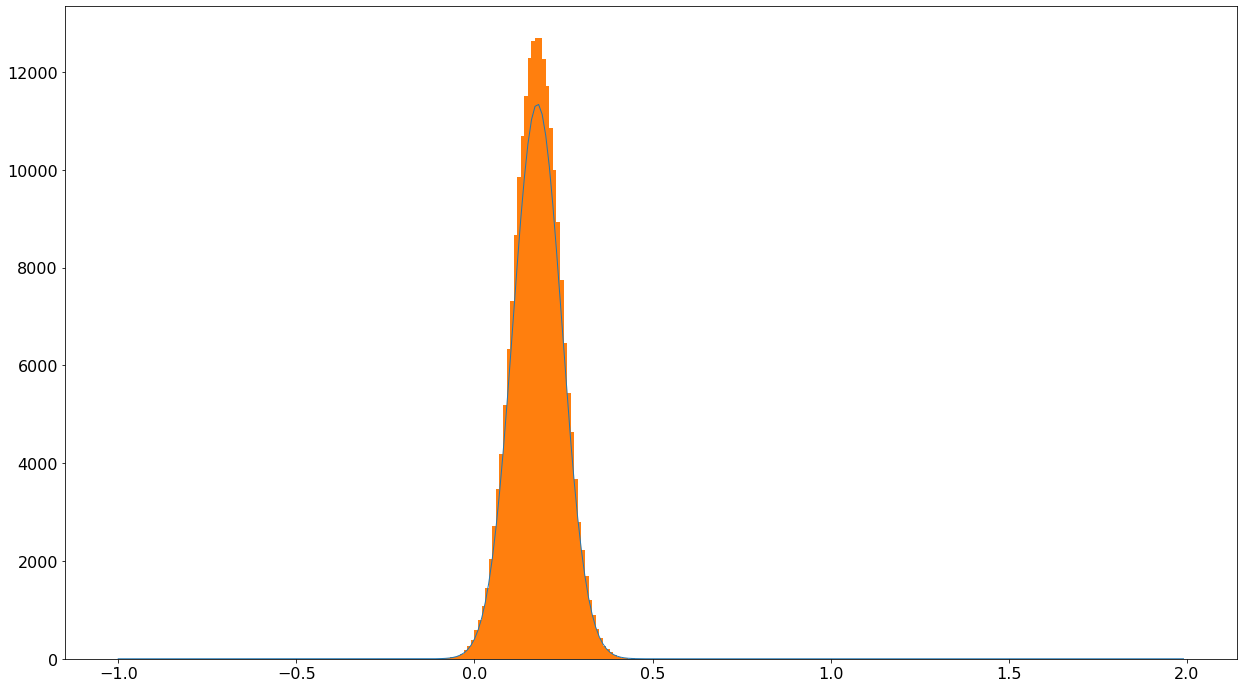

In [66]:
x_interval = np.arange(-1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,gaussian(x_interval, averageRZ, newampRZ, sigmaRZ))
plt.hist(RZsimdata, bins=np.arange(-1,2,0.01))
plt.show()

separate data in each set into the 90% with the least error, and the 10% with the most error

In [67]:
URerr90 = getthreshold(URerr,.9)
URerrlarge = []
URerrsmall = []
UerrsmallHist = []
UerrlargeHist = []
RerrsmallHist = []
RerrlargeHist = []
for i in range(len(URdata)):
    if URerr[i] > URerr90:
        UerrlargeHist.append(Udata[i])
        RerrlargeHist.append(Rdata[i])
        URerrlarge.append(URerr[i])
    elif URerr[i] <= URerr90:
        UerrsmallHist.append(Udata[i])
        RerrsmallHist.append(Rdata[i])
        URerrsmall.append(URerr[i])

In [68]:
GRerr90 = getthreshold(GRerr,.9)
GRerrlarge = []
GRerrsmall = []
GerrsmallHist = []
GerrlargeHist = []
RerrsmallHistGR = []
RerrlargeHistGR = []
for i in range(len(GRdata)):
    if GRerr[i] > GRerr90:
        GerrlargeHist.append(Gdata[i])
        RerrlargeHistGR.append(RdataGR[i])
        GRerrlarge.append(GRerr[i])
    elif GRerr[i] <= GRerr90:
        GerrsmallHist.append(Gdata[i])
        RerrsmallHistGR.append(RdataGR[i])
        GRerrsmall.append(GRerr[i])

In [69]:
RIerr90 = getthreshold(RIerr,.9)
RIerrlarge = []
RIerrsmall = []
RerrsmallHistRI = []
RerrlargeHistRI = []
IerrsmallHist = []
IerrlargeHist = []
for i in range(len(RIdata)):
    if RIerr[i] > RIerr90:
        IerrlargeHist.append(RdataRI[i])
        RerrlargeHistRI.append(Idata[i])
        RIerrlarge.append(RIerr[i])
    elif RIerr[i] <= RIerr90:
        IerrsmallHist.append(RdataRI[i])
        RerrsmallHistRI.append(Idata[i])
        RIerrsmall.append(RIerr[i])

In [70]:
RZerr90 = getthreshold(RZerr,.9)
RZerrlarge = []
RZerrsmall = []
RerrsmallHistRZ = []
RerrlargeHistRZ = []
ZerrsmallHist = []
ZerrlargeHist = []
for i in range(len(RZdata)):
    if RZerr[i] > RZerr90:
        ZerrlargeHist.append(RdataRZ[i])
        RerrlargeHistRZ.append(Zdata[i])
        RZerrlarge.append(RZerr[i])
    elif RZerr[i] <= RZerr90:
        ZerrsmallHist.append(RdataRZ[i])
        RerrsmallHistRZ.append(Zdata[i])
        RZerrsmall.append(RZerr[i])

In [71]:
#plt.figure(figsize=(16,14))
#plt.scatter(UerrlargeHist,URerrlarge,s=0.5)
#plt.scatter(RerrlargeHist,URerrlarge,s=0.5)

#plt.ylim(0, 1)
#plt.xlim(0,8)
#plt.show()

In [72]:
#plt.figure(figsize=(16,14))
#plt.scatter(UerrsmallHist,URerrsmall,s=0.1)
#plt.scatter(RerrsmallHist,URerrsmall,s=0.1)

#plt.ylim(0, .6)
#plt.xlim(0,8)
#plt.show()

plots of light intensity vs the reported uncertainty

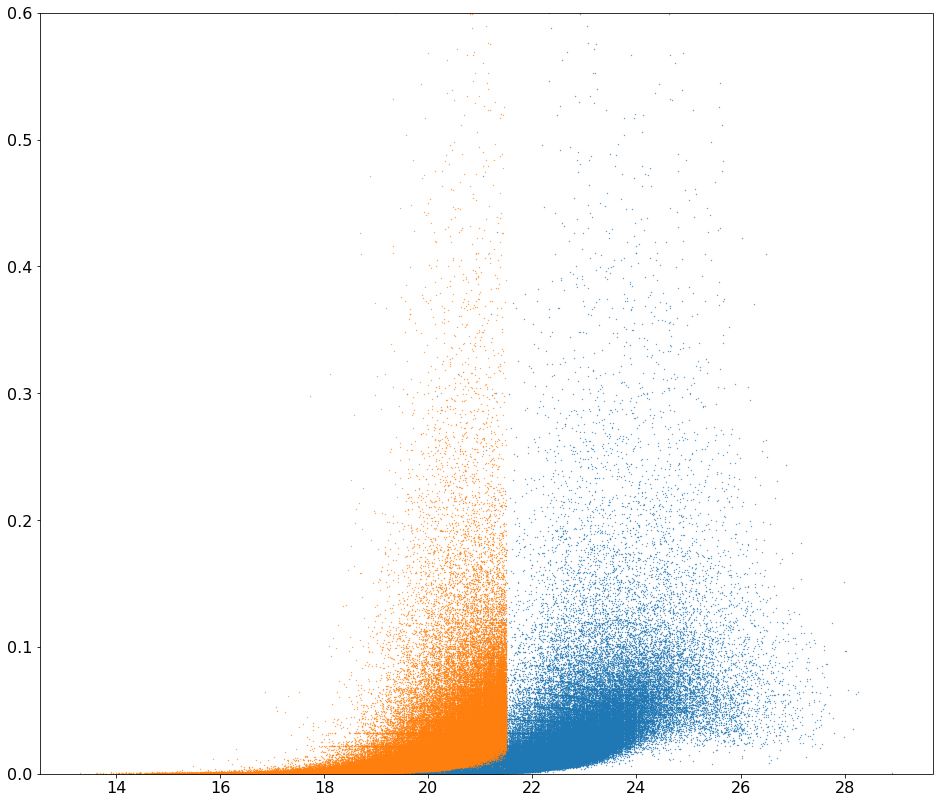

In [73]:
plt.figure(figsize=(16,14))
plt.scatter(Udata,URerr,s=0.1)
plt.scatter(Rdata,URerr,s=0.1)

plt.ylim(0, .6)
#plt.xlim(0,8)
plt.show()

In [74]:
plt.figure(figsize=(16,14))
plt.scatter(Gdata,GRerr,s=0.1)
plt.scatter(RdataGR,GRerr,s=0.1)

plt.ylim(0, .6)
#plt.xlim(0,8)
plt.show()

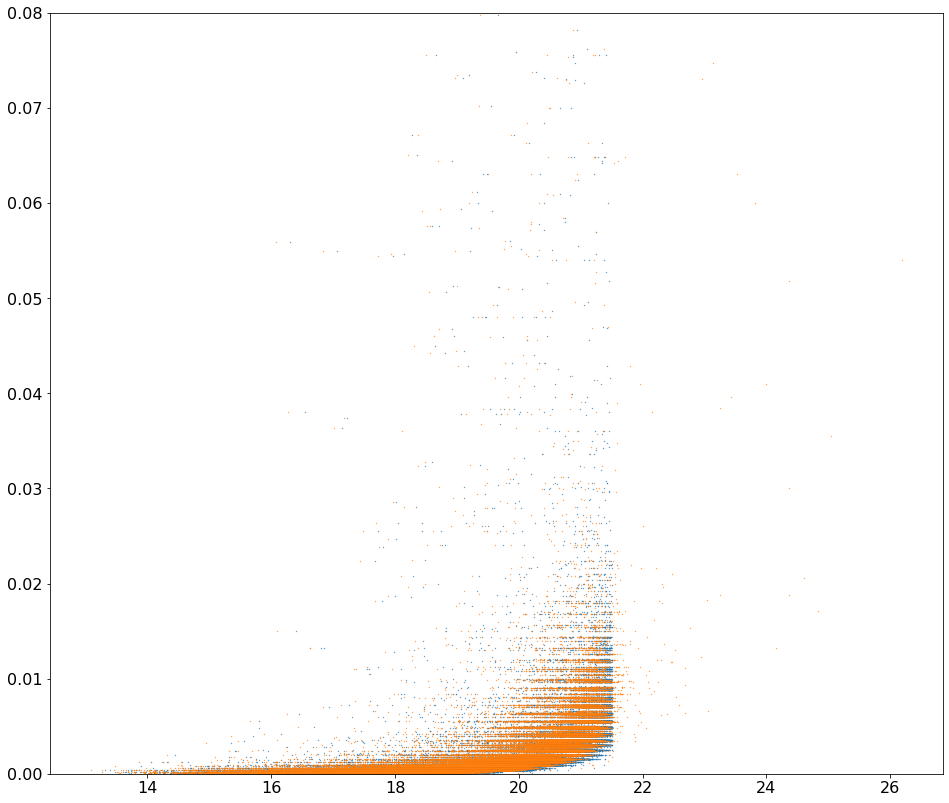

In [75]:
plt.figure(figsize=(16,14))
plt.scatter(RdataRI,RIerr,s=0.1)
plt.scatter(Idata,RIerr,s=0.1)

plt.ylim(0, .08)
#plt.xlim(0,8)
plt.show()

In [76]:
plt.figure(figsize=(16,14))
plt.scatter(RdataRZ,RZerr,s=0.1)
plt.scatter(Zdata,RZerr,s=0.1)

plt.ylim(0, .08)
#plt.xlim(0,8)
plt.show()

In [77]:
#plt.figure(figsize=(21,12))
#for i in range(len(URhists)-100,0,-5):
#    plt.hist(URhists[i], bins=np.arange(0.5,4.5,0.01))
#plt.show()    

The hist_func function takes a list of datapoints and and returns a set of x,y coordinates that fit along the top of the histogram of the data.

In [78]:
def hist_func(histlist):
    bin_heights, bin_borders, _ = plt.hist(histlist, bins=np.arange(min(histlist),max(histlist),0.01))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    bincenters = bin_centers.tolist()
    binheights = bin_heights.tolist()
    return bincenters, binheights

The hist_intersection function finds the amount of overlap between two histograms

In [79]:
def hist_intersection(hlist1,hlist2,minbin,maxbin):
    bh1, bb1, _ = plt.hist(hlist1, bins=np.arange(minbin,maxbin,0.01))
    bc1 = bb1[:-1] + np.diff(bb1) / 2
    bincenters1 = bc1.tolist()
    binheights1 = bh1.tolist()
    bh2, bb2, _ = plt.hist(hlist2, bins=np.arange(minbin,maxbin,0.01))
    bc2 = bb2[:-1] + np.diff(bb2) / 2
    bincenters2 = bc2.tolist()
    binheights2 = bh2.tolist()
    sm = 0
    tot1 = 0
    tot2 = 0
    
    for i in range(len(binheights1)):
        sm += min(binheights1[i],binheights2[i])
        tot1 += binheights1[i]
        tot2 += binheights2[i]
        
    ratio = 2*sm/(tot1+tot2)
    return ratio

The optimize_intersection function takes a real dataset and a simulated dataset, and finds the magnitude that the error in the simulated data must be increased to maximize the overlap between the functions.

In [80]:
def optimize_intersection(hreal,hsim,herr,minbin,maxbin):
    hsim2 = [] #new histogram with error propatgation
    intersectvals =[] #amount of overlap between gaussians
    intersectN = [] #corresponding n values for each overlap
    for n in range(0,101,10):
        for i in range(len(hsim)):
            hsim2.append(hsim[i] + n*herr[i])
        intersectval = hist_intersection(hreal,hsim2,minbin,maxbin)
        intersectvals.append(intersectval)
        intersectN.append(n)
        hsim2 = []
    max10 = max(intersectvals)
    indexn = intersectvals.index(max10)
    maxN10 = intersectN[indexn]
    intersectvals = []
    intersectN = []
    for n in range(maxN10-9,maxN10+10):
        for i in range(len(hsim)):
            hsim2.append(hsim[i] + n*herr[i])
        intersectval = hist_intersection(hreal,hsim2,minbin,maxbin)
        intersectvals.append(intersectval)
        intersectN.append(n)
        hsim2 = []
    max1 = max(intersectvals) # the amount of intersection between the two gaussians, optimized
    indexn = intersectvals.index(max1)
    maxN = intersectN[indexn] #the n value that error range must be multiplied by to obtain optimization
    return maxN, max1

Use the reported uncertainty to generate error values to add to the simulated data

URerrRandom is a list of error values that was generated using a uniform probability distribution for each error being somewhere between +/- the reported uncertainty value. 

URerrRandom2 is a list of error values that was generated using a gaussian probability distribution. The standard deviation of each probability distribution is the reported uncertainty value. 

In [81]:
URerrRandom = URerr[:]
r.shuffle(URerrRandom)
URsimdata2 = []
for i in range(len(URerrRandom)):
    d = 2*URerrRandom[i]*r.random() - URerrRandom[i]
    URerrRandom[i] = d
    
for i in range(len(URsimdata)):
    URsimdata2.append(URsimdata[i] + 30*URerrRandom[i])

In [82]:
URerrRandom2 = URerr[:]
r.shuffle(URerrRandom2)
for i in range(len(URerrRandom2)):
    d = r.gauss(0,URerrRandom2[i])
    URerrRandom2[i] = d

A plot comparing URdata, simulated data without error propagation, and simulated data with error propagation that is 30 times greater than what would be expected from the reported uncertainty values. 

In [83]:
x_interval = np.arange(0.5,4.5,0.01)
#x_interval = np.arange(1.5,3,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))
plt.hist(URsimdata2, bins=np.arange(0.5,4.5,0.01),alpha=0.5, color='blue')
plt.hist(URsimdata, bins=np.arange(0.5,4.5,0.01),alpha=0.5, color='red')
plt.hist(URdata, bins=np.arange(0.5,4.5,0.01),alpha=0.5, color='yellow')
plt.show()

In [84]:
#plotting the 10% of URdata with the lowest uncertainty
plt.figure(figsize=(21,12))
plt.hist(URhists[10], bins=np.arange(0.5,4.5,0.01))
plt.show()

In [85]:
print(len(URhists[10])/len(URhists[-1]))

0.09905505640502268


Generate a set of x,y coordinates that fit on top of the URdata histogram

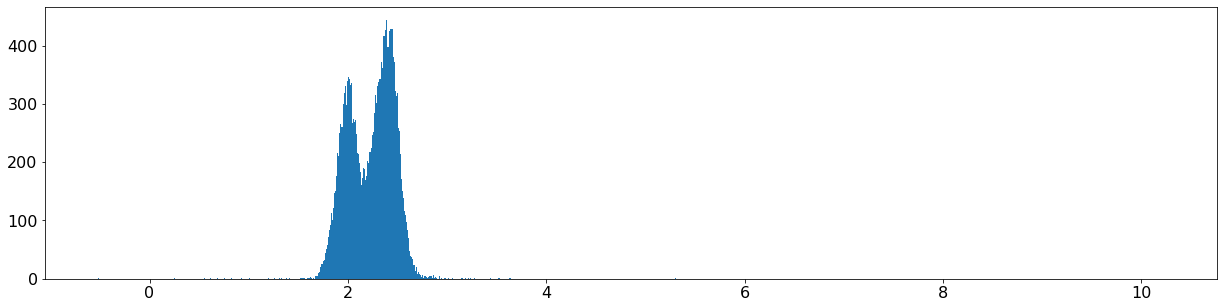

In [86]:
URx, URy = hist_func(URhists[10])


In [87]:
plt.figure(figsize=(21,12))
plt.plot(URx,URy)
plt.xlim(0.5,4.5)
plt.show()

Generate simulated data with the same distribution shape as the 10% most precise URdata

URsimdata3 has no error propagation

In [88]:
URsimdata3 = sim_data2(len(URdata),URymax,URx,URy)

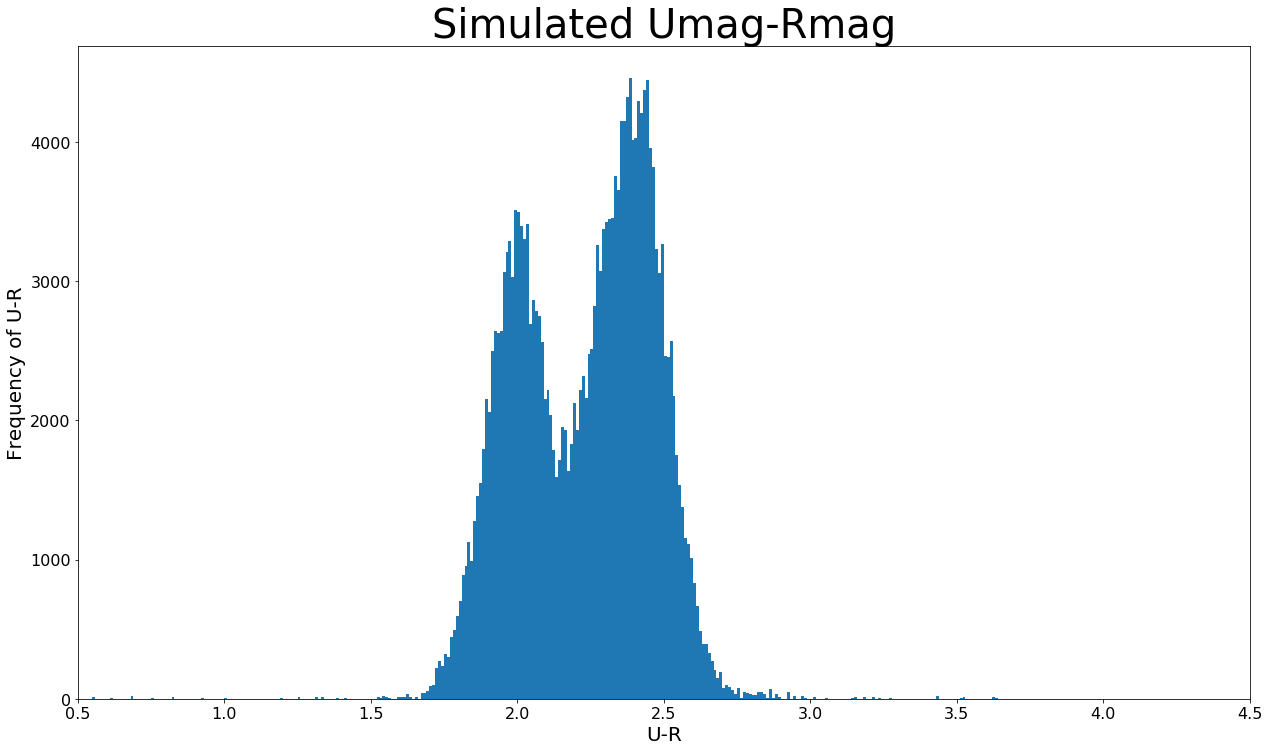

In [89]:
plt.figure(figsize=(21,12))
#plt.plot(URx,URy)
plt.hist(URsimdata3, bins=np.arange(0.5,4.5,0.01))
plt.title('Simulated Umag-Rmag')
plt.ylabel('Frequency of U-R')
plt.xlabel('U-R')
plt.xlim(0.5,4.5)
plt.savefig("simU-R.png", bbox_inches="tight")
plt.show()

In [90]:
URsimdata4 = []
for i in range(len(URsimdata3)):
    URsimdata4.append(URsimdata3[i] + 35*URerrRandom[i])

Determine the amount which the error must be expanded so that the simulated data and real data histograms overlap as much as possible.

37


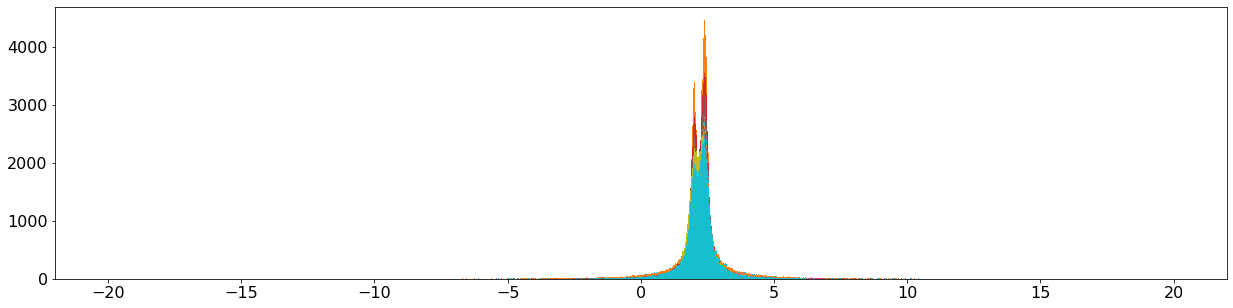

In [91]:
URbesterr, URsimOverlap = optimize_intersection(URdata,URsimdata3,URerrRandom,-20,20)
print(URbesterr)

URsimdata5 has error propagation that was generated using URerrRandom and optimize_intersection

In [92]:
URsimdata5 = []
for i in range(len(URsimdata3)):
    URsimdata5.append(URsimdata3[i] + URbesterr*URerrRandom[i])

URbesterr2 is the error generated by URerrRandom2 that gives the maximum overlap to the simulated data and the real data.

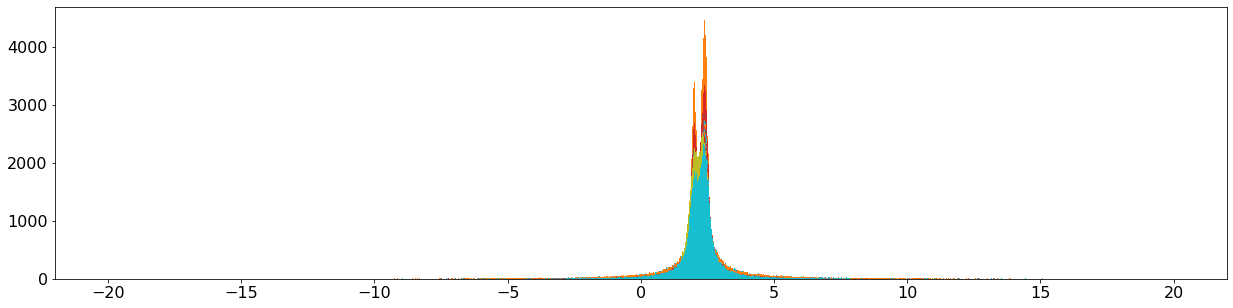

In [93]:
URbesterr2, URsimOverlap2 = optimize_intersection(URdata,URsimdata3,URerrRandom2,-20,20)

In [94]:
print(URbesterr2)

25


URsimdata6 has URerrRandom2 error propagation, without overlap optimization. 

In [95]:
URsimdata6 = []
for i in range(len(URsimdata3)):
    URsimdata6.append(URsimdata3[i] + URerrRandom2[i])

URsimdata7 has URerrRandom2 error propagation, with overlap optimization

In [96]:
URsimdata7 = []
for i in range(len(URsimdata3)):
    URsimdata7.append(URsimdata3[i] + URbesterr2*URerrRandom2[i])

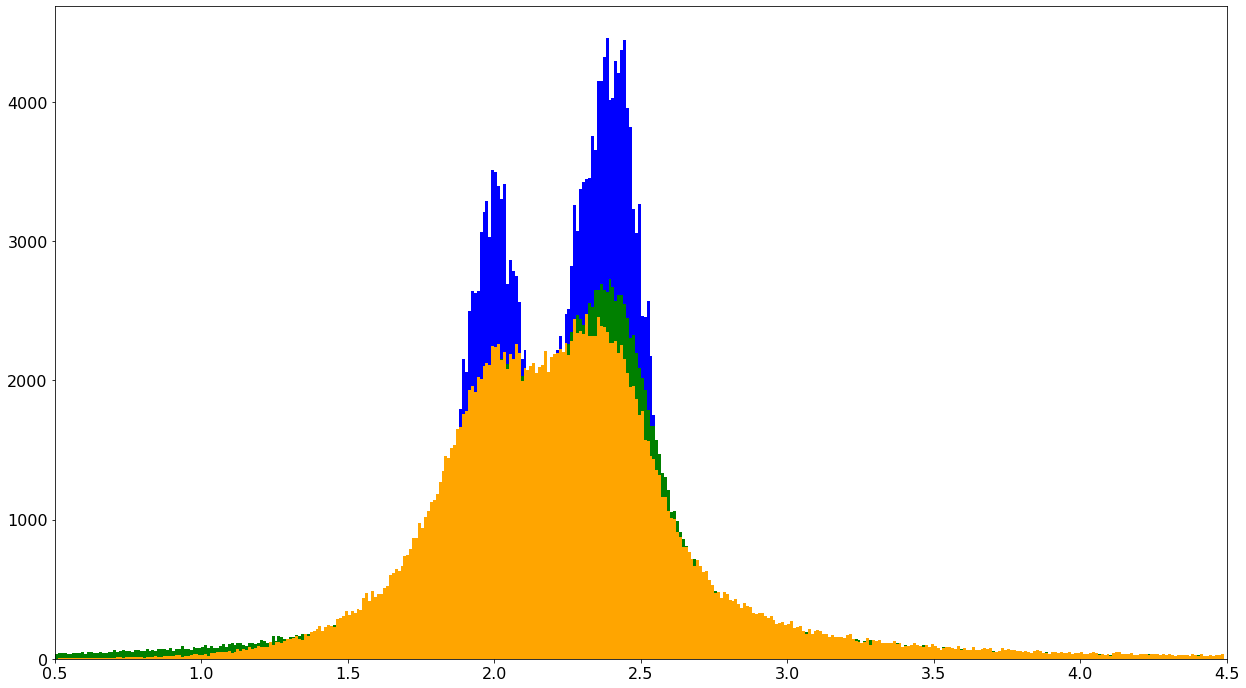

In [97]:
plt.figure(figsize=(21,12))
#plt.plot(URx,URy)
plt.hist(URsimdata3, bins=np.arange(0.5,4.5,0.01), color="blue") #hist shaped like low-error data distribion

plt.hist(URsimdata4, bins=np.arange(0.5,4.5,0.01), color="green") #hist shaped like low-error data + error added
plt.hist(URdata, bins=np.arange(0.5,4.5,0.01), color="orange") #hist of real data
plt.xlim(0.5,4.5)
plt.show()

A plot of the real UR data against URsimdata5

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


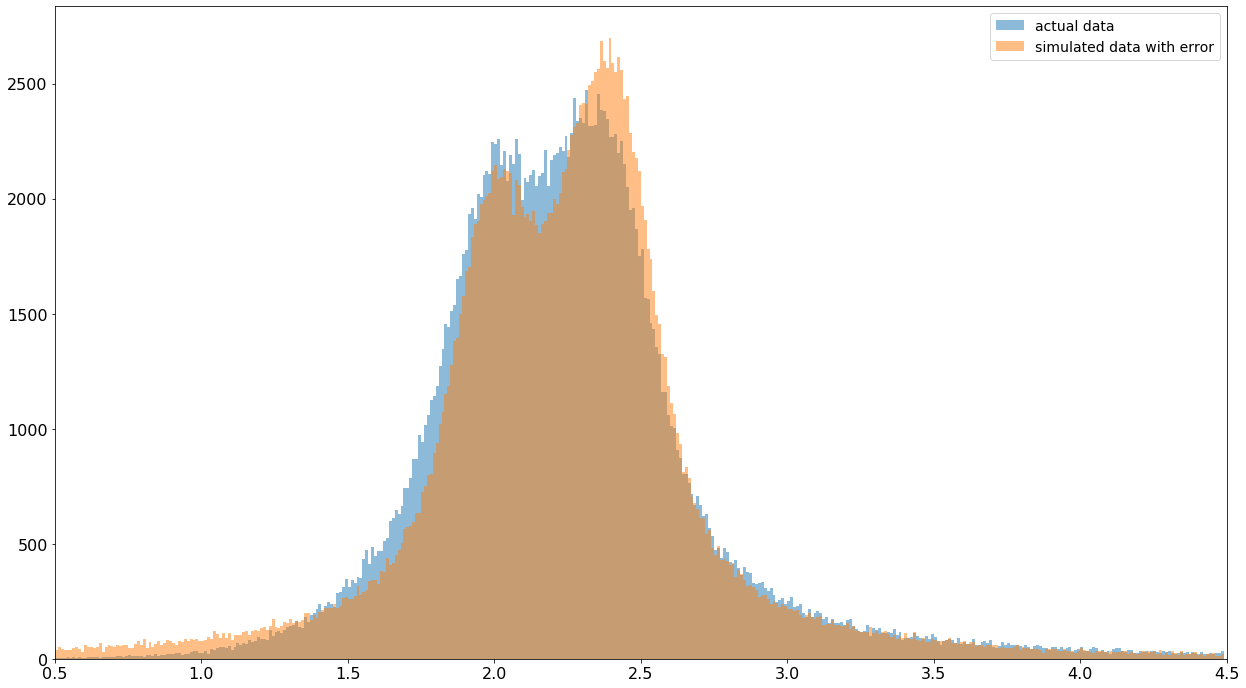

In [98]:
plt.figure(figsize=(21,12))
#plt.plot(URx,URy)
plt.hist(URdata, bins=np.arange(0.5,4.5,0.01), label='actual data', alpha=0.5) #hist of real data
plt.hist(URsimdata5, bins=np.arange(0.5,4.5,0.01), label='simulated data with error', alpha=0.5) #hist shaped like low-error data + error added
plt.legend()
plt.xlim(0.5,4.5)
plt.show()

In [99]:
print("The overlap between the plots is ",URsimOverlap)

The overlap between the plots is  0.9276342165688669


A plot of simulated data with and without error propagation shows how little the initial error propagation changes anything. 

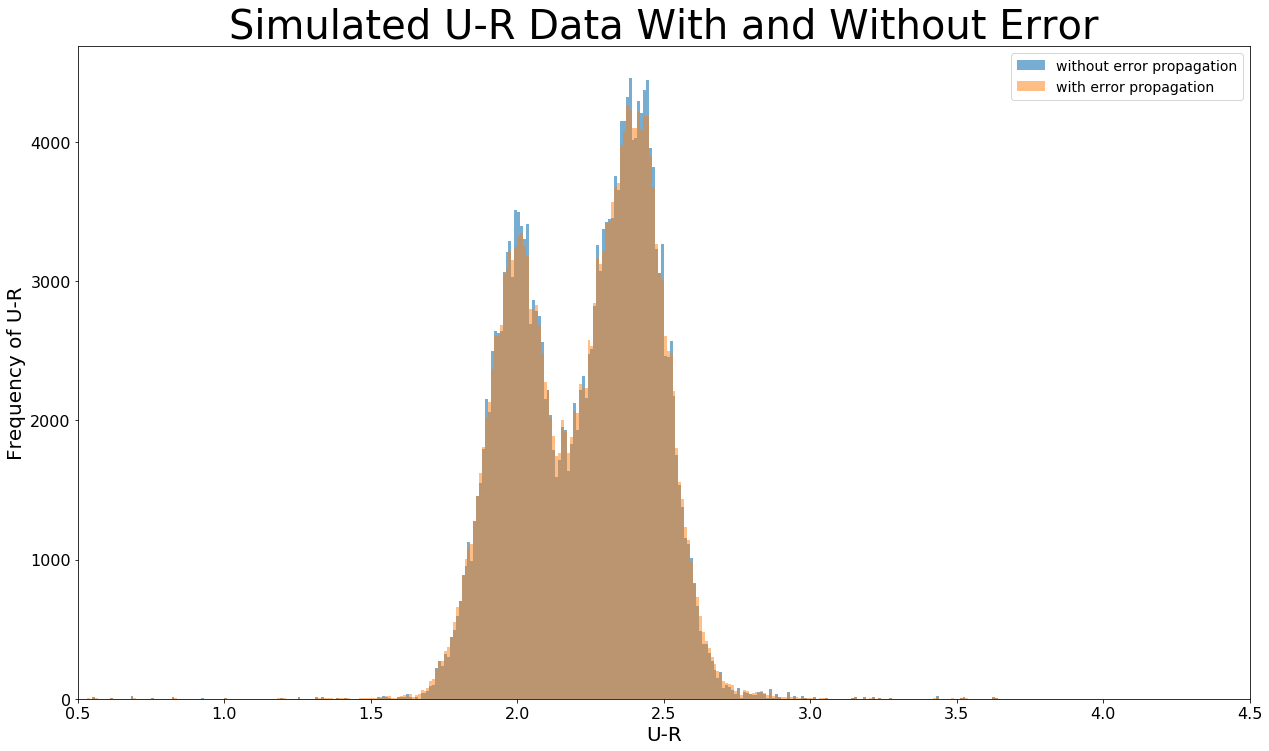

In [100]:
plt.figure(figsize=(21,12))
#plt.plot(URx,URy)
plt.hist(URsimdata3, bins=np.arange(0.5,4.5,0.01), label='without error propagation', alpha=0.6) #hist of sim data without error added
plt.hist(URsimdata6, bins=np.arange(0.5,4.5,0.01), label='with error propagation', alpha=0.5) #hist shaped like low-error data + error added
plt.legend()
plt.title('Simulated U-R Data With and Without Error')
plt.ylabel('Frequency of U-R')
plt.xlabel('U-R')
plt.xlim(0.5,4.5)
plt.savefig("sim_comparisonU-R.png", bbox_inches="tight")
plt.show()

A plot of real UR data against URsimdata7

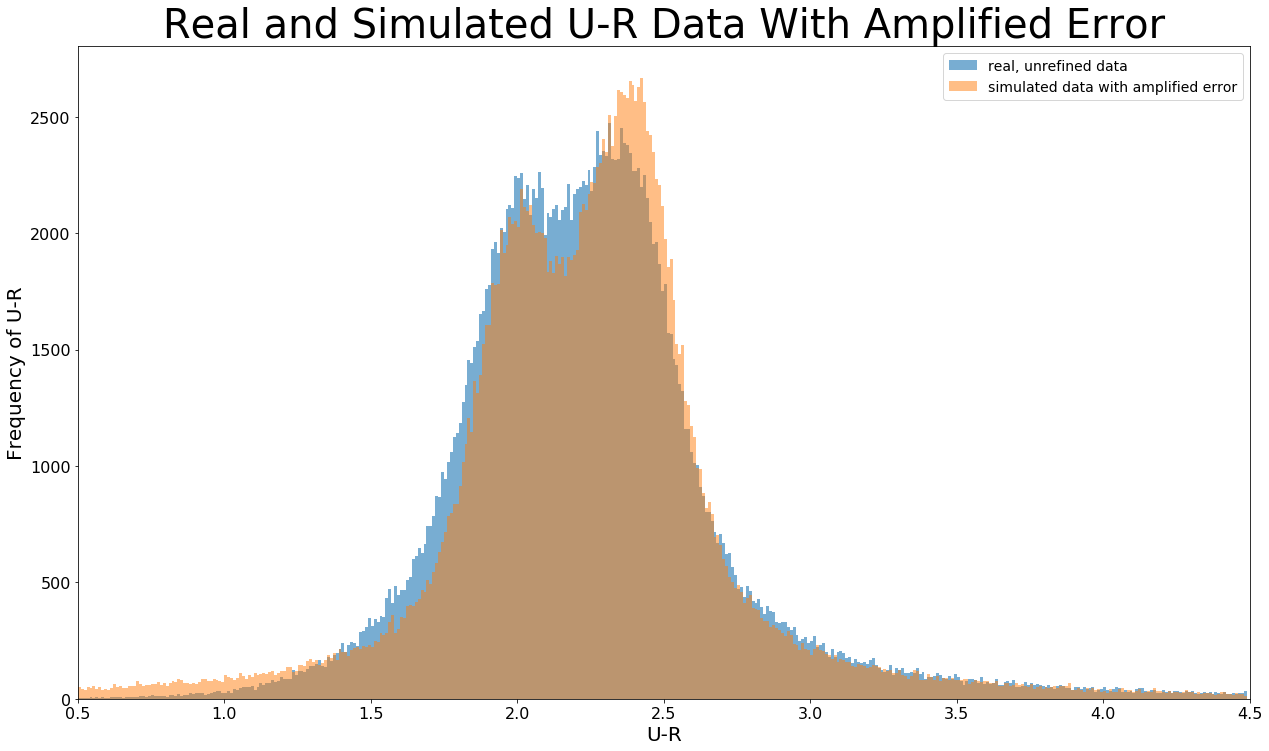

In [101]:
plt.figure(figsize=(21,12))
#plt.plot(URx,URy)
plt.hist(URdata, bins=np.arange(0.5,4.5,0.01), label='real, unrefined data', alpha=0.6) #hist of sim data without error added
plt.hist(URsimdata7, bins=np.arange(0.5,4.5,0.01), label='simulated data with amplified error', alpha=0.5) #hist shaped like low-error data + error added
plt.legend()
plt.title('Real and Simulated U-R Data With Amplified Error')
plt.ylabel('Frequency of U-R')
plt.xlabel('U-R')
plt.xlim(0.5,4.5)
plt.savefig("sim_realU-R.png", bbox_inches="tight")
plt.show()

In [102]:
print("The overlap between the plots is ",URsimOverlap2)

The overlap between the plots is  0.9224688410534925


Use the reported uncertainty to generate error values to add to the simulated data

GRerrRandom is a list of error values that was generated using a uniform probability distribution for each error being somewhere between +/- the reported uncertainty value. 

GRerrRandom2 is a list of error values that was generated using a gaussian probability distribution. The standard deviation of each probability distribution is the reported uncertainty value. 

In [103]:
GRerrRandom = GRerr[:]
r.shuffle(GRerrRandom)
GRsimdata2 = []
for i in range(len(GRerrRandom)):
    d = 2*GRerrRandom[i]*r.random() - GRerrRandom[i]
    GRerrRandom[i] = d
    
for i in range(len(GRsimdata)):
    GRsimdata2.append(GRsimdata[i] + 40*GRerrRandom[i])

In [104]:
GRerrRandom2 = GRerr[:]
r.shuffle(GRerrRandom2)
for i in range(len(GRerrRandom2)):
    d = r.gauss(0,GRerrRandom2[i])
    GRerrRandom2[i] = d

A plot comparing GRdata, simulated data without error propagation, and simulated data with error propagation that is 40 times greater than what would be expected from the reported uncertainty values.

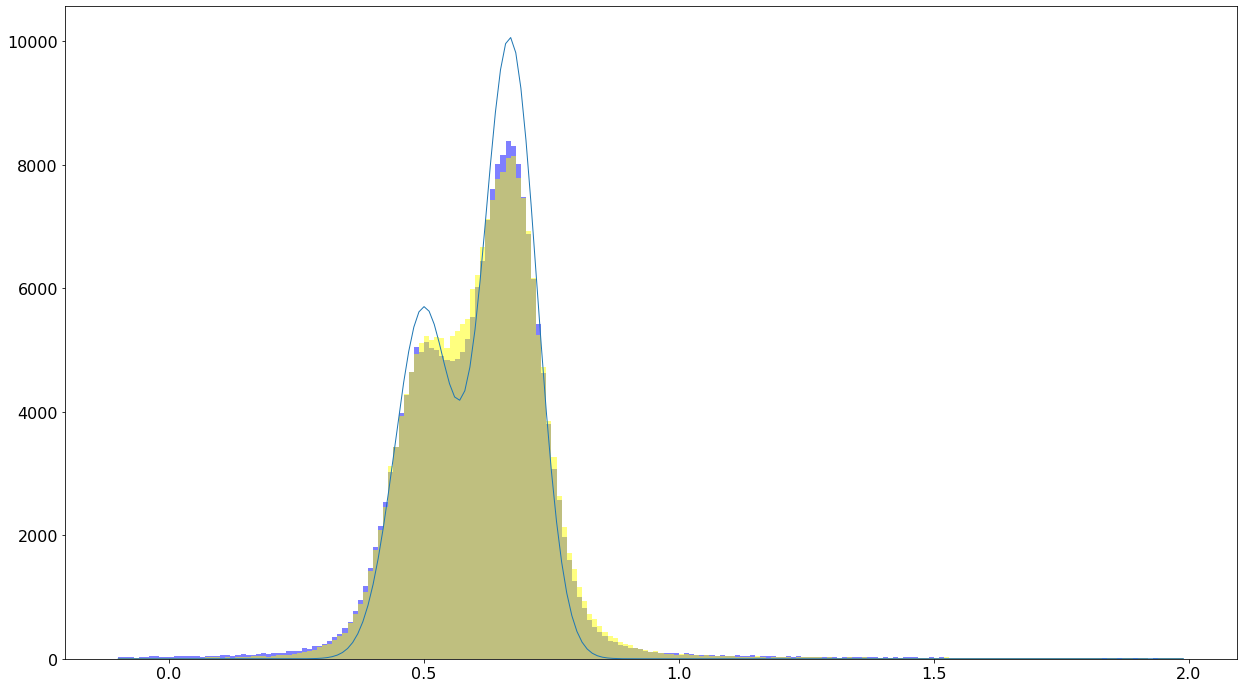

In [105]:
x_interval =np.arange(-0.1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2))
plt.hist(GRsimdata2, bins=np.arange(-0.1,2,0.01),alpha=0.5, color='blue') #simulated data with error added
#plt.hist(GRsimdata, bins=np.arange(-0.1,2,0.01),alpha=0.5, color='red') #simulated data
plt.hist(GRdata, bins=np.arange(-0.1,2,0.01),alpha=0.5, color='yellow') #real data
plt.show()

In [106]:
len(GRhists[3])/len(GRhists[-1])

0.08979584393321845

Generate a set of x,y coordinates that fit on top of the GRdata histogram

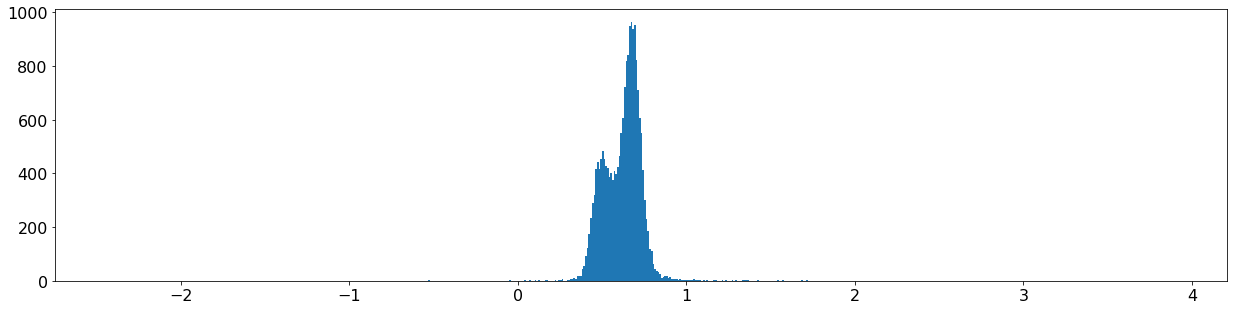

In [107]:
GRx, GRy = hist_func(GRhists[3])

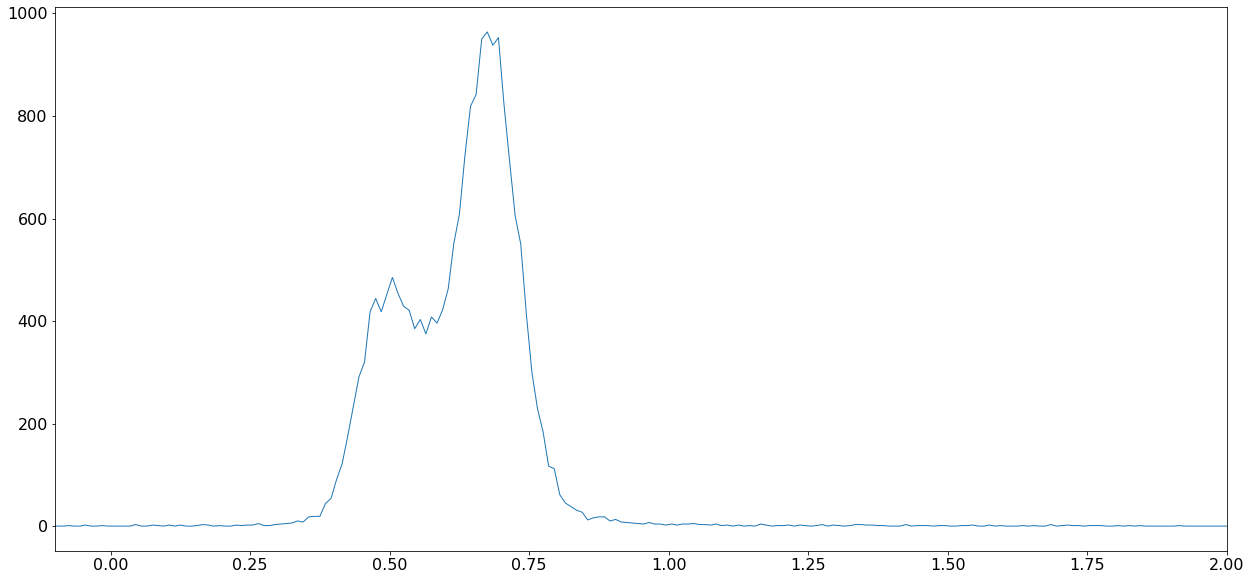

In [108]:
plt.figure(figsize=(21,10))
plt.plot(GRx,GRy)
plt.xlim(-0.1,2)
plt.show()

Generate simulated data with the same distribution shape as the 10% most precise GRdata

GRsimdata3 has no error propagation

In [109]:
GRsimdata3 = sim_data2(len(GRdata),GRymax,GRx,GRy)

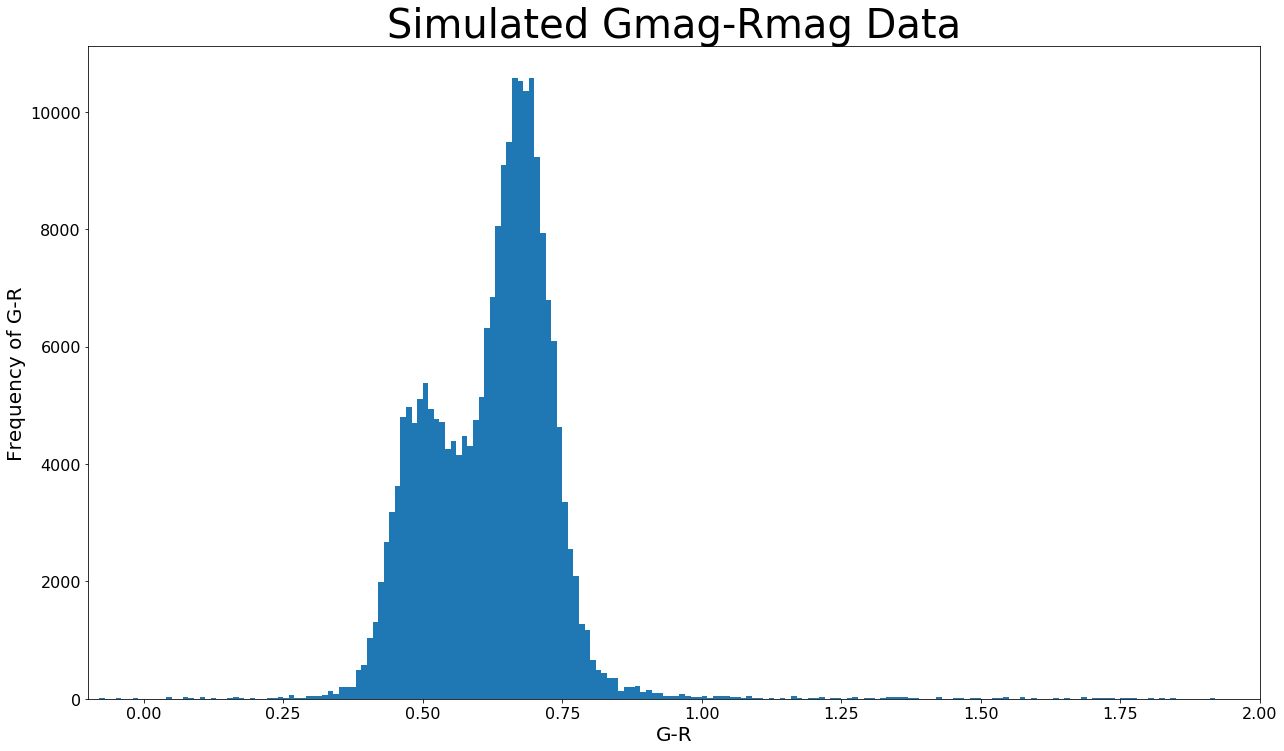

In [110]:
plt.figure(figsize=(21,12))
#plt.plot(GRx,GRy)
plt.hist(GRsimdata3, bins=np.arange(-0.1,2,0.01))
plt.xlim(-0.1,2)
plt.title('Simulated Gmag-Rmag Data')
plt.ylabel('Frequency of G-R')
plt.xlabel('G-R')
plt.savefig("simG-R", bbox_inches="tight")
plt.show()

In [111]:
GRsimdata4 = []
for i in range(len(GRsimdata3)):
    GRsimdata4.append(GRsimdata3[i] + 35*GRerrRandom[i])

Determine the amount which the error must be expanded so that the simulated data and real data histograms overlap as much as possible.

31 0.8959889217622233


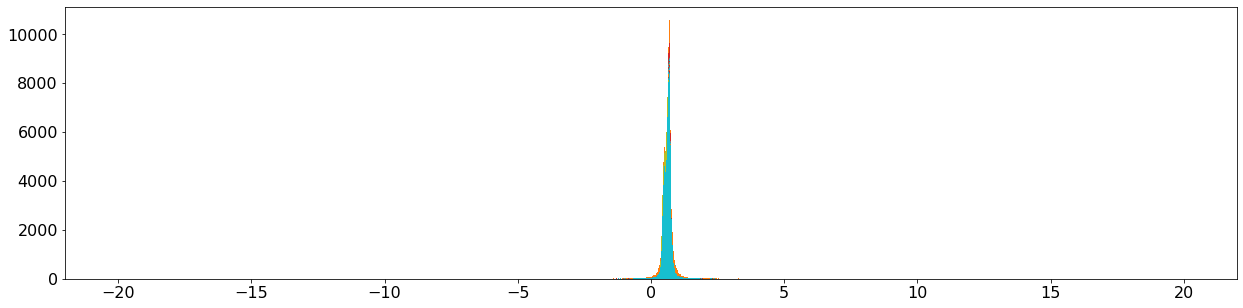

In [112]:
GRbesterr, GRsimOverlap = optimize_intersection(GRdata,GRsimdata3,GRerrRandom,-20,20)
print(GRbesterr, GRsimOverlap)

20 0.895972267774498


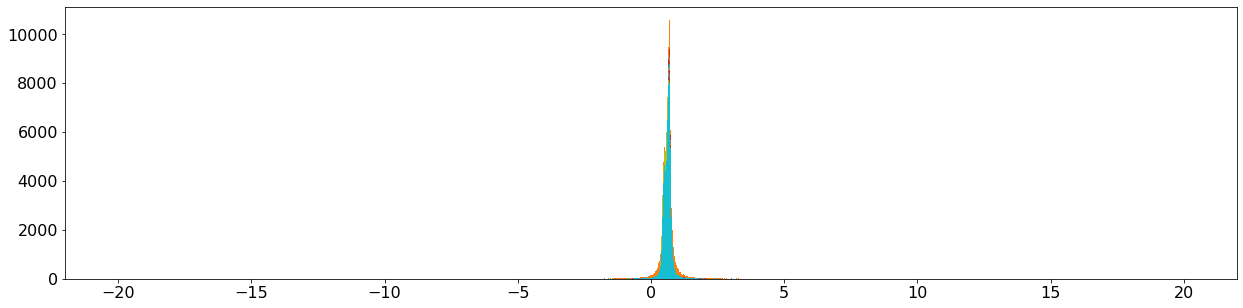

In [113]:
GRbesterr2, GRsimOverlap2 = optimize_intersection(GRdata,GRsimdata3,GRerrRandom2,-20,20)
print(GRbesterr2, GRsimOverlap2)

GRsimdata5 has error propagation that was generated using GRerrRandom and optimize_intersection

In [114]:
GRsimdata5 = []
for i in range(len(GRsimdata3)):
    GRsimdata5.append(GRsimdata3[i] + GRbesterr*GRerrRandom[i])

GRsimdata6 has GRerrRandom2 error propagation, without overlap optimization.

In [115]:
GRsimdata6 = []
for i in range(len(GRsimdata3)):
    GRsimdata6.append(GRsimdata3[i] + GRerrRandom2[i])

GRsimdata7 has GRerrRandom2 error propagation, with overlap optimization.

In [116]:
GRsimdata7 =  []
for i in range(len(GRsimdata3)):
    GRsimdata7.append(GRsimdata3[i] + GRbesterr2*GRerrRandom2[i])

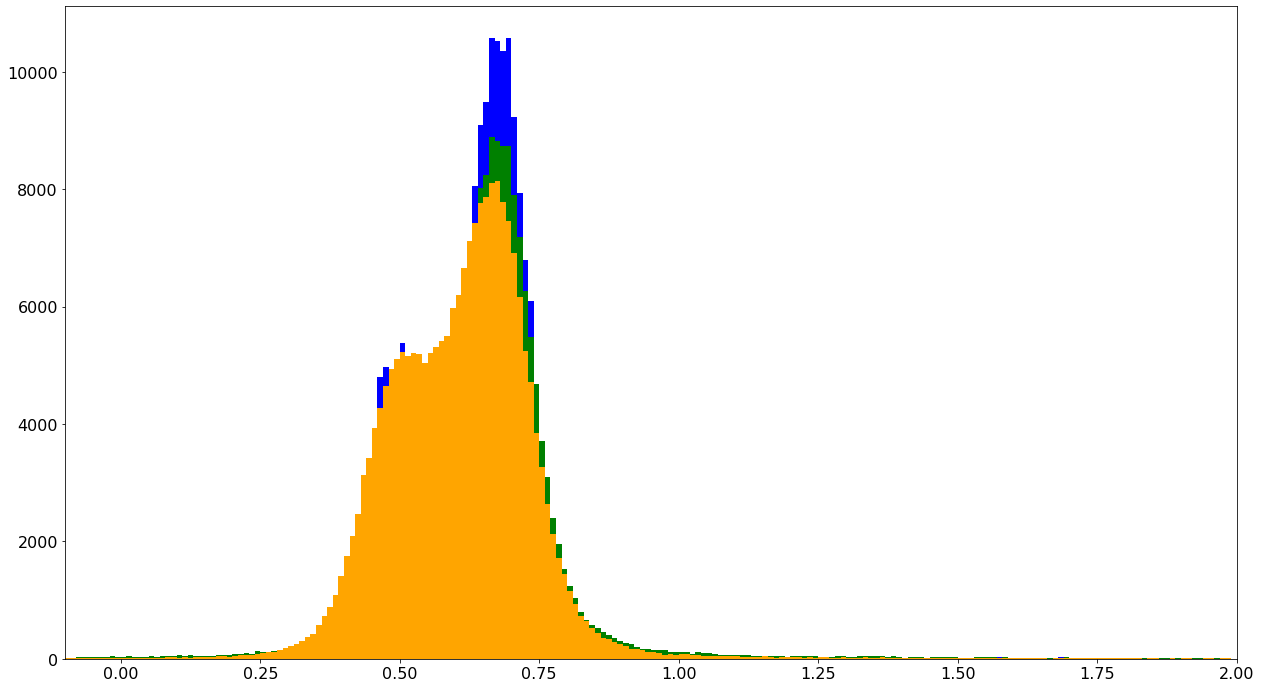

In [117]:
plt.figure(figsize=(21,12))
#plt.plot(GRx,GRy)
plt.hist(GRsimdata3, bins=np.arange(-0.1,2,0.01), color="blue") #hist shaped like low-error data distribion

plt.hist(GRsimdata5, bins=np.arange(-0.1,2,0.01), color="green") #hist shaped like low-error data + error added
plt.hist(GRdata, bins=np.arange(-0.1,2,0.01), color="orange") #hist of real data
plt.xlim(-0.1,2)
plt.show()

A plot of the real GR data against GRsimdata5

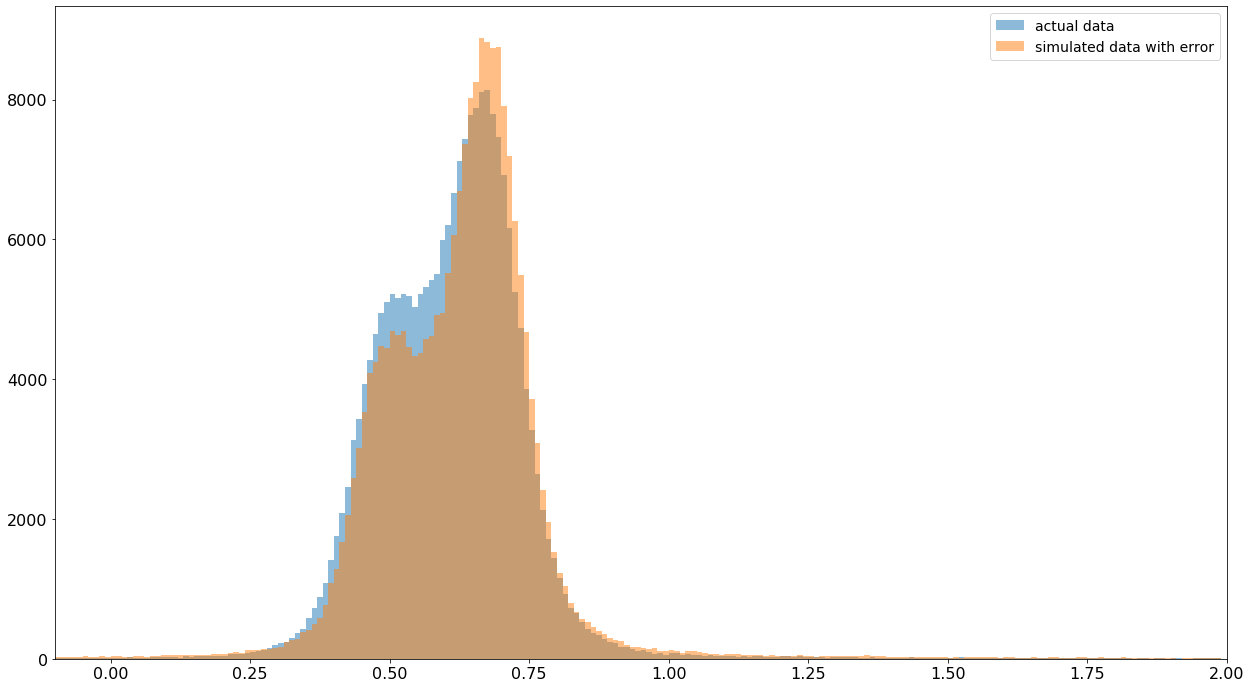

In [118]:
plt.figure(figsize=(21,12))
#plt.plot(GRx,GRy)
plt.hist(GRdata, bins=np.arange(-0.1,2,0.01), label='actual data', alpha=0.5) #hist of real data
plt.hist(GRsimdata5, bins=np.arange(-0.1,2,0.01), label='simulated data with error', alpha=0.5) #hist shaped like low-error data + error added
plt.legend()
plt.xlim(-0.1,2)
plt.show()

In [119]:
print("The overlap between the plots is ",GRsimOverlap)

The overlap between the plots is  0.8959889217622233


A plot of simulated data with and without error propagation shows how little the initial error propagation changes anything.

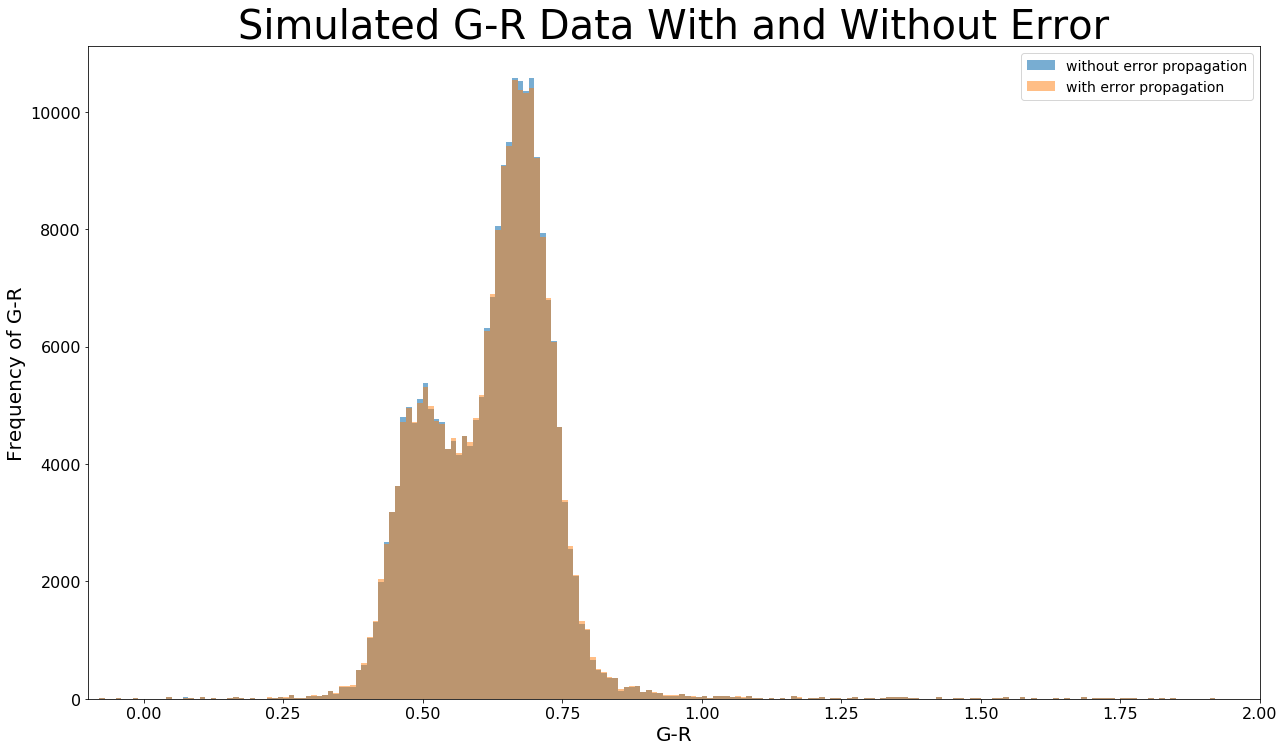

In [120]:
plt.figure(figsize=(21,12))
#plt.plot(GRx,GRy)
plt.title('Simulated G-R Data With and Without Error')
plt.ylabel('Frequency of G-R')
plt.xlabel('G-R')
plt.hist(GRsimdata3, bins=np.arange(-0.1,2,0.01), label='without error propagation', alpha=0.6) #hist of sim data w/o error
plt.hist(GRsimdata6, bins=np.arange(-0.1,2,0.01), label='with error propagation', alpha=0.5) #hist shaped like low-error data + error added
plt.legend()
plt.xlim(-0.1,2)
plt.savefig("sim_comparisonG-R.png", bbox_inches="tight")
plt.show()

A plot of real GR data against GRsimdata7

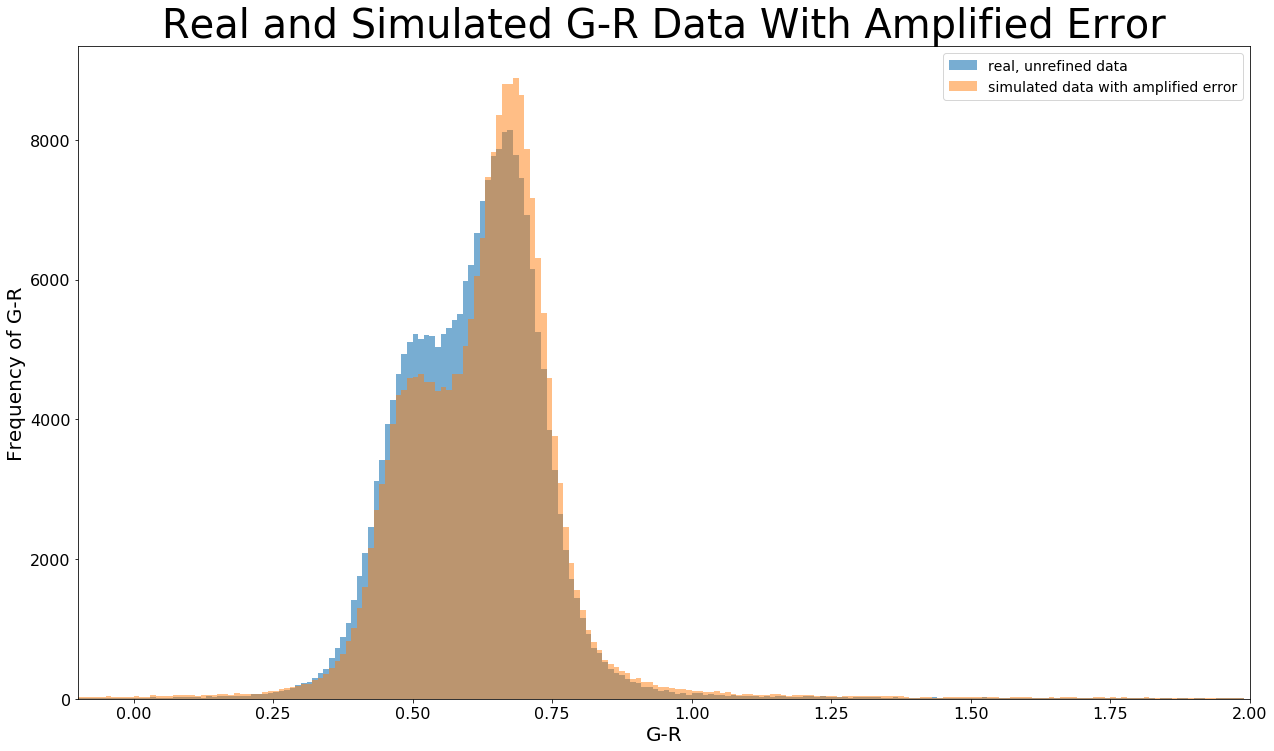

In [121]:
plt.figure(figsize=(21,12))
plt.hist(GRdata, bins=np.arange(-0.1,2,0.01), label='real, unrefined data', alpha=0.6) #hist of real data
plt.hist(GRsimdata7, bins=np.arange(-0.1,2,0.01), label='simulated data with amplified error', alpha=0.5) #sim hist with amplified error
plt.legend()
plt.title('Real and Simulated G-R Data With Amplified Error')
plt.ylabel('Frequency of G-R')
plt.xlabel('G-R')
plt.xlim(-0.1,2)
plt.savefig("sim_realG-R.png", bbox_inches="tight")
plt.show()

In [122]:
print("The overlap between the plots is ",GRsimOverlap2)

The overlap between the plots is  0.895972267774498


Use the reported uncertainty to generate error values to add to the simulated data

RIerrRandom is a list of error values that was generated using a uniform probability distribution for each error being somewhere between +/- the reported uncertainty value.

RIerrRandom2 is a list of error values that was generated using a gaussian probability distribution. The standard deviation of each probability distribution is the reported uncertainty value.

In [123]:
RIerrRandom = RIerr[:]
r.shuffle(RIerrRandom)
RIsimdata2 = []
for i in range(len(RIerrRandom)):
    d = 2*RIerrRandom[i]*r.random() - RIerrRandom[i]
    RIerrRandom[i] = d
    
for i in range(len(RIsimdata)):
    RIsimdata2.append(RIsimdata[i] + 45*RIerrRandom[i])

In [124]:
RIerrRandom2 = RIerr[:]
r.shuffle(RIerrRandom2)
for i in range(len(RIerrRandom2)):
    d = r.gauss(0,RIerrRandom2[i])
    RIerrRandom2[i] = d

A plot comparing RIdata, simulated data without error propagation, and simulated data with error propagation that is 45 times greater than what would be expected from the reported uncertainty values.

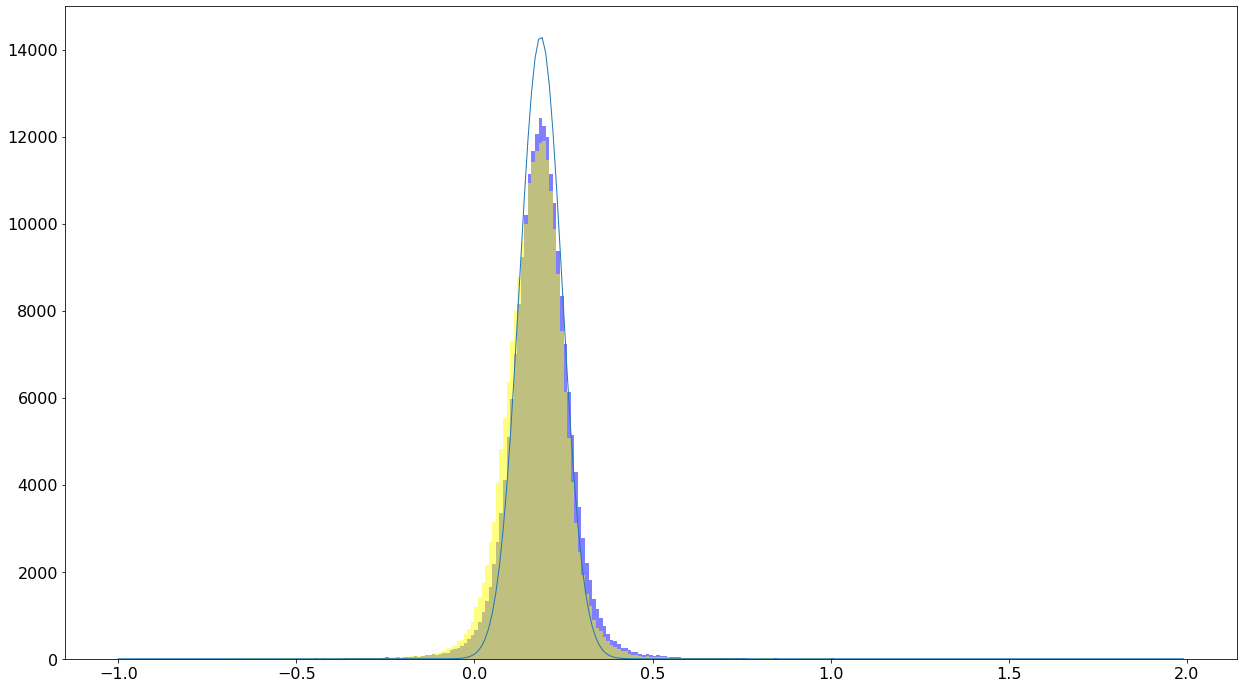

In [125]:
x_interval =np.arange(-1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,gaussian(x_interval, averageRI, newampRI, sigmaRI))
plt.hist(RIsimdata2, bins=np.arange(-1,2,0.01),alpha=0.5, color='blue') #simulated data with error added
#plt.hist(RIsimdata, bins=np.arange(-1,2,0.01),alpha=0.5, color='red') #simulated data
plt.hist(RIdata, bins=np.arange(-1,2,0.01),alpha=0.5, color='yellow') #real data
plt.show()

Generate a set of x,y coordinates that fit on top of the RIdata histogram

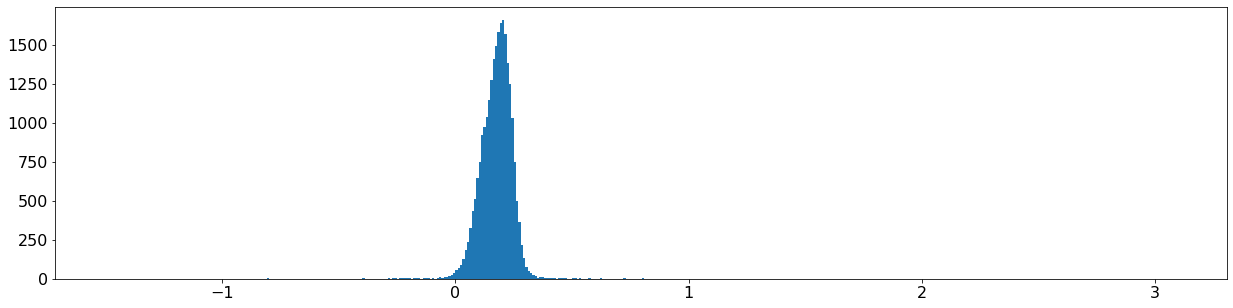

In [126]:
RIx, RIy = hist_func(RIhists[2])

In [127]:
print(len(RIhists[2])/len(RIhists[-1]))

0.11050588615400017


Generate simulated data with the same distribution shape as the 11% most precise RIdata

RIsimdata3 has no error propagation

In [128]:
RIsimdata3 = sim_data2(len(RIdata),RIymax,RIx,RIy)

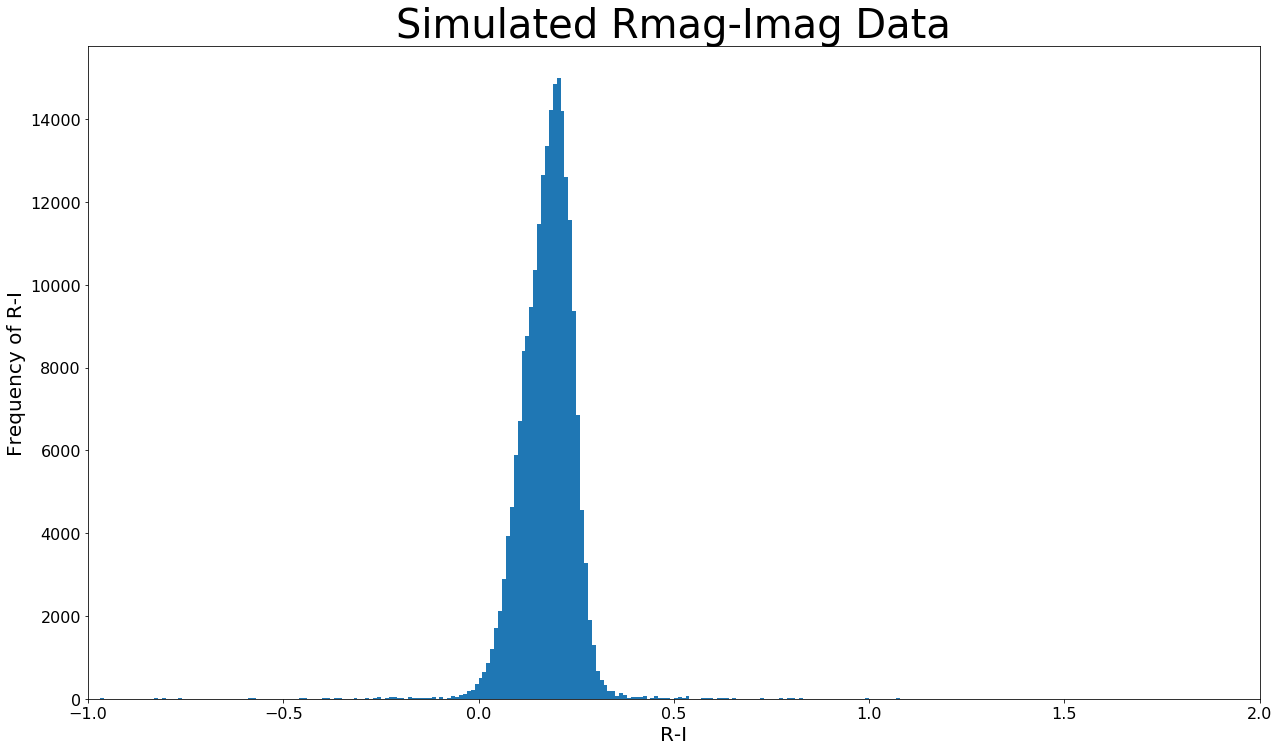

In [129]:
plt.figure(figsize=(21,12))
#plt.plot(RIx,RIy)
plt.hist(RIsimdata3, bins=np.arange(-1,2,0.01))
plt.xlim(-1,2)
plt.title('Simulated Rmag-Imag Data')
plt.ylabel('Frequency of R-I')
plt.xlabel('R-I')
plt.savefig("simR-I.png", bbox_inches="tight")
plt.show()

In [130]:
RIsimdata4 = []
for i in range(len(RIsimdata3)):
    RIsimdata4.append(RIsimdata3[i] + 45*RIerrRandom[i])

Determine the amount which the error must be expanded so that the simulated data and real data histograms overlap as much as possible.

46 0.9639391975624453


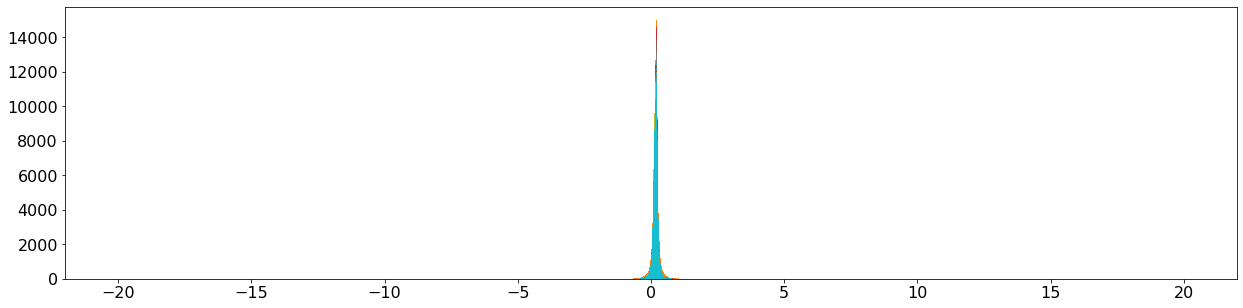

In [131]:
RIbesterr, RIsimOverlap = optimize_intersection(RIdata,RIsimdata3,RIerrRandom,-20,20)
print(RIbesterr, RIsimOverlap)

30 0.9610947142473839


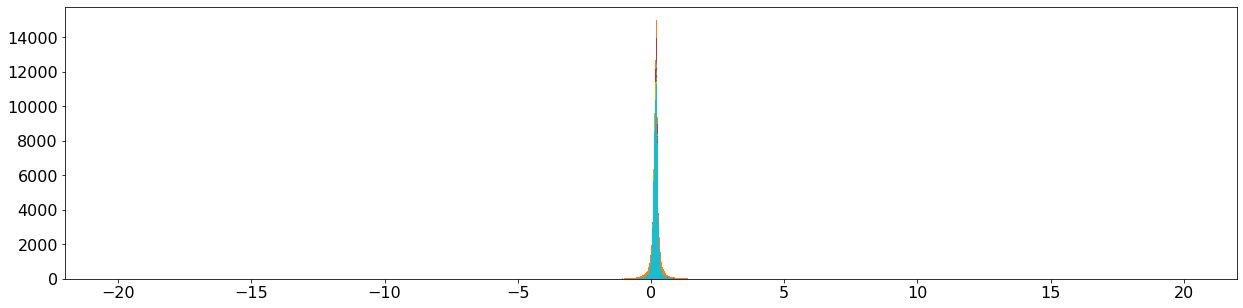

In [132]:
RIbesterr2, RIsimOverlap2 = optimize_intersection(RIdata,RIsimdata3,RIerrRandom2,-20,20)
print(RIbesterr2, RIsimOverlap2)

RIsimdata5 has error propagation that was generated using RIerrRandom and optimize_intersection

In [133]:
RIsimdata5 = []
for i in range(len(RIsimdata3)):
    RIsimdata5.append(RIsimdata3[i] + RIbesterr*RIerrRandom[i])

RIsimdata6 has RIerrRandom2 error propagation, without overlap optimization.

In [134]:
RIsimdata6 = []
for i in range(len(RIsimdata3)):
    RIsimdata6.append(RIsimdata3[i] + RIerrRandom2[i])

RIsimdata7 has RIerrRandom2 error propagation, with overlap optimization

In [135]:
RIsimdata7 = []
for i in range(len(RIsimdata3)):
    RIsimdata7.append(RIsimdata3[i] + RIbesterr2*RIerrRandom2[i])

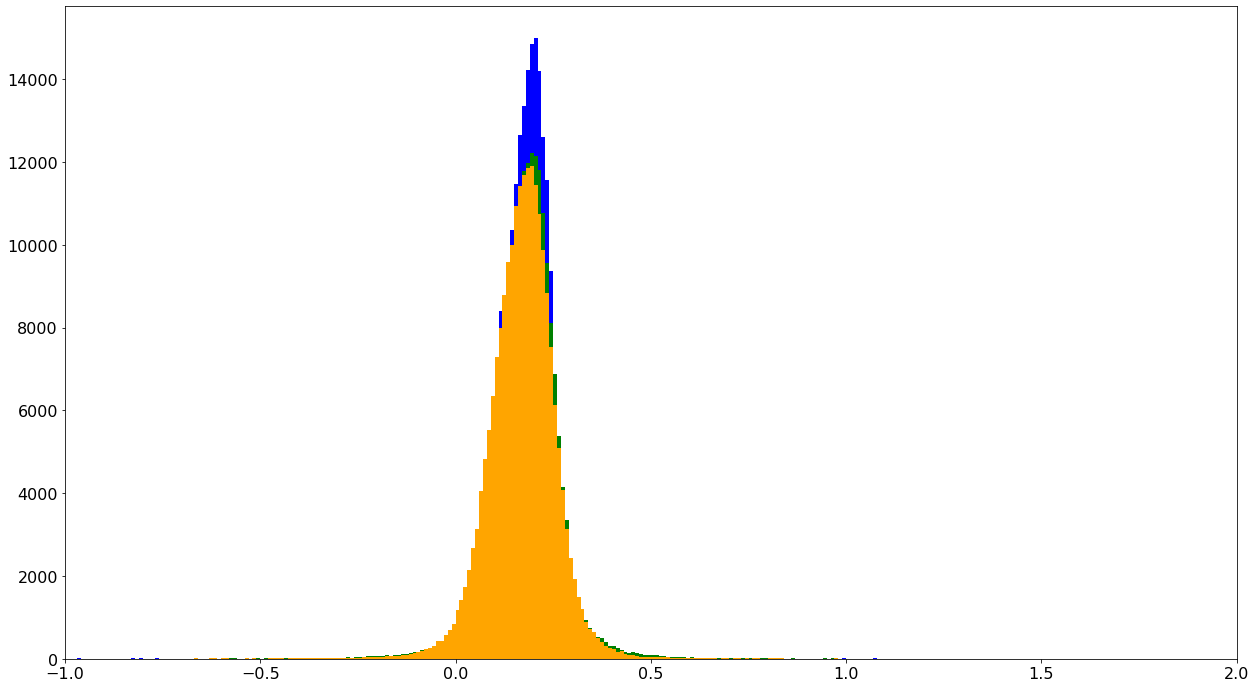

In [136]:
plt.figure(figsize=(21,12))
#plt.plot(RIx,RIy)
plt.hist(RIsimdata3, bins=np.arange(-1,2,0.01), color="blue") #hist shaped like low-error data distribion

plt.hist(RIsimdata4, bins=np.arange(-1,2,0.01), color="green") #hist shaped like low-error data + error added
plt.hist(RIdata, bins=np.arange(-1,2,0.01), color="orange") #hist of real data
plt.xlim(-1,2)
plt.show()

A plot of the real RI data against RIsimdata5

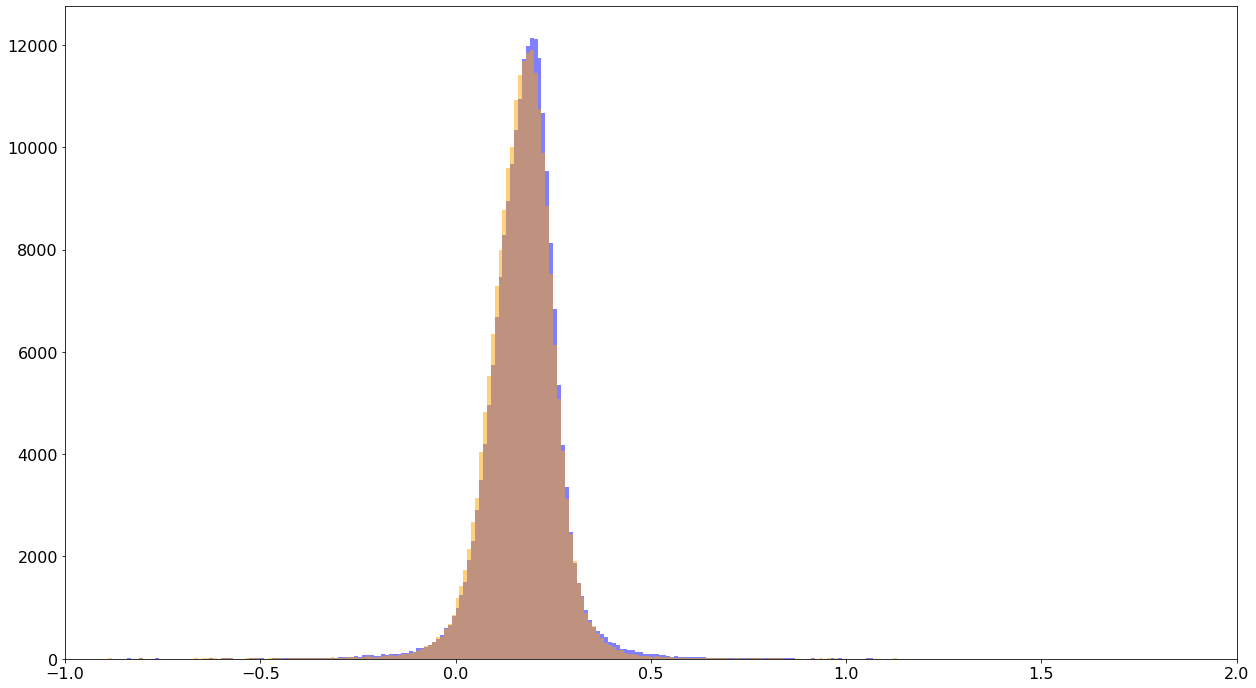

In [137]:
plt.figure(figsize=(21,12))
#plt.plot(RIx,RIy)
plt.hist(RIsimdata5, bins=np.arange(-1,2,0.01), alpha=0.5, color="blue") #hist shaped like low-error data + error added
plt.hist(RIdata, bins=np.arange(-1,2,0.01), alpha=0.5, color="orange") #hist of real data
plt.xlim(-1,2)
plt.show()

In [138]:
print("The overlap between the plots is ",RIsimOverlap)

The overlap between the plots is  0.9639391975624453


A plot of simulated data with and without error propagation shows how little the initial error propagation changes anything.

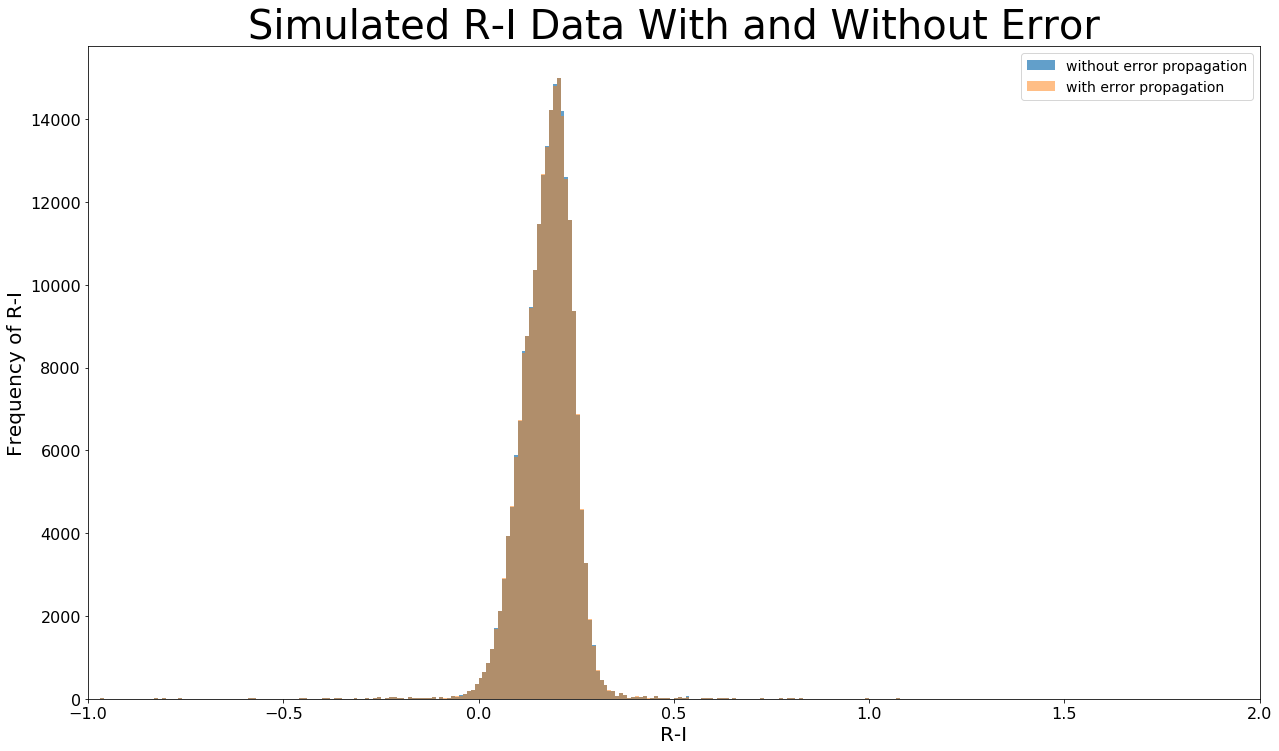

In [139]:
plt.figure(figsize=(21,12))
plt.ylabel('Frequency of R-I')
plt.xlabel('R-I')
plt.title('Simulated R-I Data With and Without Error')
plt.hist(RIsimdata3, bins=np.arange(-1,2,0.01), label = "without error propagation", alpha=0.7) #hist sim data without error
plt.hist(RIsimdata6, bins=np.arange(-1,2,0.01), label = "with error propagation", alpha=0.5) #hist of sim data with error
plt.legend()
plt.xlim(-1,2)
plt.savefig("sim_comparisonR-I", bbox_inches="tight")
plt.show()

A plot of real RI data against RIsimdata7

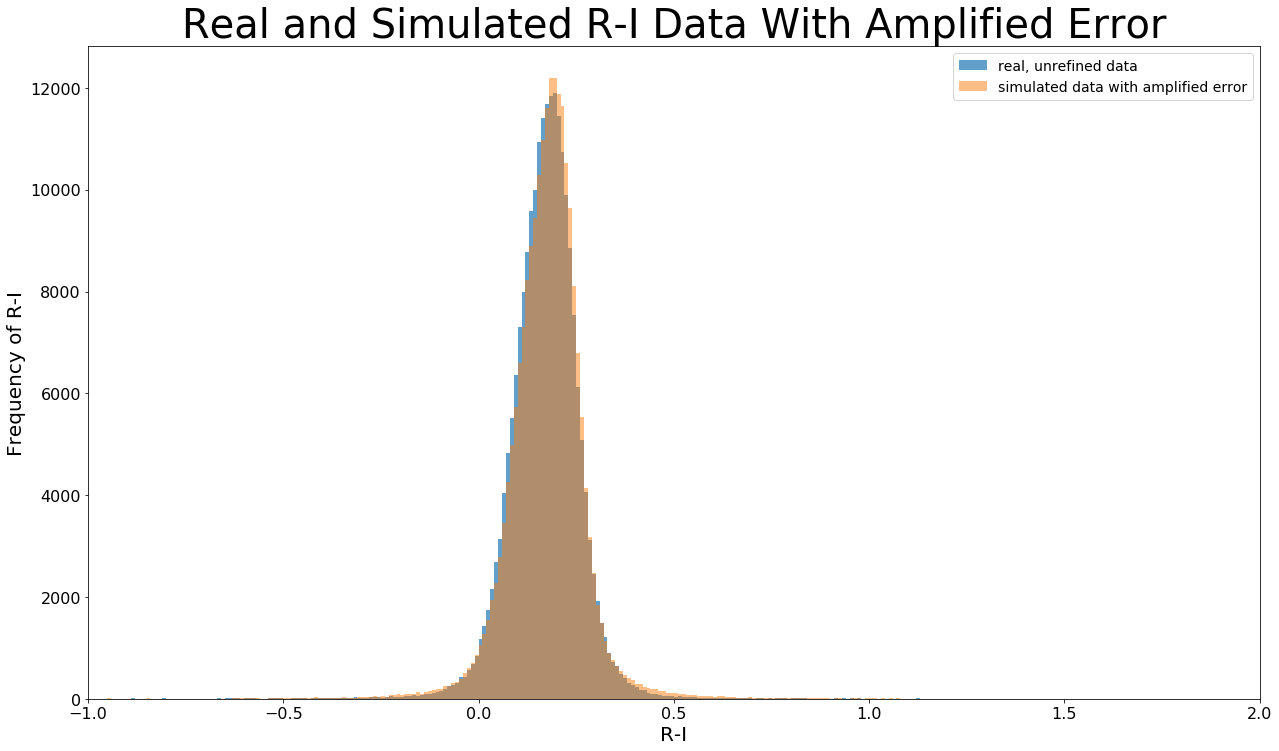

In [161]:
plt.figure(figsize=(21,12))
plt.ylabel('Frequency of R-I')
plt.xlabel('R-I')
plt.title('Real and Simulated R-I Data With Amplified Error')
plt.hist(RIdata, bins=np.arange(-1,2,0.01), label = "real, unrefined data", alpha=0.7) #real unrefined data
plt.hist(RIsimdata7, bins=np.arange(-1,2,0.01), label = "simulated data with amplified error", alpha=0.5) #hist of sim data with error
plt.legend()
plt.xlim(-1,2)
plt.savefig("sim_realR-I", bbox_inches="tight")
plt.show()

In [141]:
print("The overlap between the plots is ",RIsimOverlap2)

The overlap between the plots is  0.9610947142473839


Use the reported uncertainty to generate error values to add to the simulated data

RZerrRandom is a list of error values that was generated using a uniform probability distribution for each error being somewhere between +/- the reported uncertainty value.

RZerrRandom2 is a list of error values that was generated using a gaussian probability distribution. The standard deviation of each probability distribution is the reported uncertainty value.

In [142]:
RZerrRandom = RZerr[:]
r.shuffle(RZerrRandom)
RZsimdata2 = []
for i in range(len(RZerrRandom)):
    d = 2*RZerrRandom[i]*r.random() - RZerrRandom[i]
    RZerrRandom[i] = d
    
for i in range(len(RZsimdata)):
    RZsimdata2.append(RZsimdata[i] + 50*RZerrRandom[i])

In [143]:
RZerrRandom2 = RZerr[:]
r.shuffle(RZerrRandom2)
for i in range(len(RZerrRandom2)):
    d = r.gauss(0,RZerrRandom2[i])
    RZerrRandom2[i] = d

A plot comparing RZdata, simulated data without error propagation, and simulated data with error propagation that is 50 times greater than what would be expected from the reported uncertainty values.

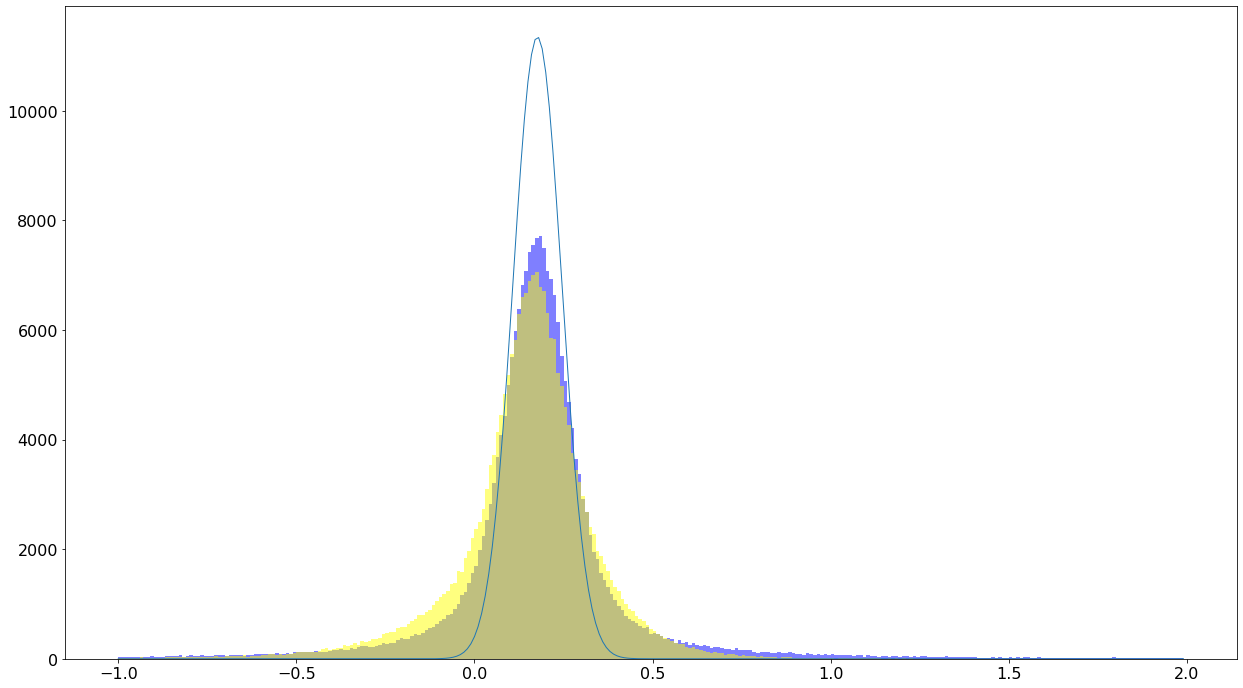

In [144]:
x_interval =np.arange(-1,2,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,gaussian(x_interval, averageRZ, newampRZ, sigmaRZ))
plt.hist(RZsimdata2, bins=np.arange(-1,2,0.01),alpha=0.5, color='blue') #simulated data with error added
#plt.hist(RZsimdata, bins=np.arange(-1,2,0.01),alpha=0.5, color='red') #simulated data
plt.hist(RZdata, bins=np.arange(-1,2,0.01),alpha=0.5, color='yellow') #real data
plt.show()

In [145]:
len(RZhists[4])/len(RZhists[-1])

0.10583652268999454

Generate a set of x,y coordinates that fit on top of the RZdata histogram

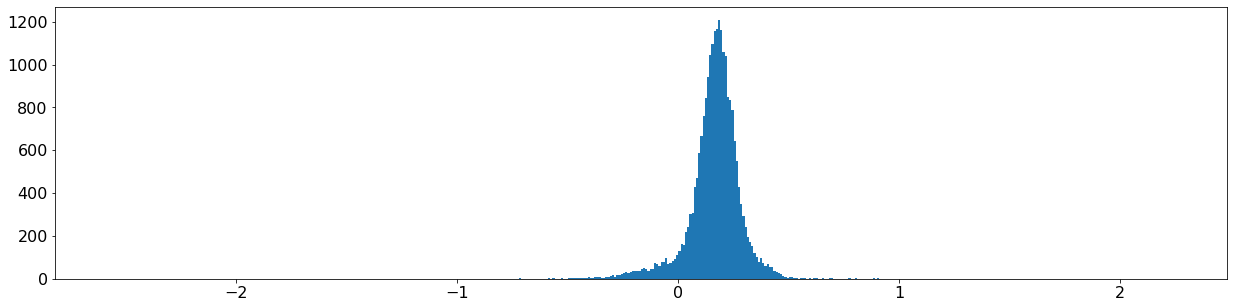

In [146]:
RZx, RZy = hist_func(RZhists[4])

Generate simulated data with the same distribution shape as the 10% most precise RZdata

RZsimdata3 has no error propagation

In [147]:
RZsimdata3 = sim_data2(len(RZdata),RZymax,RZx,RZy)

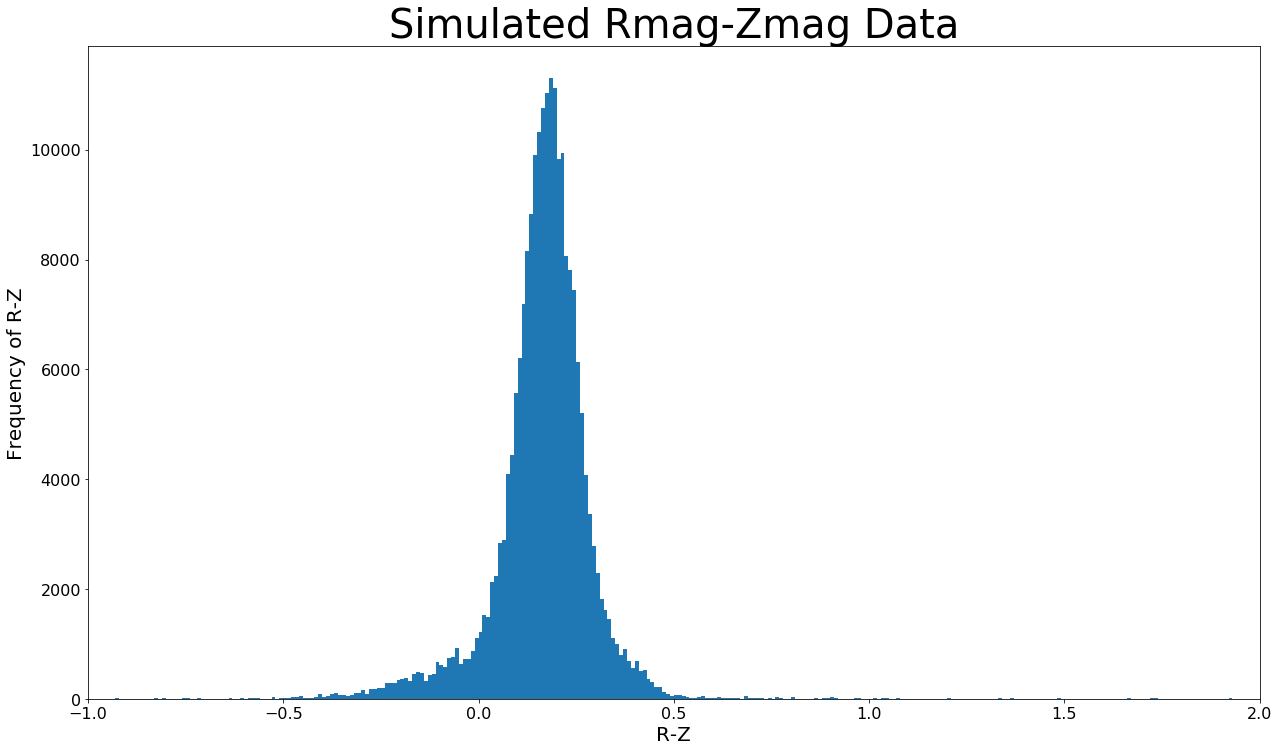

In [148]:
plt.figure(figsize=(21,12))
#plt.plot(RZx,RZy)
plt.hist(RZsimdata3, bins=np.arange(-1,2,0.01))
plt.xlim(-1,2)
plt.title('Simulated Rmag-Zmag Data')
plt.ylabel('Frequency of R-Z')
plt.xlabel('R-Z')
plt.savefig("simR-Z", bbox_inches="tight")
plt.show()

In [149]:
RZsimdata4 = []
for i in range(len(RZsimdata3)):
    RZsimdata4.append(RZsimdata3[i] + 45*RZerrRandom[i])

Determine the amount which the error must be expanded so that the simulated data and real data histograms overlap as much as possible.

43 0.9450894686518235


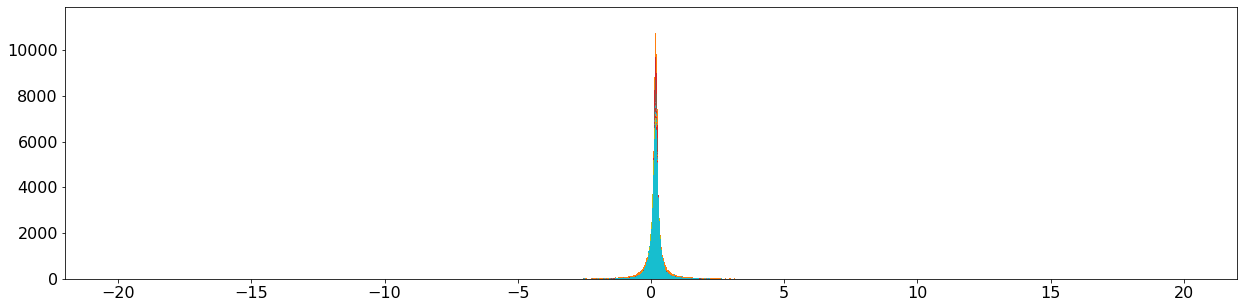

In [150]:
RZbesterr, RZsimOverlap = optimize_intersection(RZdata,RZsimdata3,RZerrRandom,-20,20)
print(RZbesterr, RZsimOverlap)

28 0.9402663631189527


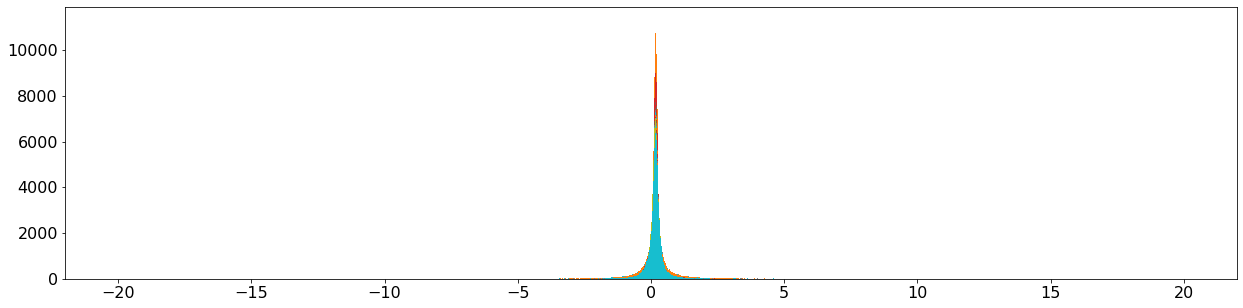

In [151]:
RZbesterr2, RZsimOverlap2 = optimize_intersection(RZdata,RZsimdata3,RZerrRandom2,-20,20)
print(RZbesterr2, RZsimOverlap2)

RZsimdata5 has error propagation that was generated using RZerrRandom and optimize_intersection

RZsimdata6 has RZerrRandom2 error propagation, without overlap optimization.

RZsimdata7 has RZerrRandom2 error propagation, with overlap optimization

In [152]:
RZsimdata5 = []
for i in range(len(RZsimdata3)):
    RZsimdata5.append(RZsimdata3[i] + RZbesterr*RZerrRandom[i])

In [153]:
RZsimdata6 = []
for i in range(len(RZsimdata3)):
    RZsimdata6.append(RZsimdata3[i] + RZerrRandom2[i])

In [154]:
RZsimdata7 = []
for i in range(len(RZsimdata3)):
    RZsimdata7.append(RZsimdata3[i] + RZbesterr2*RZerrRandom2[i])

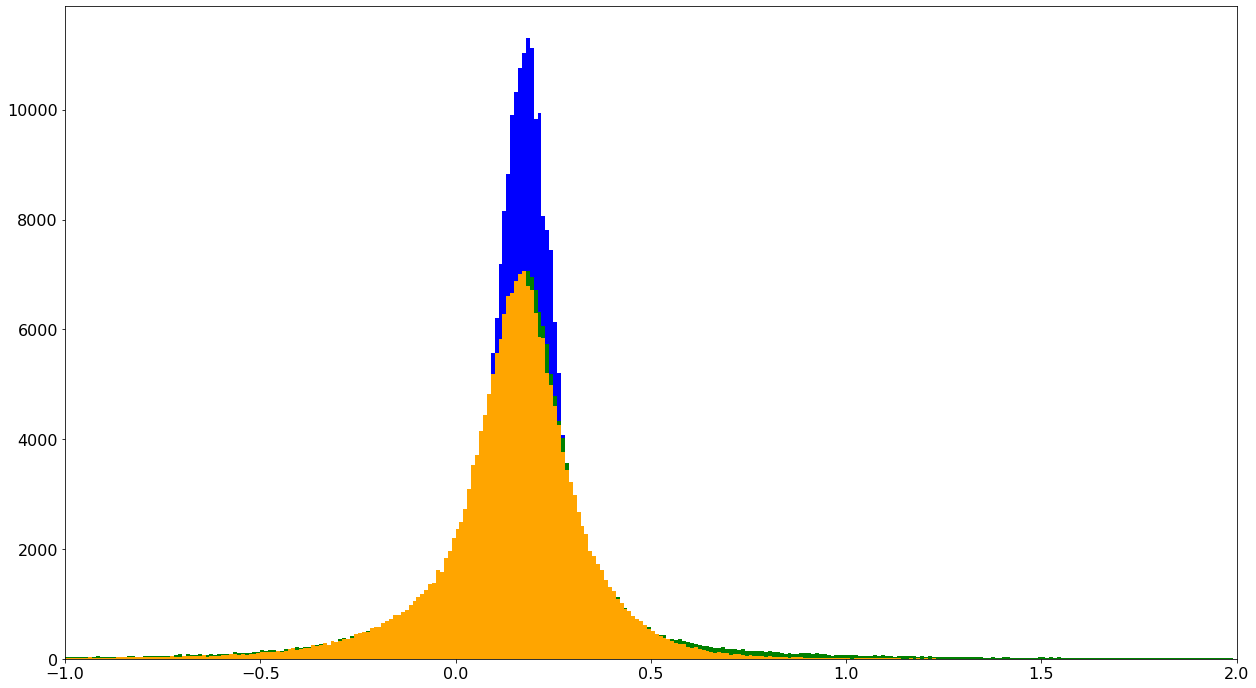

In [155]:
plt.figure(figsize=(21,12))
#plt.plot(RZx,RZy)
plt.hist(RZsimdata3, bins=np.arange(-1,2,0.01), color="blue") #hist shaped like low-error data distribion

plt.hist(RZsimdata4, bins=np.arange(-1,2,0.01), color="green") #hist shaped like low-error data + error added
plt.hist(RZdata, bins=np.arange(-1,2,0.01), color="orange") #hist of real data
plt.xlim(-1,2)
plt.show()

A plot of the real RI data against RIsimdata5

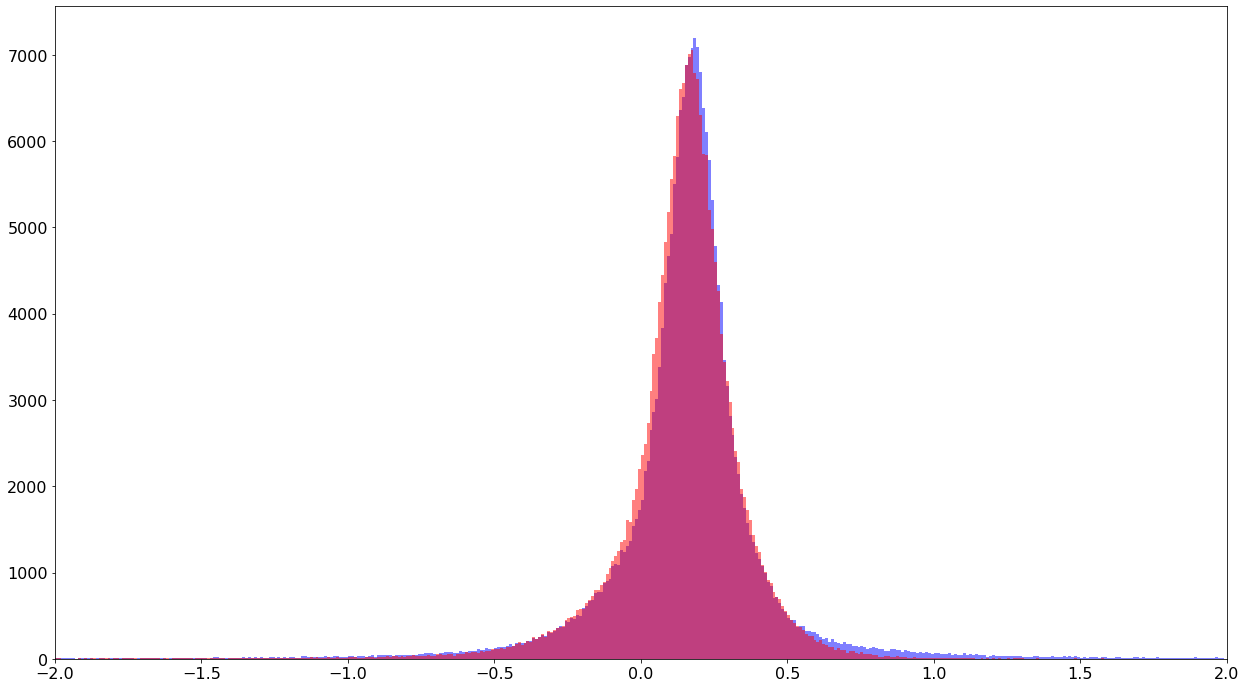

In [156]:
plt.figure(figsize=(21,12))
plt.hist(RZsimdata5, bins=np.arange(-2,2,0.01), alpha=0.5, color="blue") #hist shaped like low-error data + error added
plt.hist(RZdata, bins=np.arange(-2,2,0.01), alpha=0.5, color="red") #hist of real data
plt.xlim(-2,2)
plt.show()

In [157]:
print("The overlap between the plots is ",RIsimOverlap)

The overlap between the plots is  0.9639391975624453


A plot of simulated data with and without error propagation shows how little the initial error propagation changes anything.

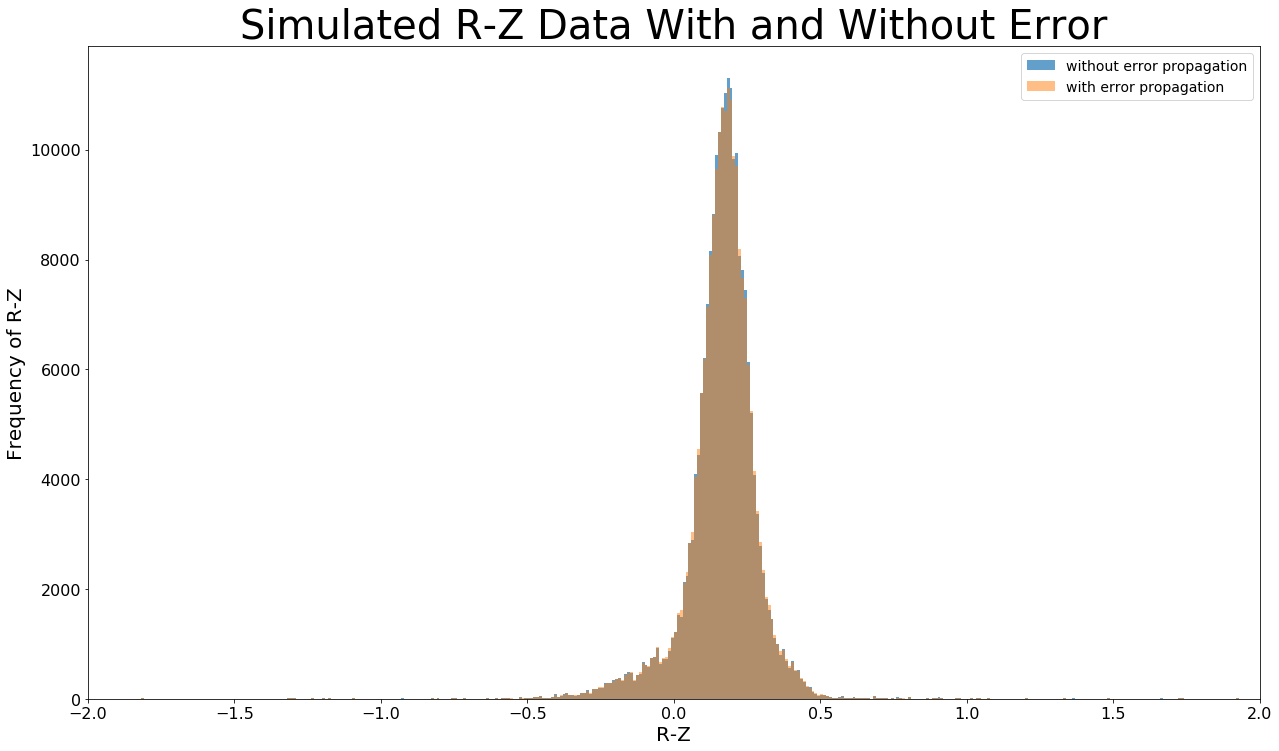

In [158]:
plt.figure(figsize=(21,12))
plt.ylabel('Frequency of R-Z')
plt.xlabel('R-Z')
plt.title('Simulated R-Z Data With and Without Error')
plt.hist(RZsimdata3, bins=np.arange(-2,2,0.01), label = "without error propagation", alpha=0.7) #hist sim data without error
plt.hist(RZsimdata6, bins=np.arange(-2,2,0.01), label = "with error propagation", alpha=0.5) #hist of sim data with error
plt.legend()
plt.xlim(-2,2)
plt.savefig("sim_comparisonR-Z", bbox_inches="tight")
plt.show()

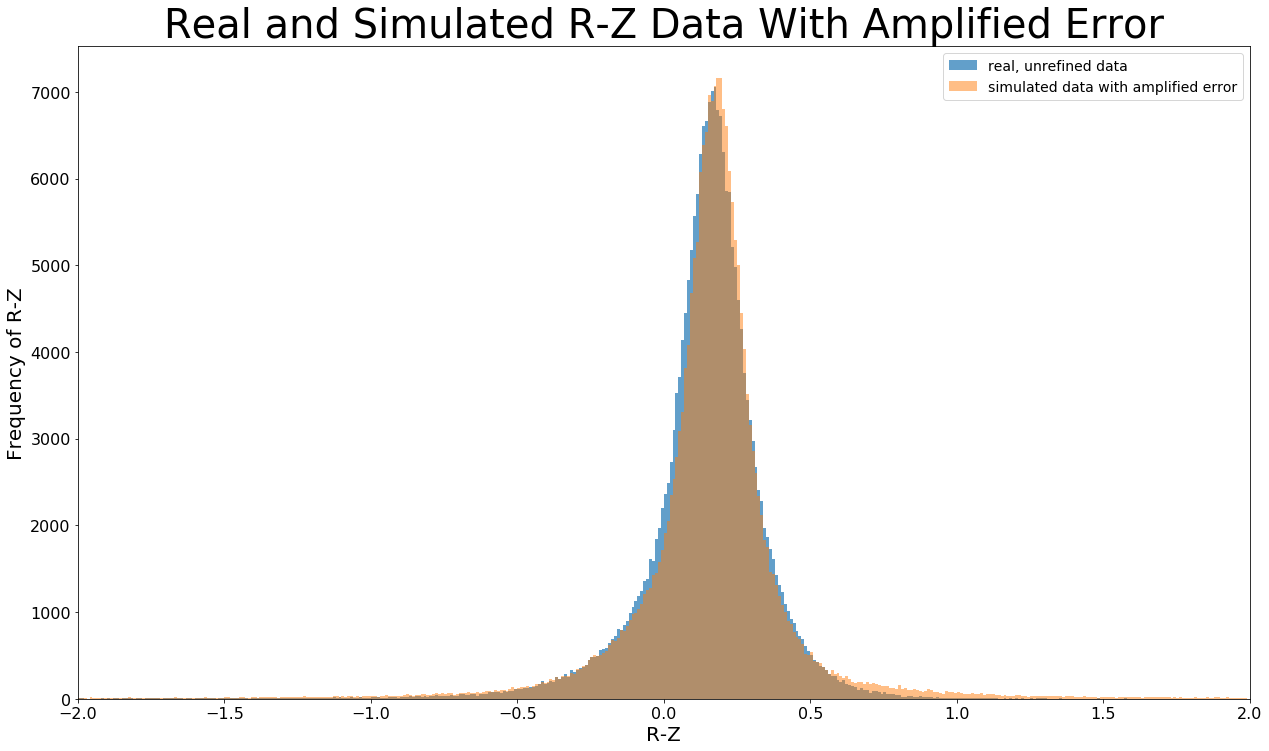

In [159]:
plt.figure(figsize=(21,12))
plt.ylabel('Frequency of R-Z')
plt.xlabel('R-Z')
plt.title('Real and Simulated R-Z Data With Amplified Error')
plt.hist(RZdata, bins=np.arange(-2,2,0.01), label = "real, unrefined data", alpha=0.7) #hist sim data without error
plt.hist(RZsimdata7, bins=np.arange(-2,2,0.01), label = "simulated data with amplified error", alpha=0.5) #hist of sim data with error
plt.legend()
plt.xlim(-2,2)
plt.savefig("sim_realR-Z", bbox_inches="tight")
plt.show()

In [160]:
print("The overlap between the plots is ",RIsimOverlap2)

The overlap between the plots is  0.9610947142473839
